In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The Fashion-MNIST dataset, developed by Zalando, consists of 60,000 training images and 10,000 test images. Each image is a 28×28 grayscale representation of a fashion article, labeled with one of ten distinct categories

Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [ ]:
train_images[0][26][26]

np.uint8(0)

In [ ]:
test_images


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


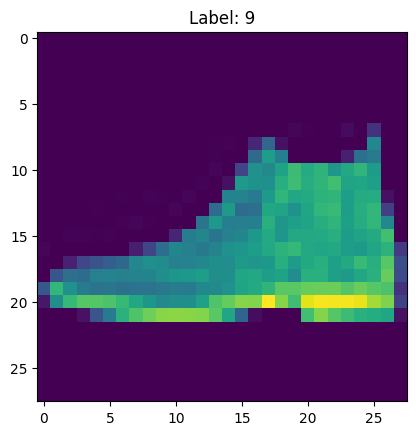

In [ ]:
plt.imshow(test_images[0], cmap='viridis')
plt.title(f"Label: {test_labels[0]}")
plt.show()

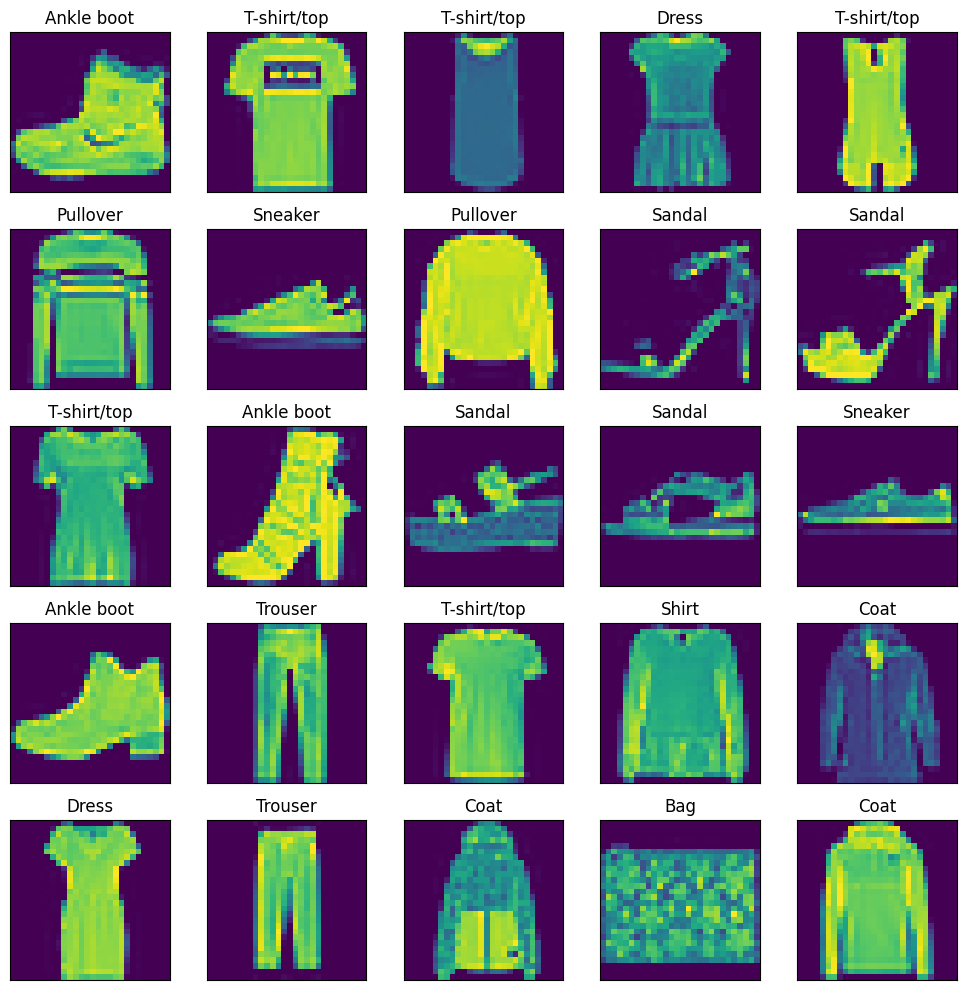

In [ ]:

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the first 25 images in a colorful style
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Change cmap to 'viridis' or other options like 'plasma', 'inferno', 'magma'
    plt.imshow(train_images[i], cmap='viridis')
    plt.title(class_names[train_labels[i]])
plt.tight_layout()
plt.show()


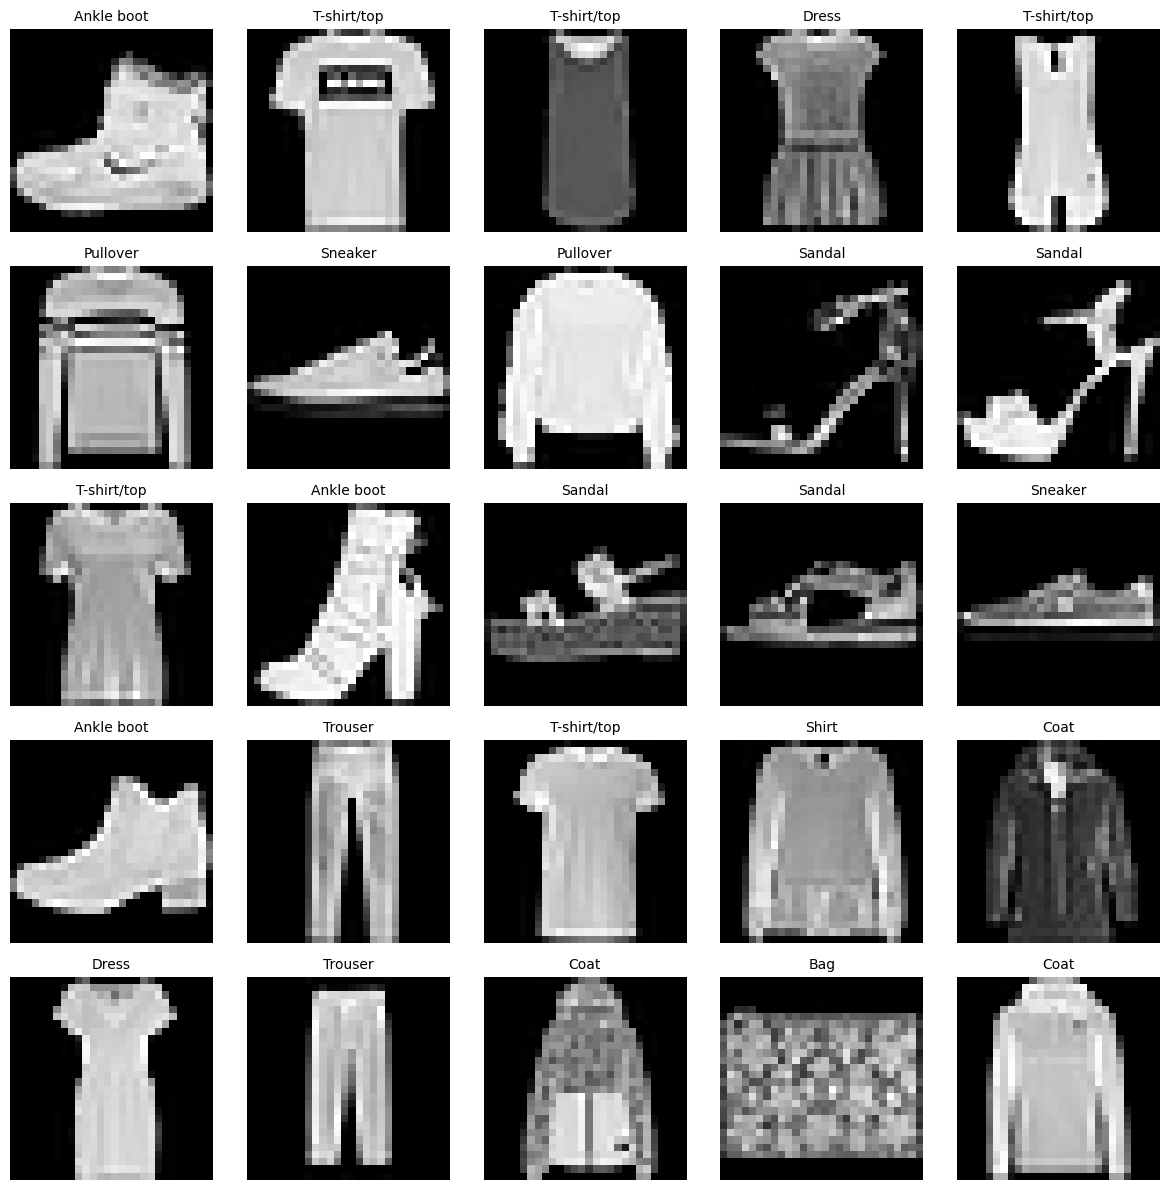

In [ ]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting the first 25 training images
plt.figure(figsize=(12, 12))

for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

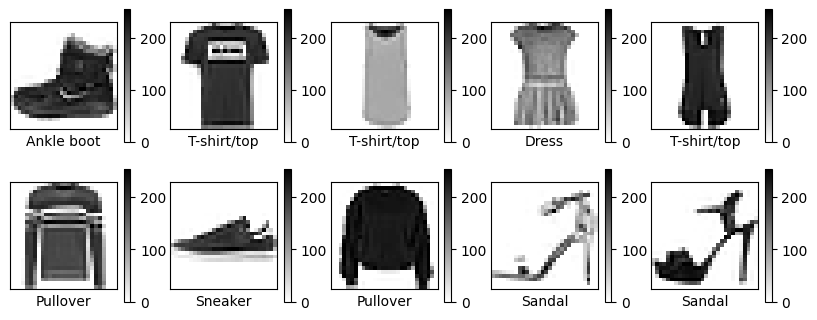

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.colorbar()
plt.show()

Neural networks work better when input values are small and consistent, typically within a range like 0 to 1 or -1 to 1. Feeding raw pixel values (in the 0–255 range) can:
*   Make training slower

*   Cause instability in learning




*   Lead to poor convergence

So we are normalizing the pixel values by dividing each one by 255.0, so that all values fall within the range 0.0 to 1.0.










In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Optional: check shape and data type
print("Train shape:", train_images.shape)
print("Test shape:", test_images.shape)
print("Train label sample:", train_labels[:5])
print(train_labels[:10])


Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Train label sample: [9 0 0 3 0]
[9 0 0 3 0 2 7 2 5 5]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

model = Sequential([
    Input(shape=(28, 28)),         # Use Input layer instead of input_shape in Flatten
    Flatten(),                     # Flatten the input into a 1D vector
    Dense(150, activation='relu'), # First Dense layer with 150 neurons and ReLU activation
    Dense(150, activation='relu'), # Second Dense layer with 150 neurons and ReLU activation
    Dense(10, activation='softmax')# Output layer with 10 neurons for 10 class labels
])


In [ ]:
#SHALLOW NN WITH SGD (10 epochs)
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Transforms the format of the images from a 2D array to a 1D array
    Dense(150, activation='relu'), # First Dense layer with 128 nodes (neurons)
    Dense(150, activation='relu'),  # second Dense layer with 128 nodes (neurons)
    Dense(10, activation='softmax')  # third Dense layer with 10 nodes for 10 class labels
])

# Compile the model

# Optimizer: 'sgd' is generally simpler and uses a constant learning rate(0.01).
#'sparse_categorical_crossentropy' is used as the loss function for multi-class classification problems where labels are provided as integers.
# Metrics: 'accuracy' is used to evaluate the performance during training and testing.

optimizer = SGD(learning_rate=0.01)

model.compile(optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
####1 ann sgd


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6747 - loss: 1.0136
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8279 - loss: 0.5011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8433 - loss: 0.4528
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8543 - loss: 0.4196
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8590 - loss: 0.4038
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8663 - loss: 0.3859
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8733 - loss: 0.3656
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8712 - loss: 0.3590
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8761 - loss: 0.3485
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8768 - loss: 0.3463
313/313 - 1s - 4ms/step - accuracy: 0.8613 - loss: 0.3888

Test accuracy: 0.861299991607666

Test loss: 0.3888273537158

In [ ]:
#checking shallow NN with SGD and different learing rate to find the best learning rate among [0.0001, 0.001, 0.01, 0.1, 1.0]

# Define a function to build and train the model with a specified learning rate
def train_model_with_lr(learning_rate):
    print(f"\nTraining with learning rate: {learning_rate}")

    # Build the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Transforms the format of the images from a 2D array to a 1D array
        Dense(150, activation='relu'), # First Dense layer with 128 nodes (neurons)
        Dense(150, activation='relu'),  # second Dense layer with 128 nodes (neurons)
        Dense(10, activation='softmax')  # third Dense layer with 10 nodes for 10 class labels
    ])

    # Compile the model with the given learning rate
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=10, verbose=2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Test accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")
    return test_acc, test_loss

# List of learning rates to try
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

# Store results for comparison
results = {}

for lr in learning_rates:
    acc, loss = train_model_with_lr(lr)
    results[lr] = {"accuracy": acc, "loss": loss}

# Print the results for each learning rate
print("\nLearning Rate Tuning Results:")
for lr, metrics in results.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {metrics['accuracy']:.4f}, Test Loss: {metrics['loss']:.4f}")



Training with learning rate: 0.0001
Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.1530 - loss: 2.1892
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.3965 - loss: 1.9808
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.5226 - loss: 1.8066
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.5787 - loss: 1.6445
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.6273 - loss: 1.4977
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.6548 - loss: 1.3715
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.6682 - loss: 1.2662
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.6774 - loss: 1.1799
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.6863 - loss: 1.1095
Epoch 10/10
1875/1875 - 4s - 2ms/step - accuracy: 0.6939 - loss: 1.0520
Test accuracy: 0.6890000104904175
Test Loss: 1.0381358861923218

Training with learning rate: 0.001
Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.5651 - loss: 1.5038
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.7097 - loss: 0.8884
Epoch 3/10

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8750 - loss: 0.3353 - val_accuracy: 0.8569 - val_loss: 0.4117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8799 - loss: 0.3198 - val_accuracy: 0.8605 - val_loss: 0.4038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8822 - loss: 0.3234 - val_accuracy: 0.8597 - val_loss: 0.4030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8819 - loss: 0.3186 - val_accuracy: 0.8618 - val_loss: 0.4016
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8834 - loss: 0.3176 - val_accuracy: 0.8596 - val_loss: 0.3997
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8823 - loss: 0.3174 - val_accuracy: 0.8628 - val_loss: 0.3975
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8831 - loss: 0.3208 - val_accuracy: 0.8608 - val_loss: 0.4007
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8830 - loss: 0.3188 

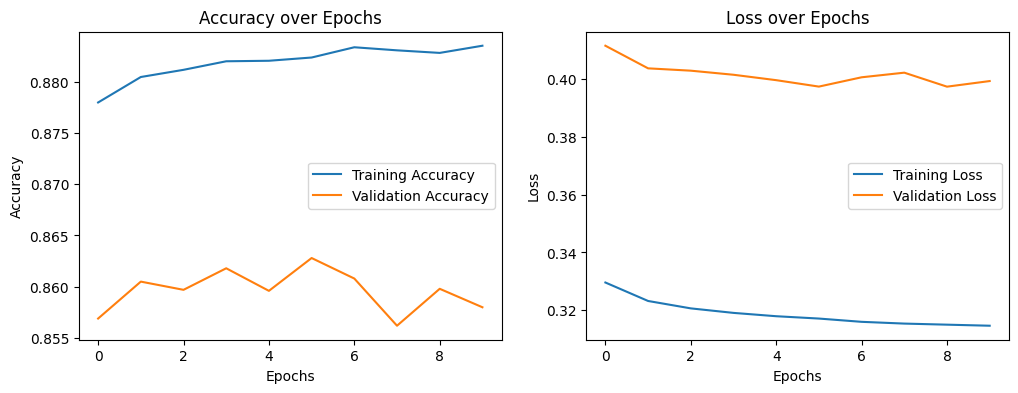

313/313 - 1s - 2ms/step - accuracy: 0.8580 - loss: 0.3994

Test accuracy: 0.8579999804496765

Test loss: 0.3994098901748657
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


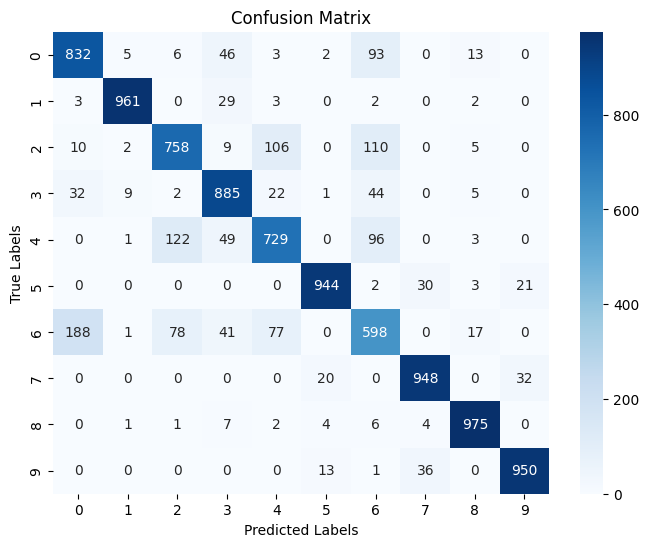


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.78      0.76      0.77      1000
           3       0.83      0.89      0.86      1000
           4       0.77      0.73      0.75      1000
           5       0.96      0.94      0.95      1000
           6       0.63      0.60      0.61      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Weighted Precision: 0.8569
Weighted Recall: 0.8580
Weighted F1-Score: 0.8571


In [ ]:
#Shallow NN with sgd and 10 epochs with plot, confsuion matrix and classification reports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import numpy as np

# Compile the model
optimizer = SGD(learning_rate=0.01)

model.compile(optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plotting Accuracy and Loss curves
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# Make predictions
predictions = model.predict(test_images)

# Convert predictions to class labels (the class with the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report (F1 Score, Precision, Recall)
print("\nClassification Report:")
report = classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print(report)

# Extracting Precision, Recall, F1-Score from the Classification Report
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

# Printing Precision, Recall, F1-Score
print(f"\nWeighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7573 - loss: 0.6831 - val_accuracy: 0.8147 - val_loss: 0.5238
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8294 - loss: 0.4703 - val_accuracy: 0.8304 - val_loss: 0.4845
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8464 - loss: 0.4302 - val_accuracy: 0.8396 - val_loss: 0.4703
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8514 - loss: 0.4164 - val_accuracy: 0.8337 - val_loss: 0.4703
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8565 - loss: 0.4055 - val_accuracy: 0.8434 - val_loss: 0.4408
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8596 - loss: 0.3918 - val_accuracy: 0.8337 - val_loss: 0.4880
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8604 - loss: 0.3966 - val_accuracy: 0.8391 - val_loss: 0.4991
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8611 - loss: 0.3972 

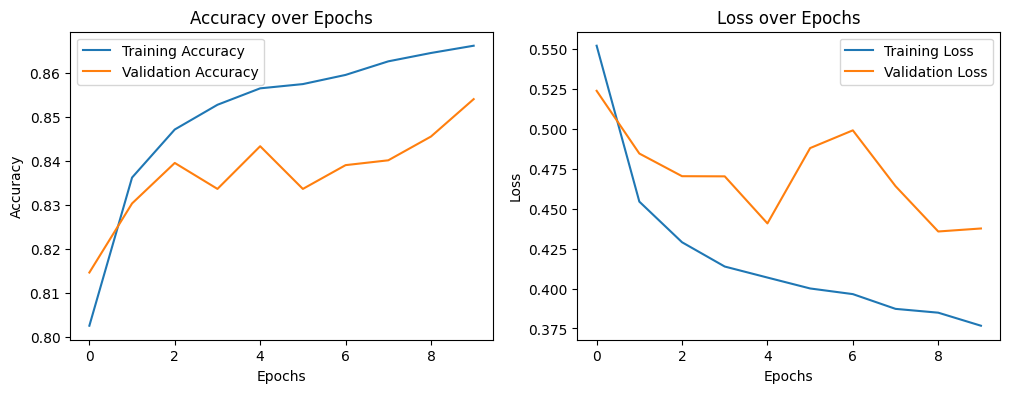

313/313 - 1s - 2ms/step - accuracy: 0.8541 - loss: 0.4376

Test accuracy: 0.8540999889373779

Test loss: 0.43761134147644043
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


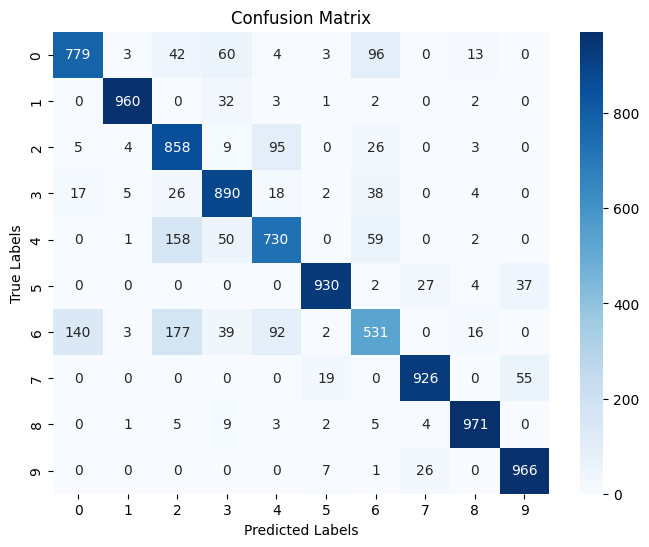


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.68      0.86      0.76      1000
           3       0.82      0.89      0.85      1000
           4       0.77      0.73      0.75      1000
           5       0.96      0.93      0.95      1000
           6       0.70      0.53      0.60      1000
           7       0.94      0.93      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000


Weighted Precision: 0.8551
Weighted Recall: 0.8541
Weighted F1-Score: 0.8520


In [ ]:
#Shallow NN with Adam and 10 epochs with plot, confsuion matrix and classification reports
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Transforms the format of the images from a 2D array to a 1D array
    Dense(150, activation='relu'), # First Dense layer with 150 nodes (neurons)
    Dense(150, activation='relu'),  # second Dense layer with 150 nodes (neurons)
    Dense(10, activation='softmax')  # third Dense layer with 10 nodes for 10 class labels
])

# Compile the model
optimizer = Adam(learning_rate=0.01)

model.compile(optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plotting Accuracy and Loss curves
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# Make predictions
predictions = model.predict(test_images)

# Convert predictions to class labels (the class with the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report (F1 Score, Precision, Recall)
print("\nClassification Report:")
report = classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print(report)

# Extracting Precision, Recall, F1-Score from the Classification Report
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

# Printing Precision, Recall, F1-Score
print(f"\nWeighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")




Training model with hidden layers (50, 50) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8044 - loss: 0.5507 - val_accuracy: 0.8035 - val_loss: 0.5117
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8386 - loss: 0.4515 - val_accuracy: 0.8221 - val_loss: 0.5022
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8489 - loss: 0.4280 - val_accuracy: 0.8412 - val_loss: 0.4602
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8543 - loss: 0.4094 - val_accuracy: 0.8352 - val_loss: 0.4449
Epoch 5/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8571 - loss: 0.4036 - val_accuracy: 0.8385 - val_loss: 0.4751
Epoch 6/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8590 - loss: 0.3989 - val_accuracy: 0.8466 - val_loss: 0.4639
Epoch 7/10
1875/1875 - 7s - 3ms/step - accuracy: 0.8627 - loss: 0.3883 - val_accuracy: 0.8378 - val_loss: 0.4946
Epoch 8/10
1875/1875 - 8s - 4ms/step - accuracy: 0.8651 - loss: 0.3793 - val_accuracy: 0.8482 - val_loss: 0.4435
Epoch 9/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8652 - loss: 0.3840 - val_accuracy: 0.8530 - 

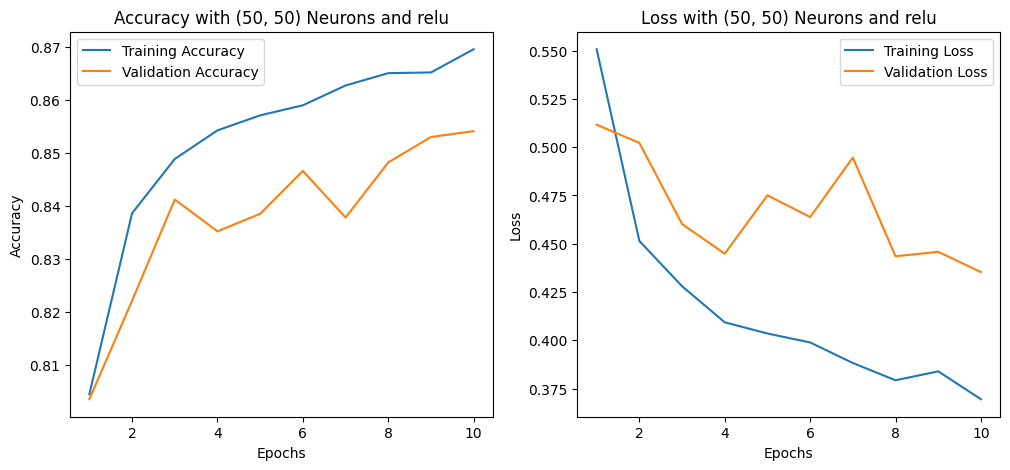

313/313 - 0s - 1ms/step - accuracy: 0.8541 - loss: 0.4354
Test Accuracy with (50, 50) Neurons: 0.8541
Test Loss with (50, 50) Neurons: 0.4354

Training model with hidden layers (50, 100) neurons and activation 'relu'...
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8068 - loss: 0.5478 - val_accuracy: 0.8247 - val_loss: 0.4943
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8399 - loss: 0.4508 - val_accuracy: 0.8300 - val_loss: 0.4738
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8457 - loss: 0.4332 - val_accuracy: 0.8302 - val_loss: 0.4825
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8510 - loss: 0.4193 - val_accuracy: 0.8416 - val_loss: 0.4391
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8532 - loss: 0.4084 - val_accuracy: 0.8372 - val_loss: 0.4743
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8577 - loss: 0.3968 - val_accuracy: 0.8517 - val_loss: 0.4317
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8593 - loss: 0.3996 - val_accuracy: 0.8524 - val_lo

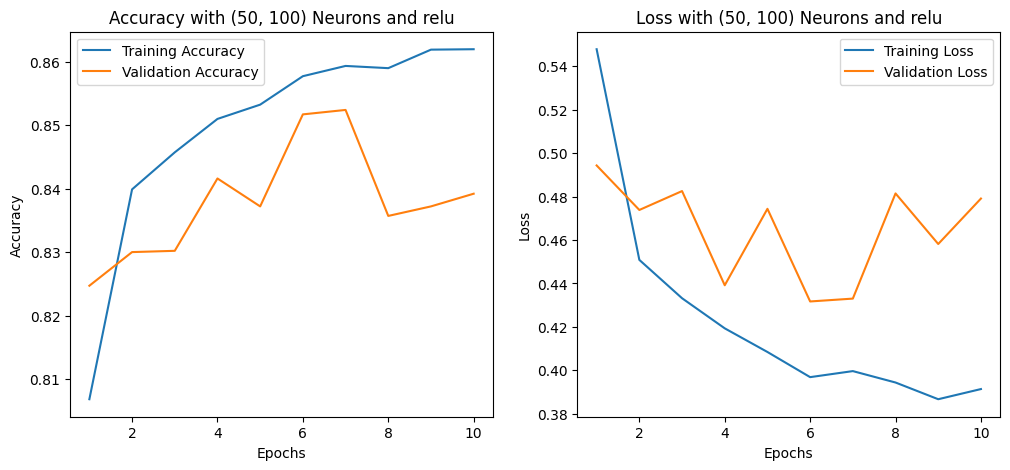

313/313 - 1s - 2ms/step - accuracy: 0.8392 - loss: 0.4791
Test Accuracy with (50, 100) Neurons: 0.8392
Test Loss with (50, 100) Neurons: 0.4791

Training model with hidden layers (100, 100) neurons and activation 'relu'...
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8052 - loss: 0.5433 - val_accuracy: 0.8167 - val_loss: 0.4938
Epoch 2/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8377 - loss: 0.4555 - val_accuracy: 0.8341 - val_loss: 0.4728
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8462 - loss: 0.4287 - val_accuracy: 0.8391 - val_loss: 0.4597
Epoch 4/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8531 - loss: 0.4120 - val_accuracy: 0.7858 - val_loss: 0.6110
Epoch 5/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8540 - loss: 0.4057 - val_accuracy: 0.8301 - val_loss: 0.4851
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8561 - loss: 0.4032 - val_accuracy: 0.8521 - val_loss: 0.4357
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8584 - loss: 0.3976 - val_accuracy: 0.8425 - v

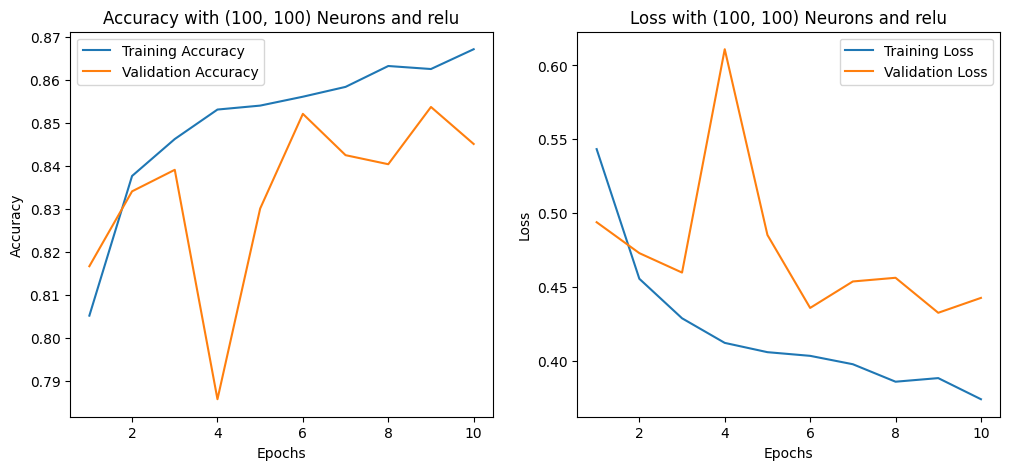

313/313 - 1s - 2ms/step - accuracy: 0.8451 - loss: 0.4425
Test Accuracy with (100, 100) Neurons: 0.8451
Test Loss with (100, 100) Neurons: 0.4425

Training model with hidden layers (100, 150) neurons and activation 'relu'...
Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8015 - loss: 0.5514 - val_accuracy: 0.8079 - val_loss: 0.5150
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8351 - loss: 0.4597 - val_accuracy: 0.8208 - val_loss: 0.4821
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8495 - loss: 0.4265 - val_accuracy: 0.8425 - val_loss: 0.4486
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8538 - loss: 0.4140 - val_accuracy: 0.8338 - val_loss: 0.5291
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8567 - loss: 0.4013 - val_accuracy: 0.8467 - val_loss: 0.4364
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8574 - loss: 0.4059 - val_accuracy: 0.8391 - val_loss: 0.4538
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8598 - loss: 0.3928 - val_accuracy: 0.8328

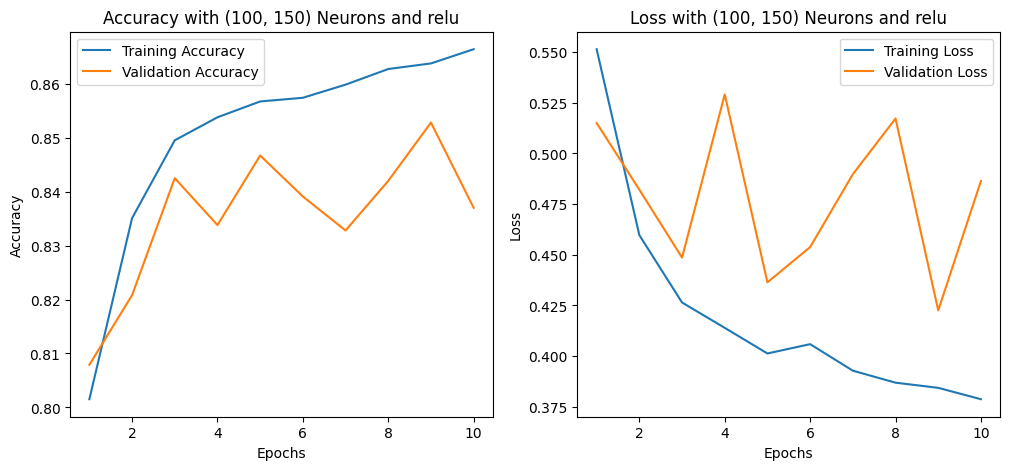

313/313 - 1s - 3ms/step - accuracy: 0.8370 - loss: 0.4864
Test Accuracy with (100, 150) Neurons: 0.8370
Test Loss with (100, 150) Neurons: 0.4864

Training model with hidden layers (200, 250) neurons and activation 'relu'...
Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8029 - loss: 0.5517 - val_accuracy: 0.8293 - val_loss: 0.4948
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.8378 - loss: 0.4536 - val_accuracy: 0.8341 - val_loss: 0.4597
Epoch 3/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8458 - loss: 0.4340 - val_accuracy: 0.8494 - val_loss: 0.4369
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8490 - loss: 0.4220 - val_accuracy: 0.8404 - val_loss: 0.4670
Epoch 5/10
1875/1875 - 8s - 4ms/step - accuracy: 0.8539 - loss: 0.4072 - val_accuracy: 0.8437 - val_loss: 0.4628
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8575 - loss: 0.3993 - val_accuracy: 0.8492 - val_loss: 0.4209
Epoch 7/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8606 - loss: 0.3918 - val_accuracy: 0.8405 -

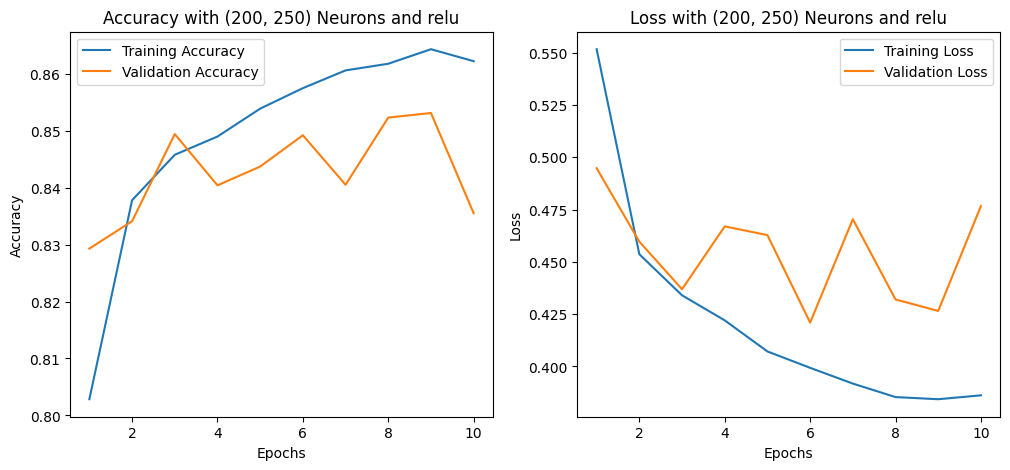

313/313 - 1s - 2ms/step - accuracy: 0.8355 - loss: 0.4767
Test Accuracy with (200, 250) Neurons: 0.8355
Test Loss with (200, 250) Neurons: 0.4767

Training model with hidden layers (50, 150, 250) neurons and activation 'relu'...
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7902 - loss: 0.5937 - val_accuracy: 0.8226 - val_loss: 0.4985
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8295 - loss: 0.4851 - val_accuracy: 0.8119 - val_loss: 0.5284
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8364 - loss: 0.4648 - val_accuracy: 0.8289 - val_loss: 0.4932
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8412 - loss: 0.4556 - val_accuracy: 0.8243 - val_loss: 0.4914
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8429 - loss: 0.4447 - val_accuracy: 0.8348 - val_loss: 0.4777
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8469 - loss: 0.4426 - val_accuracy: 0.8458 - val_loss: 0.4598
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8489 - loss: 0.4329 - val_accuracy: 0.843

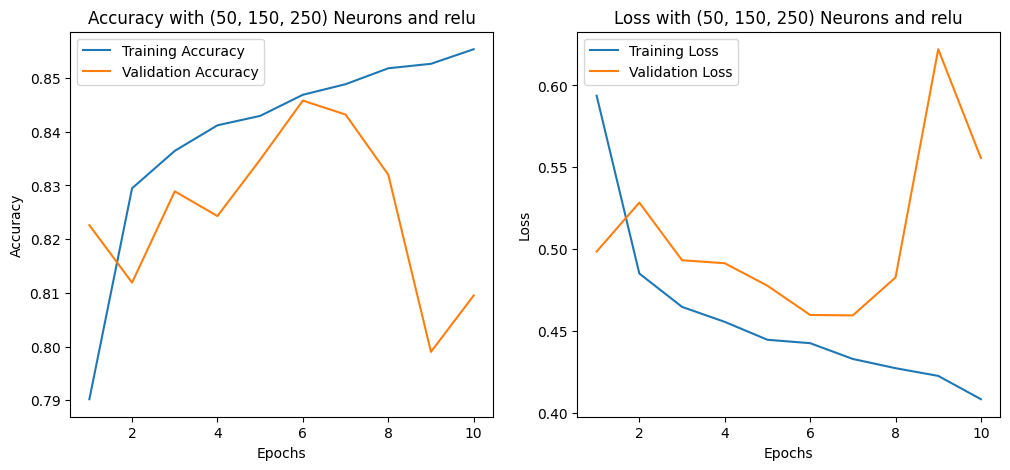

313/313 - 0s - 2ms/step - accuracy: 0.8095 - loss: 0.5556
Test Accuracy with (50, 150, 250) Neurons: 0.8095
Test Loss with (50, 150, 250) Neurons: 0.5556

Training model with hidden layers (50, 50) neurons and activation 'tanh'...
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7732 - loss: 0.6283 - val_accuracy: 0.7855 - val_loss: 0.6054
Epoch 2/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8009 - loss: 0.5665 - val_accuracy: 0.8013 - val_loss: 0.5636
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8011 - loss: 0.5600 - val_accuracy: 0.7795 - val_loss: 0.6102
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8065 - loss: 0.5532 - val_accuracy: 0.7808 - val_loss: 0.6295
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8051 - loss: 0.5539 - val_accuracy: 0.8079 - val_loss: 0.5500
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8083 - loss: 0.5420 - val_accuracy: 0.7580 - val_loss: 0.6322
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8066 - loss: 0.5484 - val_accuracy: 0.78

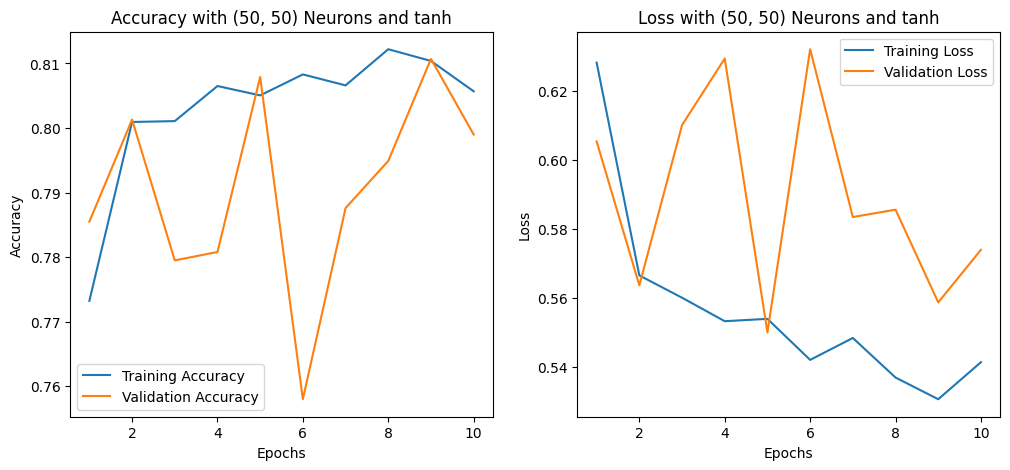

313/313 - 1s - 2ms/step - accuracy: 0.7990 - loss: 0.5739
Test Accuracy with (50, 50) Neurons: 0.7990
Test Loss with (50, 50) Neurons: 0.5739

Training model with hidden layers (50, 100) neurons and activation 'tanh'...
Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7577 - loss: 0.6624 - val_accuracy: 0.7891 - val_loss: 0.5875
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7883 - loss: 0.6036 - val_accuracy: 0.7897 - val_loss: 0.6065
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7867 - loss: 0.6042 - val_accuracy: 0.7479 - val_loss: 0.6987
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.7850 - loss: 0.6165 - val_accuracy: 0.7640 - val_loss: 0.6570
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.7821 - loss: 0.6198 - val_accuracy: 0.7404 - val_loss: 0.6497
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7859 - loss: 0.6142 - val_accuracy: 0.8159 - val_loss: 0.5943
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.7890 - loss: 0.6040 - val_accuracy: 0.7972 - val_l

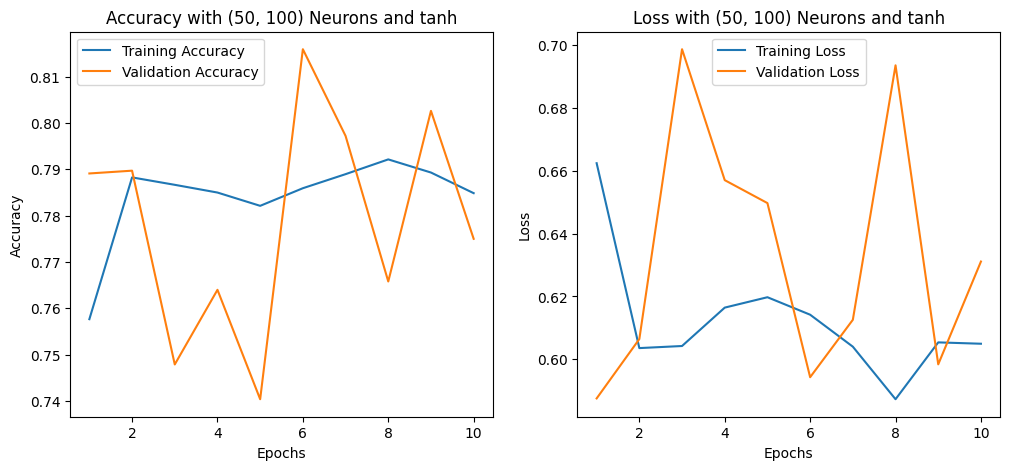

313/313 - 0s - 2ms/step - accuracy: 0.7750 - loss: 0.6311
Test Accuracy with (50, 100) Neurons: 0.7750
Test Loss with (50, 100) Neurons: 0.6311

Training model with hidden layers (100, 100) neurons and activation 'tanh'...
Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.7462 - loss: 0.6902 - val_accuracy: 0.7588 - val_loss: 0.6917
Epoch 2/10
1875/1875 - 9s - 5ms/step - accuracy: 0.7653 - loss: 0.6755 - val_accuracy: 0.7740 - val_loss: 0.6687
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7723 - loss: 0.6626 - val_accuracy: 0.7178 - val_loss: 0.7750
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.7533 - loss: 0.7075 - val_accuracy: 0.7700 - val_loss: 0.6898
Epoch 5/10
1875/1875 - 9s - 5ms/step - accuracy: 0.7573 - loss: 0.6990 - val_accuracy: 0.7676 - val_loss: 0.7125
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7615 - loss: 0.6780 - val_accuracy: 0.7275 - val_loss: 0.7781
Epoch 7/10
1875/1875 - 10s - 6ms/step - accuracy: 0.7645 - loss: 0.6684 - val_accuracy: 0.7686 - v

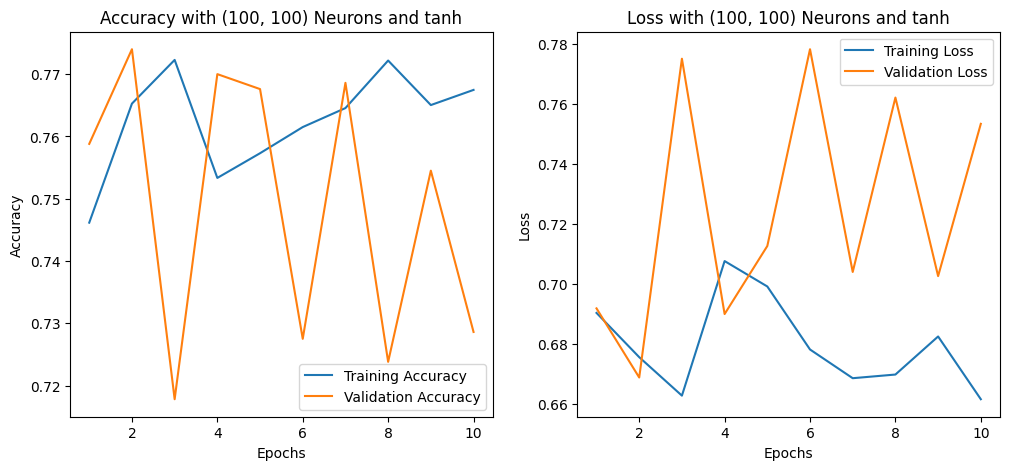

313/313 - 1s - 2ms/step - accuracy: 0.7286 - loss: 0.7533
Test Accuracy with (100, 100) Neurons: 0.7286
Test Loss with (100, 100) Neurons: 0.7533

Training model with hidden layers (100, 150) neurons and activation 'tanh'...
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7344 - loss: 0.7287 - val_accuracy: 0.7308 - val_loss: 0.7141
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.7526 - loss: 0.6989 - val_accuracy: 0.7458 - val_loss: 0.7776
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7483 - loss: 0.7257 - val_accuracy: 0.7567 - val_loss: 0.7309
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.7381 - loss: 0.7402 - val_accuracy: 0.7145 - val_loss: 0.7975
Epoch 5/10
1875/1875 - 9s - 5ms/step - accuracy: 0.7612 - loss: 0.6982 - val_accuracy: 0.7689 - val_loss: 0.6977
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7523 - loss: 0.7134 - val_accuracy: 0.7624 - val_loss: 0.7208
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7362 - loss: 0.7511 - val_accuracy: 0.7331 -

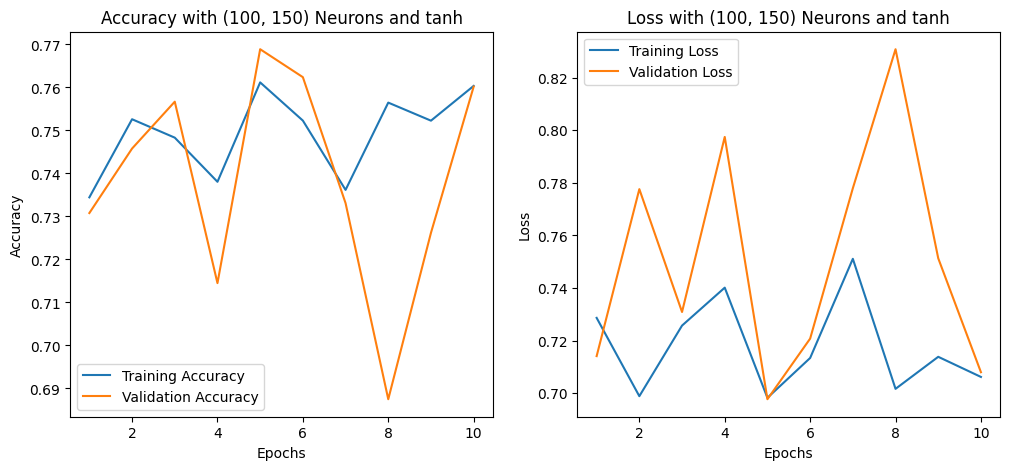

313/313 - 1s - 2ms/step - accuracy: 0.7602 - loss: 0.7080
Test Accuracy with (100, 150) Neurons: 0.7602
Test Loss with (100, 150) Neurons: 0.7080

Training model with hidden layers (200, 250) neurons and activation 'tanh'...
Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.6897 - loss: 0.8725 - val_accuracy: 0.7083 - val_loss: 0.8251
Epoch 2/10
1875/1875 - 7s - 4ms/step - accuracy: 0.6837 - loss: 0.9312 - val_accuracy: 0.6146 - val_loss: 0.9049
Epoch 3/10
1875/1875 - 10s - 6ms/step - accuracy: 0.6947 - loss: 0.9351 - val_accuracy: 0.7180 - val_loss: 0.9474
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.6945 - loss: 0.9335 - val_accuracy: 0.7070 - val_loss: 0.9982
Epoch 5/10
1875/1875 - 8s - 4ms/step - accuracy: 0.7001 - loss: 0.9188 - val_accuracy: 0.6951 - val_loss: 0.9039
Epoch 6/10
1875/1875 - 7s - 4ms/step - accuracy: 0.7068 - loss: 0.9057 - val_accuracy: 0.6708 - val_loss: 0.9904
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.7134 - loss: 0.8958 - val_accuracy: 0.6987 

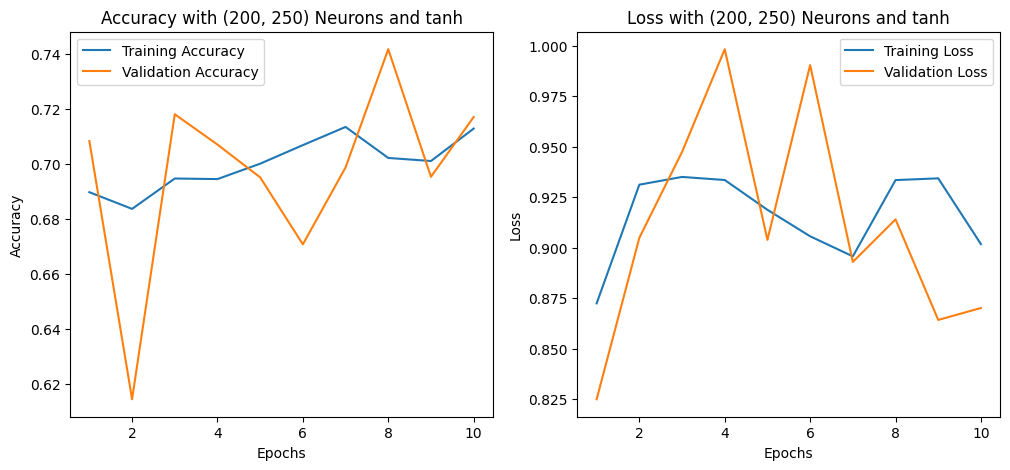

313/313 - 1s - 2ms/step - accuracy: 0.7170 - loss: 0.8702
Test Accuracy with (200, 250) Neurons: 0.7170
Test Loss with (200, 250) Neurons: 0.8702

Training model with hidden layers (50, 150, 250) neurons and activation 'tanh'...
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7158 - loss: 0.8390 - val_accuracy: 0.7349 - val_loss: 0.7924
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7219 - loss: 0.8275 - val_accuracy: 0.7265 - val_loss: 0.8288
Epoch 3/10
1875/1875 - 11s - 6ms/step - accuracy: 0.7175 - loss: 0.8394 - val_accuracy: 0.6629 - val_loss: 1.0749
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.6854 - loss: 0.8963 - val_accuracy: 0.6508 - val_loss: 0.8634
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.6830 - loss: 0.9073 - val_accuracy: 0.7447 - val_loss: 0.7798
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.7107 - loss: 0.8585 - val_accuracy: 0.6846 - val_loss: 0.9557
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.6883 - loss: 0.9048 - val_accuracy: 0.67

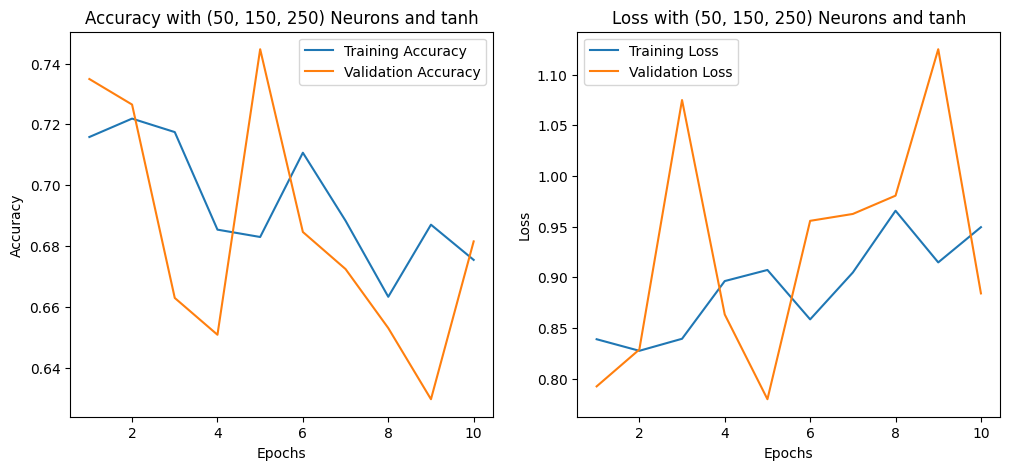

313/313 - 1s - 3ms/step - accuracy: 0.6815 - loss: 0.8842
Test Accuracy with (50, 150, 250) Neurons: 0.6815
Test Loss with (50, 150, 250) Neurons: 0.8842

Training model with hidden layers (50, 50) neurons and activation 'leakyrelu'...
Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7994 - loss: 0.5624 - val_accuracy: 0.7785 - val_loss: 0.5524
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8285 - loss: 0.4893 - val_accuracy: 0.8354 - val_loss: 0.4720
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8378 - loss: 0.4653 - val_accuracy: 0.8253 - val_loss: 0.5139
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8432 - loss: 0.4464 - val_accuracy: 0.8201 - val_loss: 0.5562
Epoch 5/10
1875/1875 - 7s - 3ms/step - accuracy: 0.8468 - loss: 0.4429 - val_accuracy: 0.8424 - val_loss: 0.4727
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8506 - loss: 0.4333 - val_accuracy: 0.8264 - val_loss: 0.5098
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8548 - loss: 0.4178 - val_accuracy

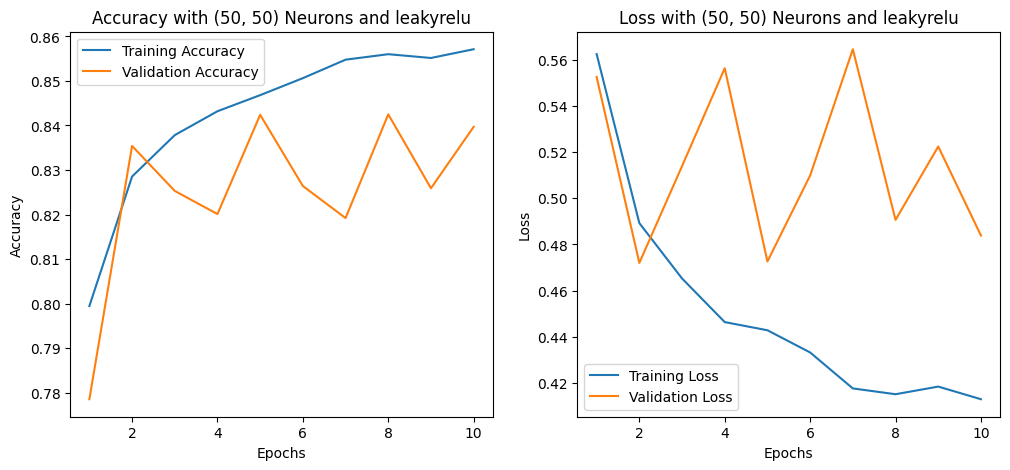

313/313 - 0s - 2ms/step - accuracy: 0.8397 - loss: 0.4839
Test Accuracy with (50, 50) Neurons: 0.8397
Test Loss with (50, 50) Neurons: 0.4839

Training model with hidden layers (50, 100) neurons and activation 'leakyrelu'...
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7944 - loss: 0.5909 - val_accuracy: 0.8289 - val_loss: 0.4761
Epoch 2/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8272 - loss: 0.5050 - val_accuracy: 0.8172 - val_loss: 0.5562
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8352 - loss: 0.4837 - val_accuracy: 0.8223 - val_loss: 0.5256
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8419 - loss: 0.4639 - val_accuracy: 0.8473 - val_loss: 0.4560
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8421 - loss: 0.4704 - val_accuracy: 0.8480 - val_loss: 0.4536
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8462 - loss: 0.4519 - val_accuracy: 0.8288 - val_loss: 0.4911
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8504 - loss: 0.4463 - val_accuracy: 0.8443 - v

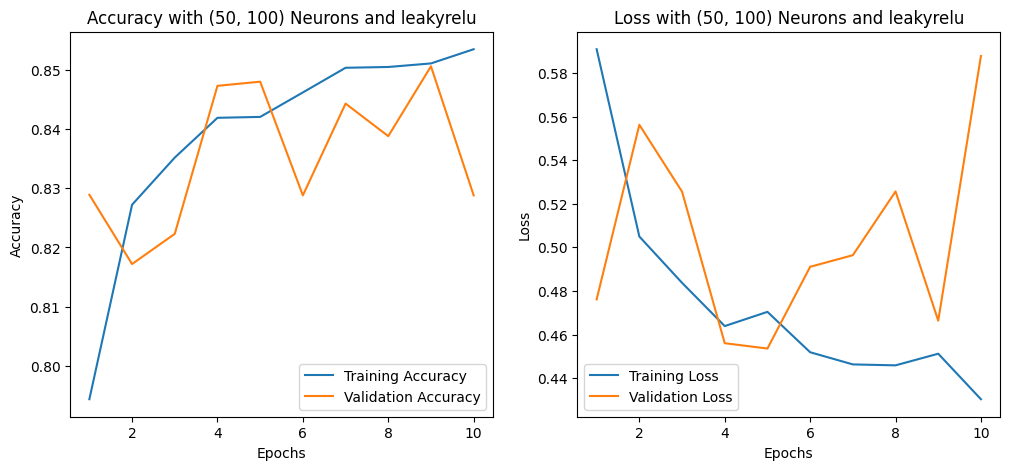

313/313 - 1s - 2ms/step - accuracy: 0.8288 - loss: 0.5878
Test Accuracy with (50, 100) Neurons: 0.8288
Test Loss with (50, 100) Neurons: 0.5878

Training model with hidden layers (100, 100) neurons and activation 'leakyrelu'...
Epoch 1/10
1875/1875 - 7s - 3ms/step - accuracy: 0.7905 - loss: 0.6124 - val_accuracy: 0.8156 - val_loss: 0.5431
Epoch 2/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8163 - loss: 0.5828 - val_accuracy: 0.8220 - val_loss: 0.5343
Epoch 3/10
1875/1875 - 10s - 6ms/step - accuracy: 0.8340 - loss: 0.4926 - val_accuracy: 0.8339 - val_loss: 0.4920
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8365 - loss: 0.5040 - val_accuracy: 0.7866 - val_loss: 0.8224
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8380 - loss: 0.5119 - val_accuracy: 0.8373 - val_loss: 0.5233
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8436 - loss: 0.4919 - val_accuracy: 0.8335 - val_loss: 0.5497
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8433 - loss: 0.5050 - val_accuracy: 0.792

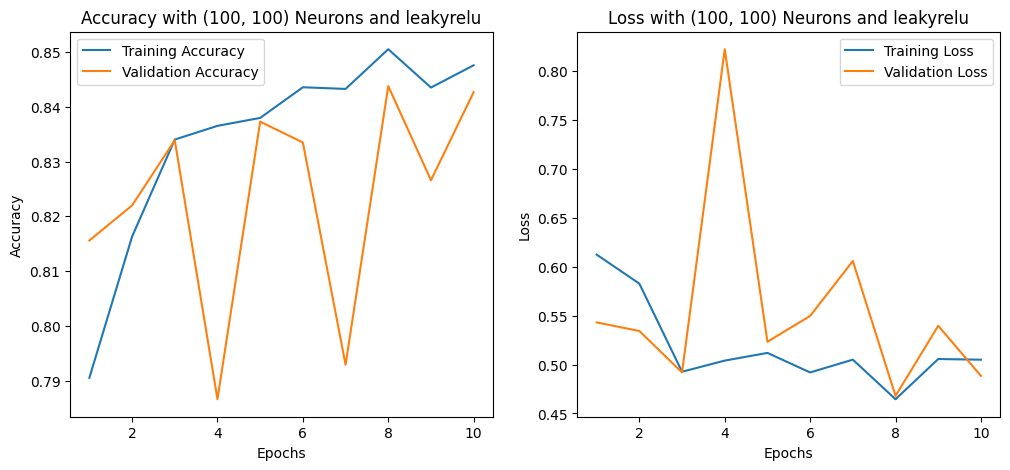

313/313 - 1s - 2ms/step - accuracy: 0.8427 - loss: 0.4884
Test Accuracy with (100, 100) Neurons: 0.8427
Test Loss with (100, 100) Neurons: 0.4884

Training model with hidden layers (100, 150) neurons and activation 'leakyrelu'...
Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.7819 - loss: 0.6447 - val_accuracy: 0.8012 - val_loss: 0.6080
Epoch 2/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8097 - loss: 0.6260 - val_accuracy: 0.8027 - val_loss: 0.7262
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8343 - loss: 0.4924 - val_accuracy: 0.8487 - val_loss: 0.4732
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8267 - loss: 0.7940 - val_accuracy: 0.8312 - val_loss: 0.4881
Epoch 5/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8403 - loss: 0.4897 - val_accuracy: 0.8180 - val_loss: 0.6234
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8317 - loss: 0.5862 - val_accuracy: 0.8294 - val_loss: 0.5668
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8328 - loss: 0.7453 - val_accuracy: 0.81

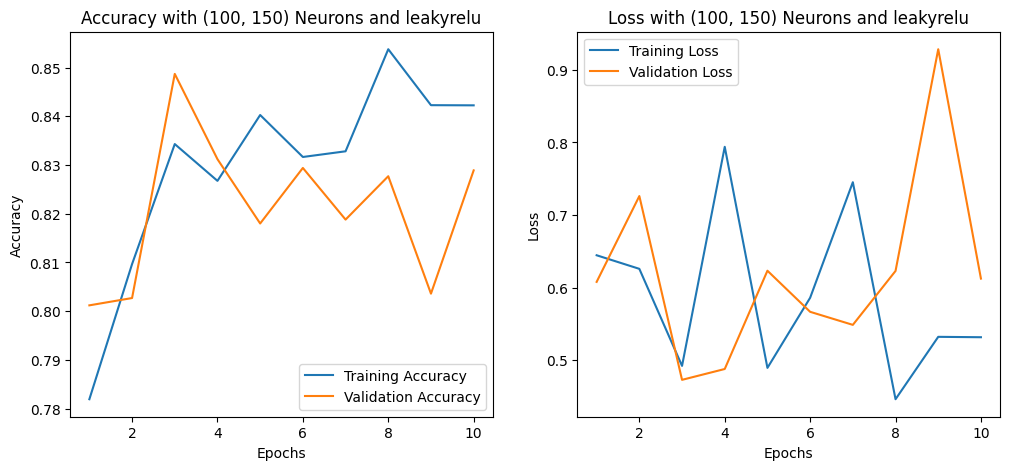

313/313 - 1s - 2ms/step - accuracy: 0.8289 - loss: 0.6126
Test Accuracy with (100, 150) Neurons: 0.8289
Test Loss with (100, 150) Neurons: 0.6126

Training model with hidden layers (200, 250) neurons and activation 'leakyrelu'...
Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.7635 - loss: 0.8086 - val_accuracy: 0.8057 - val_loss: 0.5763
Epoch 2/10
1875/1875 - 11s - 6ms/step - accuracy: 0.7929 - loss: 1.9940 - val_accuracy: 0.8072 - val_loss: 0.8098
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8328 - loss: 0.5740 - val_accuracy: 0.7712 - val_loss: 0.8763
Epoch 4/10
1875/1875 - 7s - 3ms/step - accuracy: 0.8173 - loss: 0.7851 - val_accuracy: 0.7958 - val_loss: 1.1383
Epoch 5/10
1875/1875 - 10s - 6ms/step - accuracy: 0.8154 - loss: 3.2774 - val_accuracy: 0.8329 - val_loss: 0.6361
Epoch 6/10
1875/1875 - 8s - 4ms/step - accuracy: 0.8319 - loss: 0.6866 - val_accuracy: 0.8401 - val_loss: 0.6131
Epoch 7/10
1875/1875 - 10s - 6ms/step - accuracy: 0.8315 - loss: 0.6564 - val_accuracy: 0

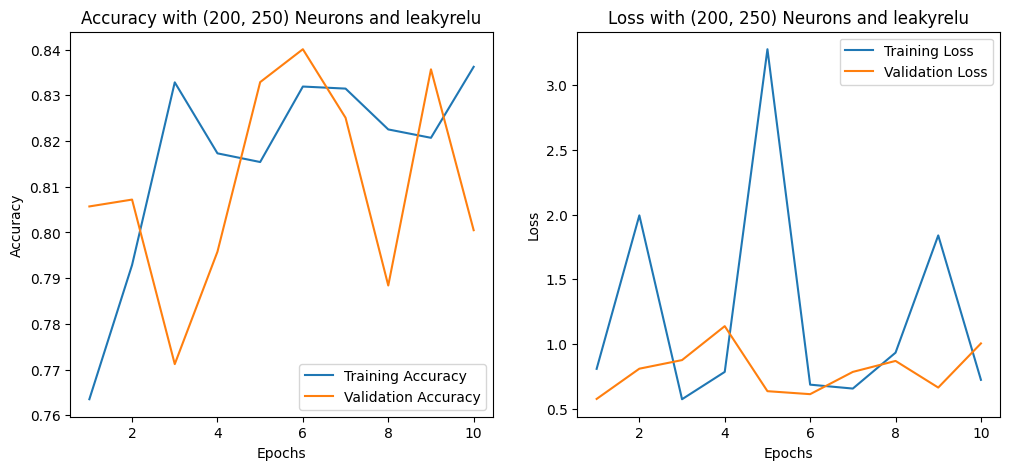

313/313 - 1s - 2ms/step - accuracy: 0.8005 - loss: 1.0050
Test Accuracy with (200, 250) Neurons: 0.8005
Test Loss with (200, 250) Neurons: 1.0050

Training model with hidden layers (50, 150, 250) neurons and activation 'leakyrelu'...
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7631 - loss: 0.7799 - val_accuracy: 0.7834 - val_loss: 0.6289
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8257 - loss: 0.5138 - val_accuracy: 0.7882 - val_loss: 0.6599
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7917 - loss: 7.7119 - val_accuracy: 0.8090 - val_loss: 0.8524
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8282 - loss: 0.6024 - val_accuracy: 0.8133 - val_loss: 0.6431
Epoch 5/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8331 - loss: 0.5292 - val_accuracy: 0.8097 - val_loss: 0.5764
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8262 - loss: 0.5617 - val_accuracy: 0.8256 - val_loss: 0.5612
Epoch 7/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8012 - loss: 4.6280 - val_accuracy: 0

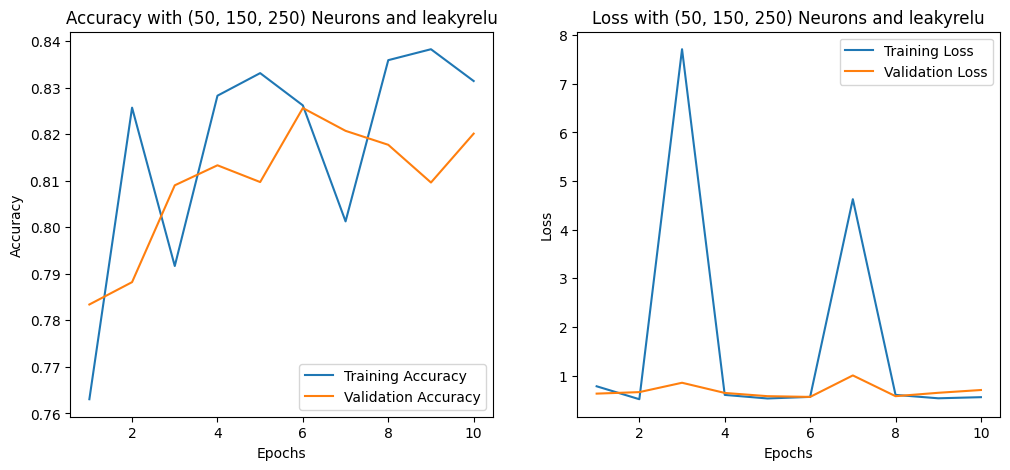

313/313 - 0s - 2ms/step - accuracy: 0.8201 - loss: 0.7032
Test Accuracy with (50, 150, 250) Neurons: 0.8201
Test Loss with (50, 150, 250) Neurons: 0.7032

Final Evaluation Results for All Configurations:
    hidden_neurons  test_accuracy  test_loss hidden_activation_function
0         (50, 50)         0.8541   0.435360                       relu
1        (50, 100)         0.8392   0.479062                       relu
2       (100, 100)         0.8451   0.442505                       relu
3       (100, 150)         0.8370   0.486412                       relu
4       (200, 250)         0.8355   0.476712                       relu
5   (50, 150, 250)         0.8095   0.555611                       relu
6         (50, 50)         0.7990   0.573950                       tanh
7        (50, 100)         0.7750   0.631132                       tanh
8       (100, 100)         0.7286   0.753255                       tanh
9       (100, 150)         0.7602   0.707975                       tanh
10  

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

# List to store final results
final_results_adam_all_ac = []

def train_and_evaluate_model(hidden_neurons_config, epochs=20, learning_rate=0.01, hidd_activation='relu'):

    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # Normalize the pixel values of the images to be between 0 and 1
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    for hidden_neurons in hidden_neurons_config:
        print(f"\nTraining model with hidden layers {hidden_neurons} neurons and activation '{hidd_activation}'...")

        # Build the model
        model = Sequential([Flatten(input_shape=(28, 28))])  # First layer: Flatten input

        for neurons in hidden_neurons:
            if hidd_activation.lower() == "leakyrelu":
                model.add(Dense(neurons))  # Dense layer without activation
                model.add(LeakyReLU())  # Add LeakyReLU as a separate layer
            else:
                model.add(Dense(neurons, activation=hidd_activation))

        # Output layer with 10 nodes for 10 class labels
        model.add(Dense(10, activation='softmax'))

        # Compile the model
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model and save history for plotting
        history = model.fit(train_images, train_labels, epochs=epochs,
                            validation_data=(test_images, test_labels), verbose=2)

        # Extract training and validation data
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Plot the results
        epochs_range = range(1, len(train_acc) + 1)
        plt.figure(figsize=(12, 5))

        # Accuracy Plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.title(f'Accuracy with {hidden_neurons} Neurons and {hidd_activation}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss Plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, train_loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.title(f'Loss with {hidden_neurons} Neurons and {hidd_activation}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

        # Evaluate the model
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
        print(f"Test Accuracy with {hidden_neurons} Neurons: {test_acc:.4f}")
        print(f"Test Loss with {hidden_neurons} Neurons: {test_loss:.4f}")

        # Store final results for each configuration
        final_results_adam_all_ac.append({
            'hidden_neurons': hidden_neurons,
            'test_accuracy': test_acc,
            'test_loss': test_loss,
            'hidden_activation_function': hidd_activation,
        })

# Example usage:

# Configuration with increasing neurons in steps of 50:
# Two hidden layers: (50 → 50), (50 → 100), (100 → 100), (100 → 150), (200 → 250)
# Three hidden layers: (50 → 150 → 250)
hidden_neurons_config = [(50, 50), (50, 100), (100, 100), (100, 150), (200, 250), (50, 150, 250)]

# Run experiments with different activation functions
train_and_evaluate_model(hidden_neurons_config, epochs=10, learning_rate=0.01, hidd_activation='relu')
train_and_evaluate_model(hidden_neurons_config, epochs=10, learning_rate=0.01, hidd_activation='tanh')
train_and_evaluate_model(hidden_neurons_config, epochs=10, learning_rate=0.01, hidd_activation='leakyrelu')

# Print final results for all configurations
print("\nFinal Evaluation Results for All Configurations:")
results_df_adam_all = pd.DataFrame(final_results_adam_all_ac)
print(results_df_adam_all)



Training model with hidden layers (50, 50) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 - 4s - 2ms/step - accuracy: 0.7340 - loss: 0.7913 - val_accuracy: 0.8058 - val_loss: 0.5668
Epoch 2/2
1875/1875 - 4s - 2ms/step - accuracy: 0.8207 - loss: 0.5150 - val_accuracy: 0.8049 - val_loss: 0.5347


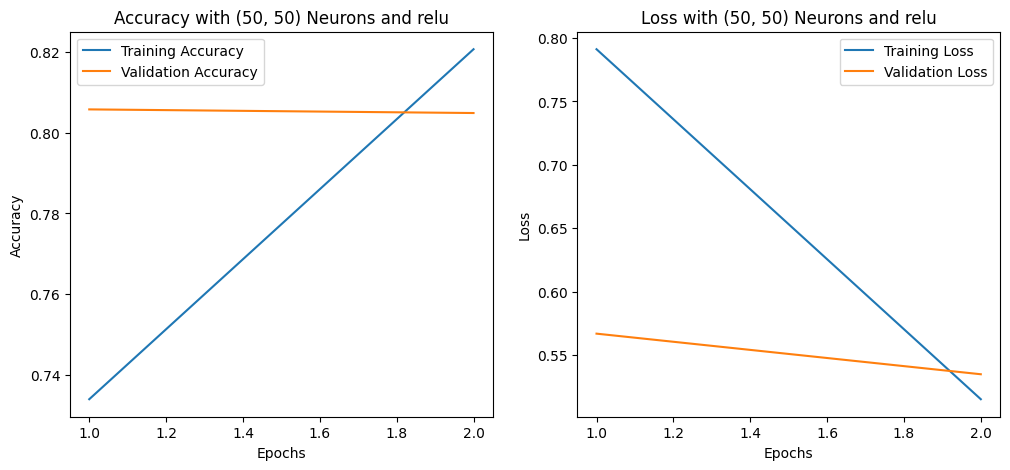

313/313 - 0s - 2ms/step - accuracy: 0.8049 - loss: 0.5347
Test Accuracy with (50, 50) Neurons: 0.8049
Test Loss with (50, 50) Neurons: 0.5347
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


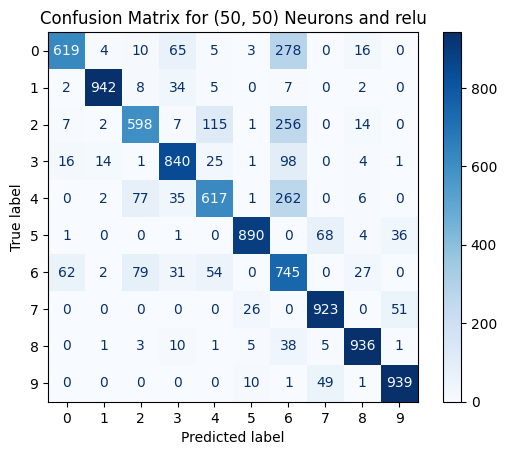


Training model with hidden layers (50, 100) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 - 4s - 2ms/step - accuracy: 0.7437 - loss: 0.7734 - val_accuracy: 0.8030 - val_loss: 0.5637
Epoch 2/2
1875/1875 - 6s - 3ms/step - accuracy: 0.8214 - loss: 0.5110 - val_accuracy: 0.8229 - val_loss: 0.5024


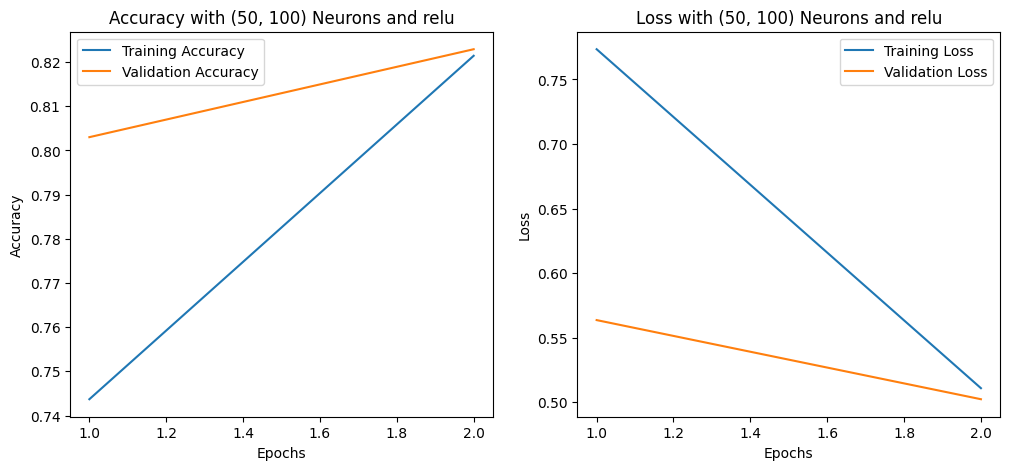

313/313 - 0s - 2ms/step - accuracy: 0.8229 - loss: 0.5024
Test Accuracy with (50, 100) Neurons: 0.8229
Test Loss with (50, 100) Neurons: 0.5024
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


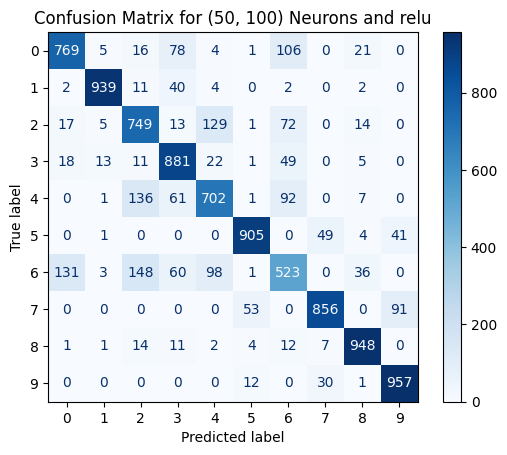


Training model with hidden layers (100, 100) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 - 5s - 3ms/step - accuracy: 0.7434 - loss: 0.7624 - val_accuracy: 0.8098 - val_loss: 0.5508
Epoch 2/2
1875/1875 - 6s - 3ms/step - accuracy: 0.8271 - loss: 0.4980 - val_accuracy: 0.8316 - val_loss: 0.4863


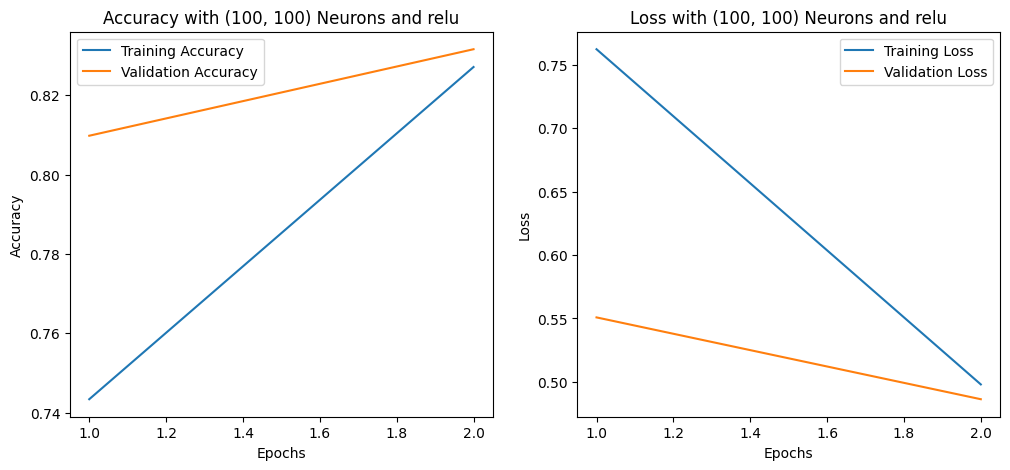

313/313 - 1s - 2ms/step - accuracy: 0.8316 - loss: 0.4863
Test Accuracy with (100, 100) Neurons: 0.8316
Test Loss with (100, 100) Neurons: 0.4863
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


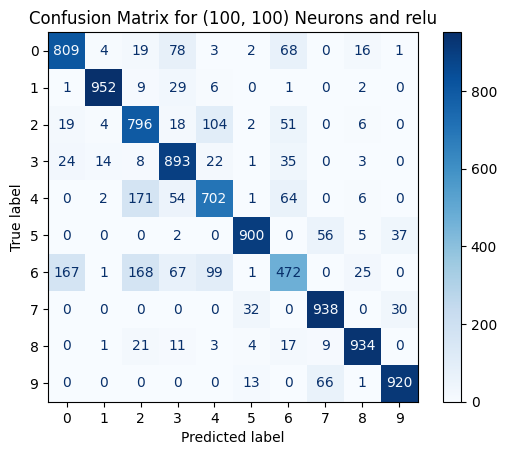


Training model with hidden layers (100, 150) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 - 6s - 3ms/step - accuracy: 0.7486 - loss: 0.7595 - val_accuracy: 0.8033 - val_loss: 0.5603
Epoch 2/2
1875/1875 - 4s - 2ms/step - accuracy: 0.8248 - loss: 0.5021 - val_accuracy: 0.8242 - val_loss: 0.4988


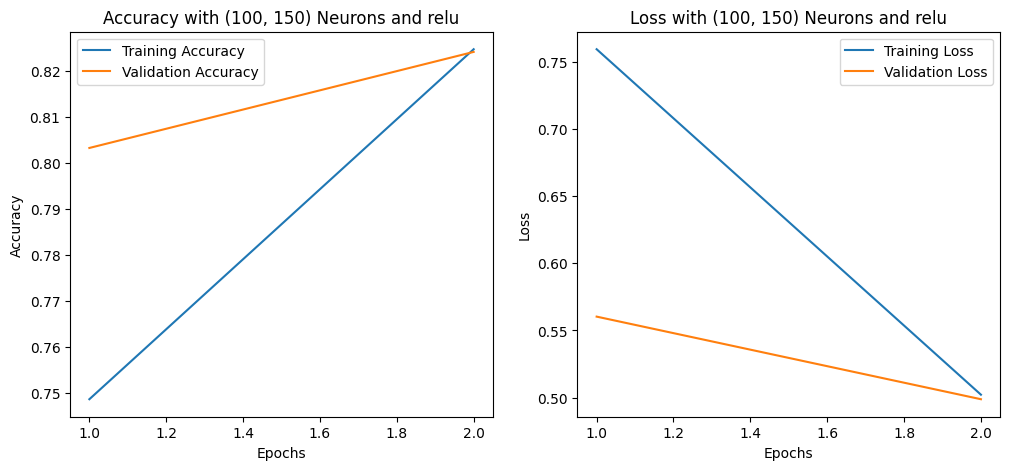

313/313 - 1s - 2ms/step - accuracy: 0.8242 - loss: 0.4988
Test Accuracy with (100, 150) Neurons: 0.8242
Test Loss with (100, 150) Neurons: 0.4988
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


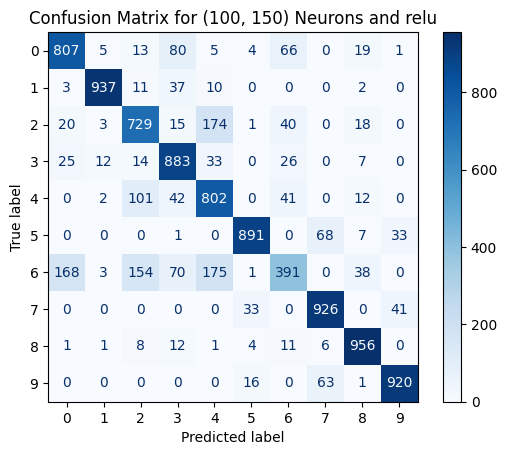


Training model with hidden layers (200, 250) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 - 7s - 4ms/step - accuracy: 0.7675 - loss: 0.7057 - val_accuracy: 0.8150 - val_loss: 0.5387
Epoch 2/2
1875/1875 - 10s - 5ms/step - accuracy: 0.8314 - loss: 0.4832 - val_accuracy: 0.8135 - val_loss: 0.5179


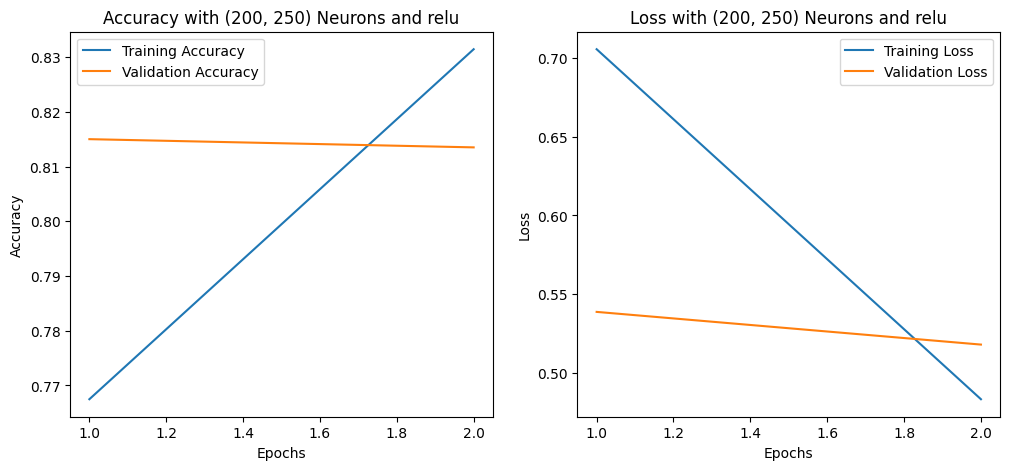

313/313 - 1s - 2ms/step - accuracy: 0.8135 - loss: 0.5179
Test Accuracy with (200, 250) Neurons: 0.8135
Test Loss with (200, 250) Neurons: 0.5179
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


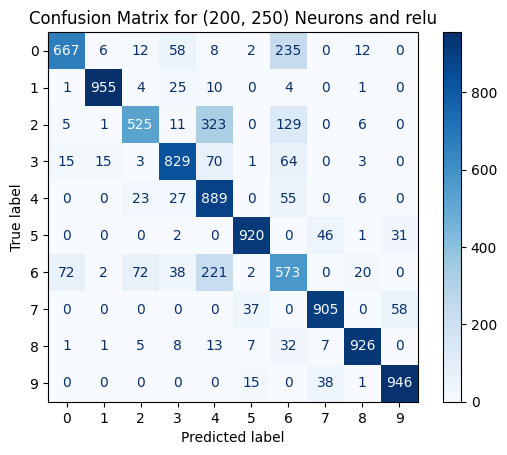


Training model with hidden layers (50, 150, 250) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 - 5s - 3ms/step - accuracy: 0.7160 - loss: 0.8166 - val_accuracy: 0.8032 - val_loss: 0.5701
Epoch 2/2
1875/1875 - 5s - 3ms/step - accuracy: 0.8242 - loss: 0.5064 - val_accuracy: 0.8189 - val_loss: 0.5063


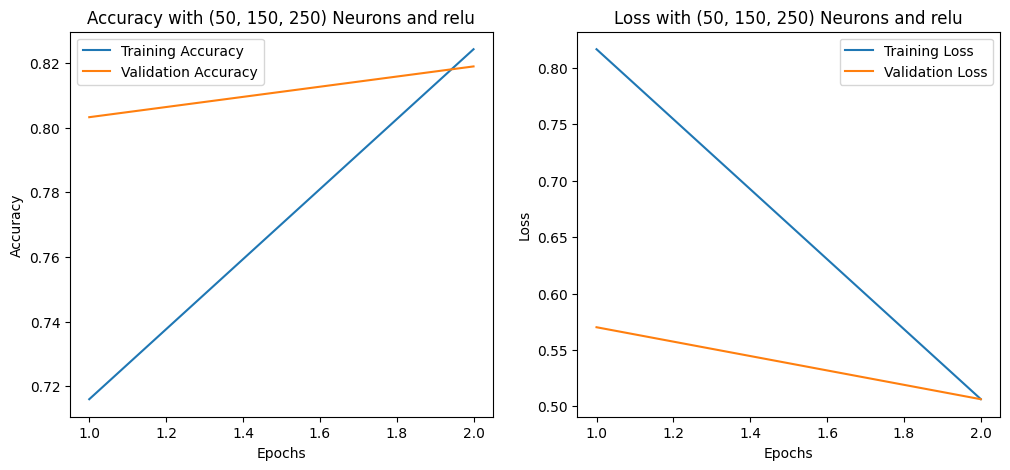

313/313 - 0s - 2ms/step - accuracy: 0.8189 - loss: 0.5063
Test Accuracy with (50, 150, 250) Neurons: 0.8189
Test Loss with (50, 150, 250) Neurons: 0.5063
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


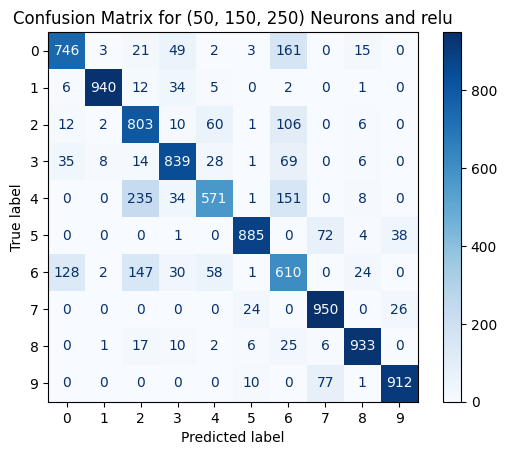


Final Evaluation Results for All Configurations:
   hidden_neurons  test_accuracy  test_loss hidden_activation_function
0        (50, 50)         0.8049   0.534739                       relu
1       (50, 100)         0.8229   0.502421                       relu
2      (100, 100)         0.8316   0.486290                       relu
3      (100, 150)         0.8242   0.498771                       relu
4      (200, 250)         0.8135   0.517924                       relu
5  (50, 150, 250)         0.8189   0.506285                       relu


In [ ]:
#Different layers outcomes using relu activation function and 3 epoch and using sgd

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# List to store final results
final_results_sgd_all_ac = []

def train_and_evaluate_model(hidden_neurons_config, epochs=20, learning_rate=0.01, hidd_activation='relu'):
    """
    Function to train and evaluate a model with varying numbers of neurons in the hidden layers.
    It also prints the final evaluation results for each configuration.

    Parameters:
    - hidden_neurons_config (list): List of tuples where each tuple contains the number of neurons for respective layers.
    - epochs (int): Number of epochs for training (default is 20).
    - learning_rate (float): Learning rate for the optimizer (default is 0.01).
    - hidd_activation (str): Activation function to use in hidden layers (default is 'relu').
    """
    # Load the Fashion MNIST dataset
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # Normalize the pixel values of the images to be between 0 and 1
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    for hidden_neurons in hidden_neurons_config:
        print(f"\nTraining model with hidden layers {hidden_neurons} neurons and activation '{hidd_activation}'...")

        # Build the model
        model = Sequential([Flatten(input_shape=(28, 28))])  # First layer: Flatten input

        for neurons in hidden_neurons:
            if hidd_activation.lower() == "leakyrelu":
                model.add(Dense(neurons))  # Dense layer without activation
                model.add(LeakyReLU())  # Add LeakyReLU as a separate layer
            else:
                model.add(Dense(neurons, activation=hidd_activation))

        # Output layer with 10 nodes for 10 class labels
        model.add(Dense(10, activation='softmax'))

        # Compile the model
        optimizer = SGD(learning_rate=learning_rate)
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model and save history for plotting
        history = model.fit(train_images, train_labels, epochs=epochs,
                            validation_data=(test_images, test_labels), verbose=2)

        # Extract training and validation data
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Plot the results
        epochs_range = range(1, len(train_acc) + 1)
        plt.figure(figsize=(12, 5))

        # Accuracy Plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.title(f'Accuracy with {hidden_neurons} Neurons and {hidd_activation}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss Plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, train_loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.title(f'Loss with {hidden_neurons} Neurons and {hidd_activation}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

        # Evaluate the model
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
        print(f"Test Accuracy with {hidden_neurons} Neurons: {test_acc:.4f}")
        print(f"Test Loss with {hidden_neurons} Neurons: {test_loss:.4f}")

        # Predict on the test data
        y_pred = model.predict(test_images)
        # Convert probabilities to class labels
        y_pred_classes = tf.argmax(y_pred, axis=1)

        # Generate the confusion matrix
        cm = confusion_matrix(test_labels, y_pred_classes)

        # Display the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix for {hidden_neurons} Neurons and {hidd_activation}")
        plt.show()

        # Store final results for each configuration
        final_results_sgd_all_ac.append({
            'hidden_neurons': hidden_neurons,
            'test_accuracy': test_acc,
            'test_loss': test_loss,
            'hidden_activation_function': hidd_activation,
        })

# Example usage:


hidden_neurons_config = [(50, 50), (50, 100), (100, 100), (100, 150), (200, 250), (50, 150, 250)]


# Run experiments with different activation functions
train_and_evaluate_model(hidden_neurons_config, epochs=2, learning_rate=0.01, hidd_activation='relu')
# train_and_evaluate_model(hidden_neurons_config, epochs=100, learning_rate=0.01, hidd_activation='tanh')
# train_and_evaluate_model(hidden_neurons_config, epochs=100, learning_rate=0.01, hidd_activation='leakyrelu')

# Print final results for all configurations
print("\nFinal Evaluation Results for All Configurations:")
results_df_sgd_all = pd.DataFrame(final_results_sgd_all_ac)
print(results_df_sgd_all)



Training model with hidden layers (50, 50) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7468 - loss: 0.7744 - val_accuracy: 0.8012 - val_loss: 0.5656
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8255 - loss: 0.5051 - val_accuracy: 0.8137 - val_loss: 0.5125
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8394 - loss: 0.4577 - val_accuracy: 0.8352 - val_loss: 0.4624
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8484 - loss: 0.4306 - val_accuracy: 0.8460 - val_loss: 0.4395
Epoch 5/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8561 - loss: 0.4116 - val_accuracy: 0.8472 - val_loss: 0.4342
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8614 - loss: 0.3960 - val_accuracy: 0.8462 - val_loss: 0.4272
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8643 - loss: 0.3853 - val_accuracy: 0.8416 - val_loss: 0.4274
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8672 - loss: 0.3754 - val_accuracy: 0.8557 - val_loss: 0.4046
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8708 - loss: 0.3665 - val_accuracy: 0.8530 - 

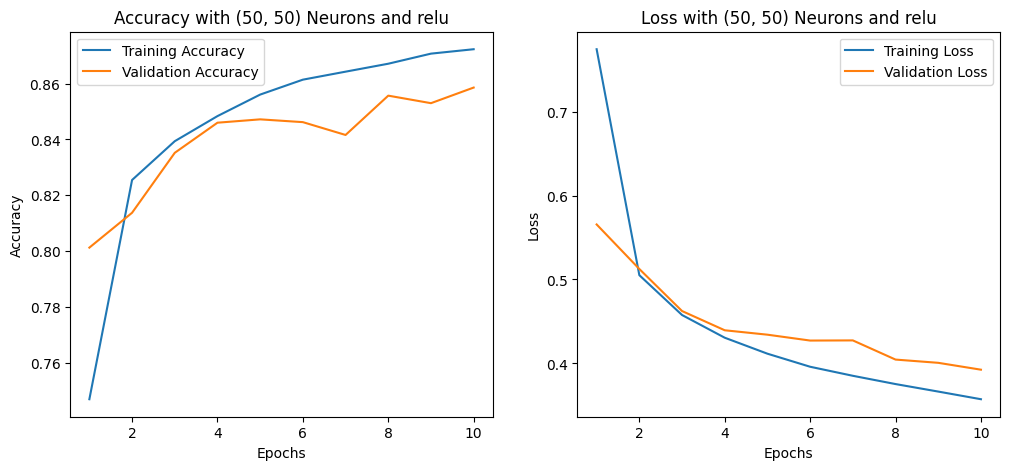

313/313 - 0s - 2ms/step - accuracy: 0.8586 - loss: 0.3925
Test Accuracy with (50, 50) Neurons: 0.8586
Test Loss with (50, 50) Neurons: 0.3925
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


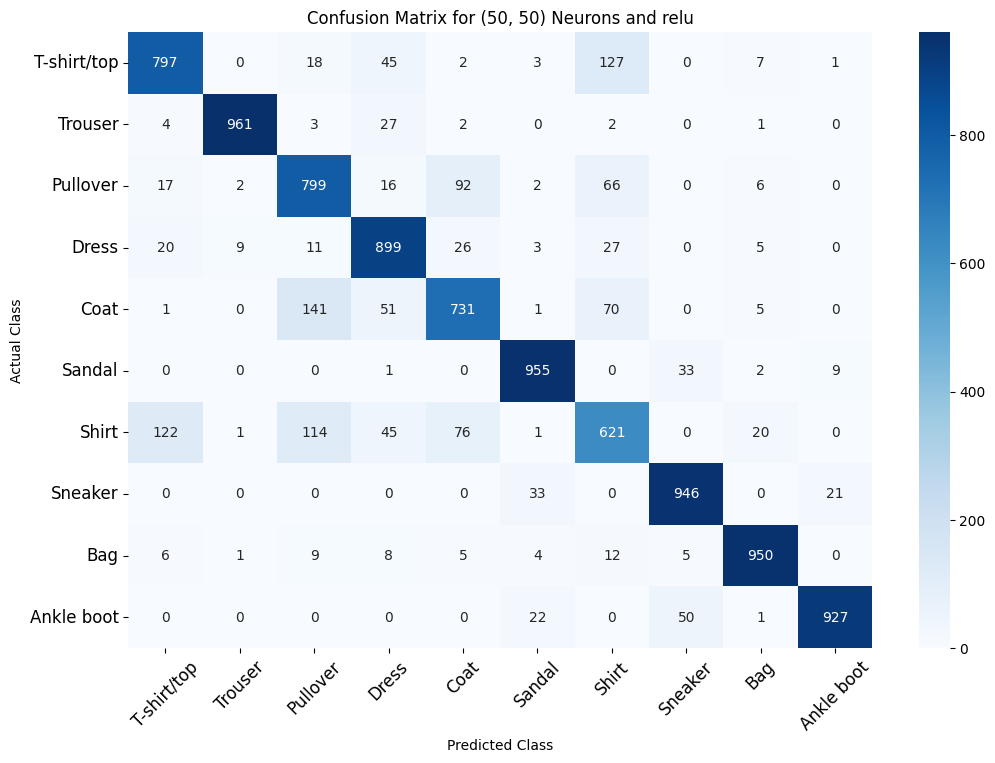


Classification Report for (50, 50) Neurons and relu:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.80      0.81      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.73      0.80      0.76      1000
       Dress       0.82      0.90      0.86      1000
        Coat       0.78      0.73      0.76      1000
      Sandal       0.93      0.95      0.94      1000
       Shirt       0.67      0.62      0.65      1000
     Sneaker       0.91      0.95      0.93      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (50, 100) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7329 - loss: 0.8028 - val_accuracy: 0.8059 - val_loss: 0.5623
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8216 - loss: 0.5112 - val_accuracy: 0.8235 - val_loss: 0.4953
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8379 - loss: 0.4631 - val_accuracy: 0.8289 - val_loss: 0.4778
Epoch 4/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8467 - loss: 0.4354 - val_accuracy: 0.8331 - val_loss: 0.4691
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8526 - loss: 0.4159 - val_accuracy: 0.8431 - val_loss: 0.4375
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8583 - loss: 0.4007 - val_accuracy: 0.8525 - val_loss: 0.4209
Epoch 7/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8624 - loss: 0.3870 - val_accuracy: 0.8476 - val_loss: 0.4250
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8658 - loss: 0.3773 - val_accuracy: 0.8555 - val_loss: 0.4090
Epoch 9/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8674 - loss: 0.3673 - val_accuracy: 0.8606 - 

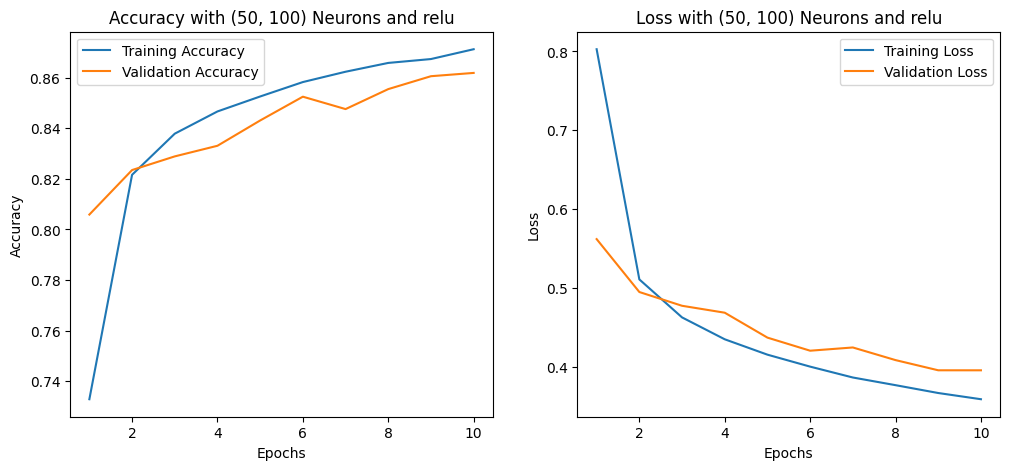

313/313 - 0s - 2ms/step - accuracy: 0.8619 - loss: 0.3961
Test Accuracy with (50, 100) Neurons: 0.8619
Test Loss with (50, 100) Neurons: 0.3961
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


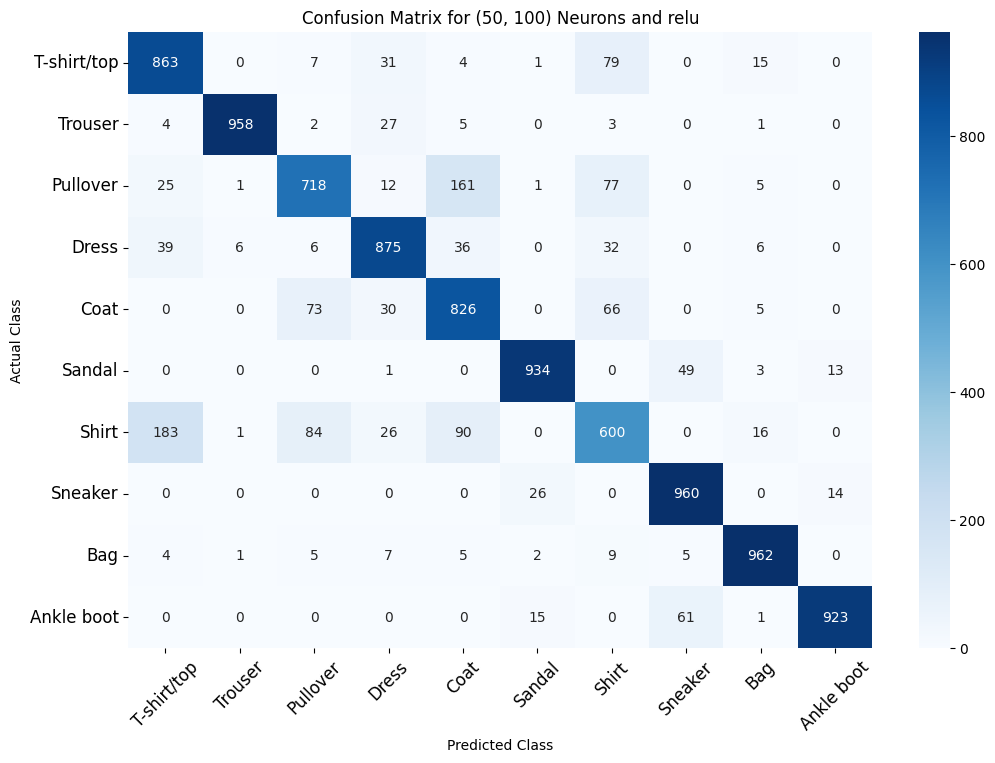


Classification Report for (50, 100) Neurons and relu:

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.86      0.81      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.80      0.72      0.76      1000
       Dress       0.87      0.88      0.87      1000
        Coat       0.73      0.83      0.78      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.69      0.60      0.64      1000
     Sneaker       0.89      0.96      0.93      1000
         Bag       0.95      0.96      0.96      1000
  Ankle boot       0.97      0.92      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (100, 100) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7473 - loss: 0.7590 - val_accuracy: 0.8038 - val_loss: 0.5651
Epoch 2/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8256 - loss: 0.4995 - val_accuracy: 0.8227 - val_loss: 0.4976
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8406 - loss: 0.4503 - val_accuracy: 0.8397 - val_loss: 0.4538
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8494 - loss: 0.4245 - val_accuracy: 0.8361 - val_loss: 0.4526
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8575 - loss: 0.4051 - val_accuracy: 0.8472 - val_loss: 0.4308
Epoch 6/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8621 - loss: 0.3904 - val_accuracy: 0.8497 - val_loss: 0.4231
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8661 - loss: 0.3790 - val_accuracy: 0.8487 - val_loss: 0.4198
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8696 - loss: 0.3690 - val_accuracy: 0.8579 - val_loss: 0.3985
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8730 - loss: 0.3585 - val_accuracy: 0.8592 - 

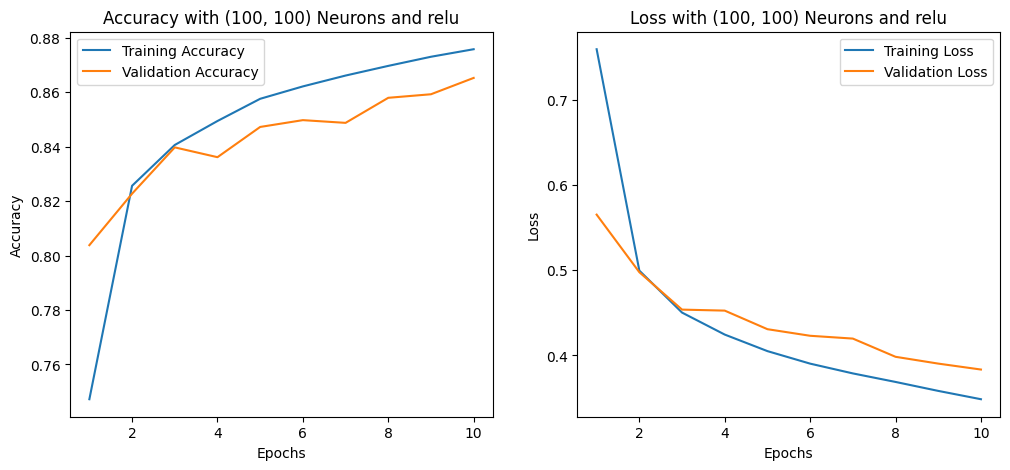

313/313 - 1s - 2ms/step - accuracy: 0.8652 - loss: 0.3835
Test Accuracy with (100, 100) Neurons: 0.8652
Test Loss with (100, 100) Neurons: 0.3835
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


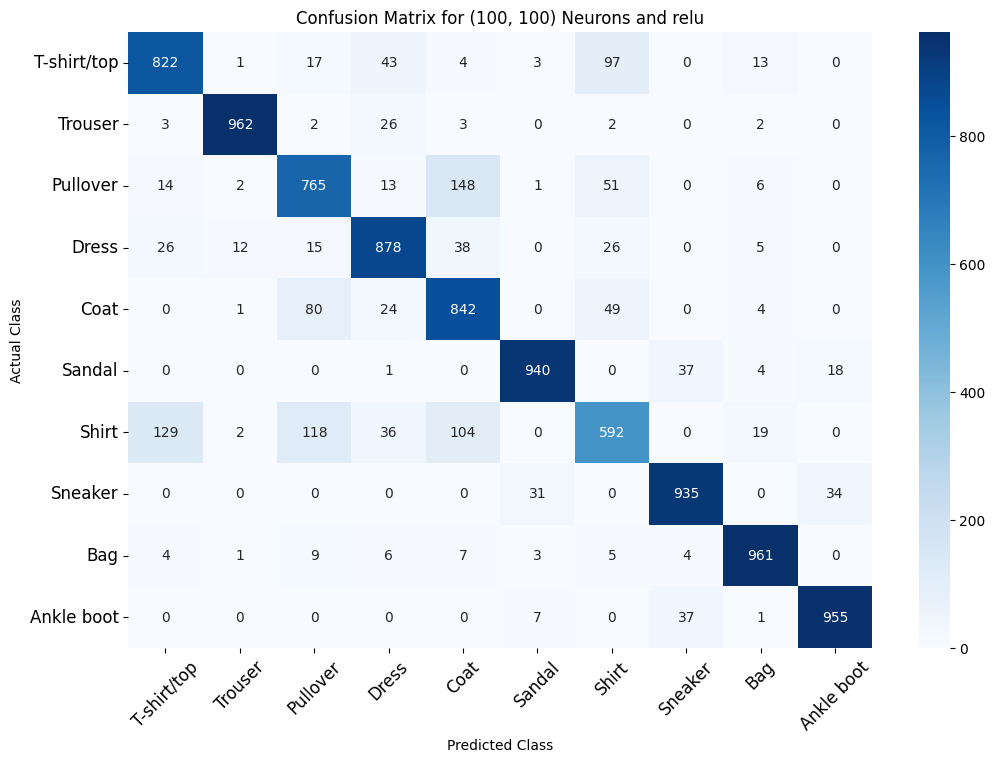


Classification Report for (100, 100) Neurons and relu:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.76      0.77      0.76      1000
       Dress       0.85      0.88      0.87      1000
        Coat       0.73      0.84      0.78      1000
      Sandal       0.95      0.94      0.95      1000
       Shirt       0.72      0.59      0.65      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.95      0.96      0.95      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.86      0.87      0.86     10000


Training model with hidden layers (100, 150) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7433 - loss: 0.7580 - val_accuracy: 0.8039 - val_loss: 0.5605
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8257 - loss: 0.5014 - val_accuracy: 0.8275 - val_loss: 0.5014
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8402 - loss: 0.4541 - val_accuracy: 0.8419 - val_loss: 0.4545
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8502 - loss: 0.4261 - val_accuracy: 0.8475 - val_loss: 0.4390
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8563 - loss: 0.4073 - val_accuracy: 0.8506 - val_loss: 0.4266
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8630 - loss: 0.3898 - val_accuracy: 0.8393 - val_loss: 0.4546
Epoch 7/10
1875/1875 - 10s - 6ms/step - accuracy: 0.8668 - loss: 0.3770 - val_accuracy: 0.8522 - val_loss: 0.4158
Epoch 8/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8715 - loss: 0.3655 - val_accuracy: 0.8571 - val_loss: 0.4079
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8744 - loss: 0.3553 - val_accuracy: 0.8570 -

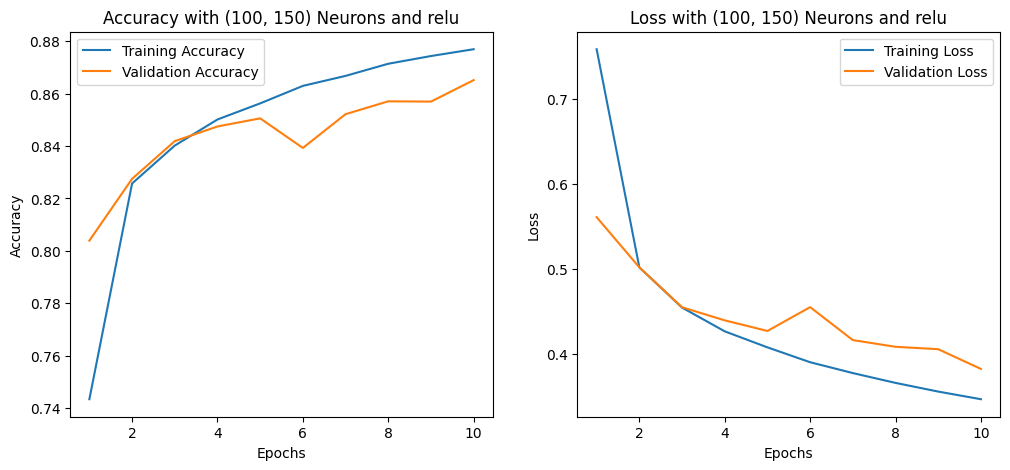

313/313 - 1s - 2ms/step - accuracy: 0.8652 - loss: 0.3819
Test Accuracy with (100, 150) Neurons: 0.8652
Test Loss with (100, 150) Neurons: 0.3819
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


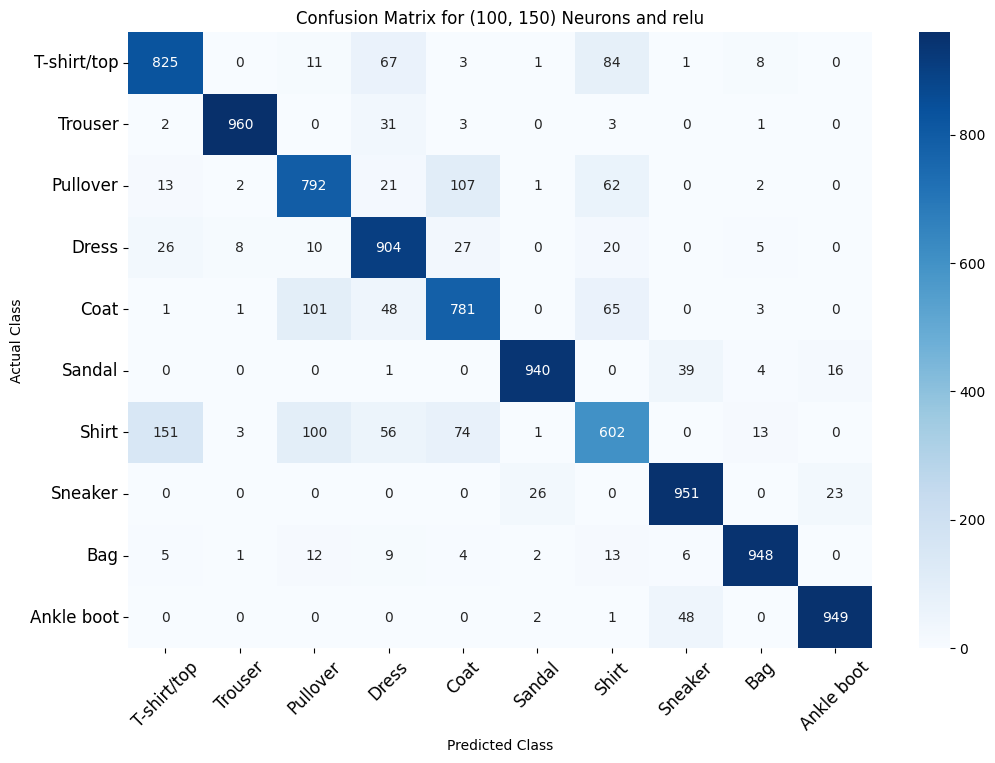


Classification Report for (100, 150) Neurons and relu:

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.77      0.79      0.78      1000
       Dress       0.80      0.90      0.85      1000
        Coat       0.78      0.78      0.78      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.71      0.60      0.65      1000
     Sneaker       0.91      0.95      0.93      1000
         Bag       0.96      0.95      0.96      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.86      0.87      0.86     10000


Training model with hidden layers (200, 250) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.7579 - loss: 0.7334 - val_accuracy: 0.8130 - val_loss: 0.5372
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8313 - loss: 0.4858 - val_accuracy: 0.8291 - val_loss: 0.4829
Epoch 3/10
1875/1875 - 7s - 3ms/step - accuracy: 0.8446 - loss: 0.4409 - val_accuracy: 0.8319 - val_loss: 0.4712
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8552 - loss: 0.4139 - val_accuracy: 0.8423 - val_loss: 0.4398
Epoch 5/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8620 - loss: 0.3933 - val_accuracy: 0.8530 - val_loss: 0.4137
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8659 - loss: 0.3783 - val_accuracy: 0.8517 - val_loss: 0.4175
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8709 - loss: 0.3645 - val_accuracy: 0.8557 - val_loss: 0.3987
Epoch 8/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8737 - loss: 0.3531 - val_accuracy: 0.8630 - val_loss: 0.3885
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8778 - loss: 0.3423 - val_accuracy: 0.8643 -

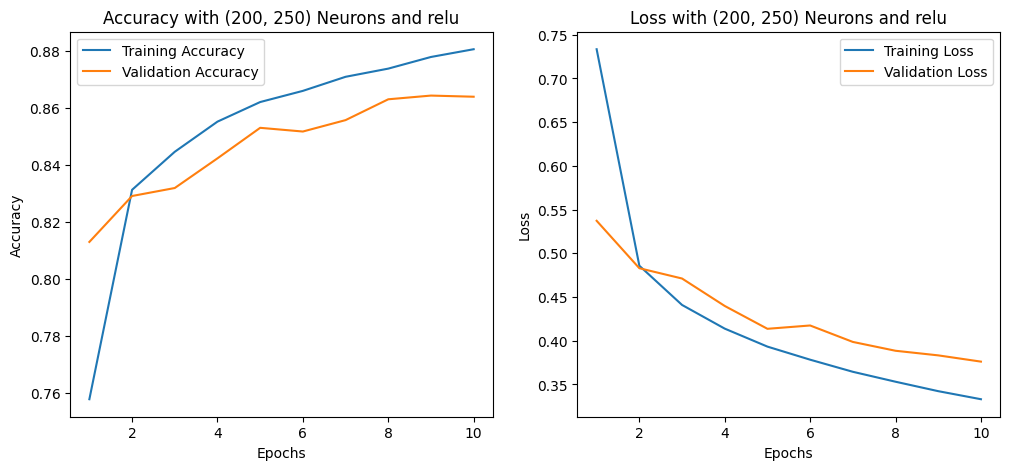

313/313 - 1s - 2ms/step - accuracy: 0.8639 - loss: 0.3761
Test Accuracy with (200, 250) Neurons: 0.8639
Test Loss with (200, 250) Neurons: 0.3761
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


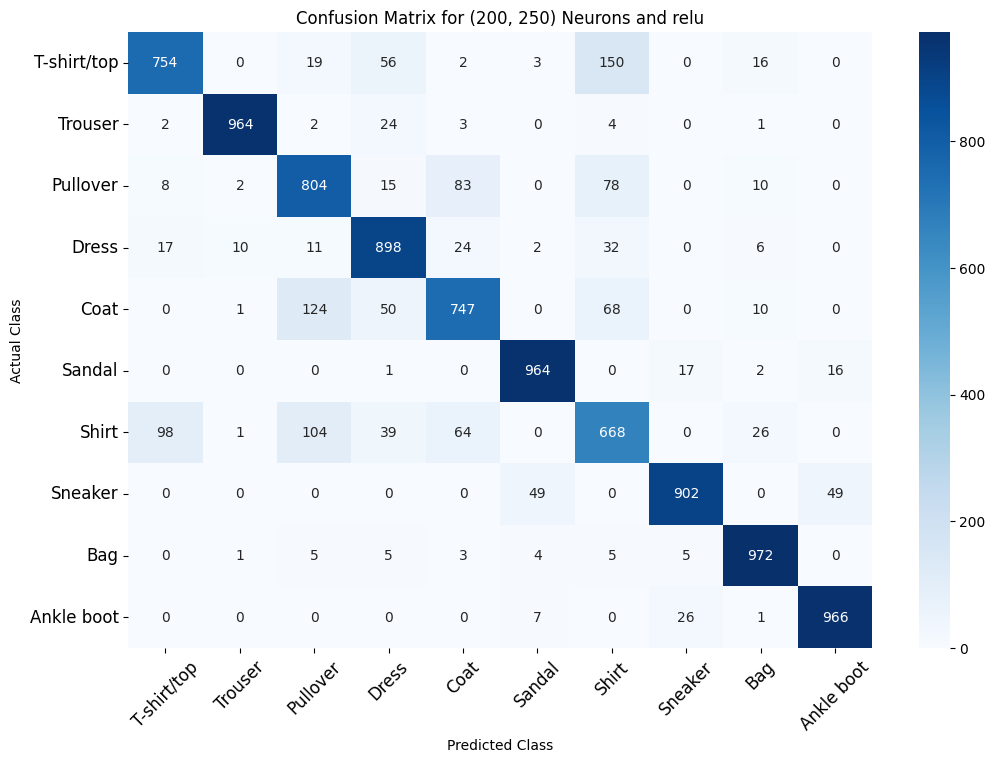


Classification Report for (200, 250) Neurons and relu:

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.75      0.80      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.75      0.80      0.78      1000
       Dress       0.83      0.90      0.86      1000
        Coat       0.81      0.75      0.78      1000
      Sandal       0.94      0.96      0.95      1000
       Shirt       0.66      0.67      0.67      1000
     Sneaker       0.95      0.90      0.93      1000
         Bag       0.93      0.97      0.95      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (50, 150, 250) neurons and activation 'relu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7119 - loss: 0.8261 - val_accuracy: 0.7337 - val_loss: 0.7238
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8212 - loss: 0.5064 - val_accuracy: 0.8255 - val_loss: 0.4930
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8382 - loss: 0.4546 - val_accuracy: 0.8393 - val_loss: 0.4567
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8480 - loss: 0.4254 - val_accuracy: 0.8436 - val_loss: 0.4400
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8561 - loss: 0.4037 - val_accuracy: 0.8317 - val_loss: 0.4835
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8615 - loss: 0.3877 - val_accuracy: 0.8497 - val_loss: 0.4170
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8638 - loss: 0.3749 - val_accuracy: 0.8511 - val_loss: 0.4122
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8680 - loss: 0.3642 - val_accuracy: 0.8583 - val_loss: 0.3961
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8718 - loss: 0.3538 - val_accuracy: 0.8571 - 

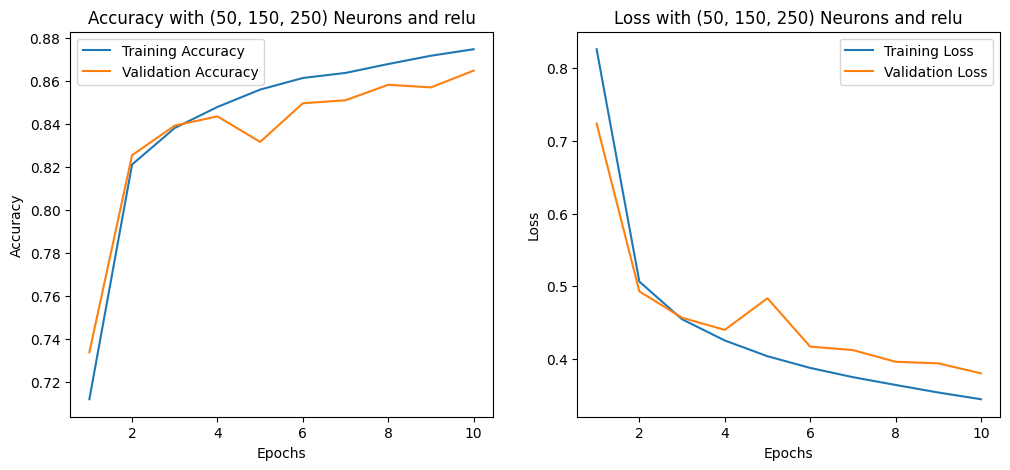

313/313 - 1s - 2ms/step - accuracy: 0.8649 - loss: 0.3802
Test Accuracy with (50, 150, 250) Neurons: 0.8649
Test Loss with (50, 150, 250) Neurons: 0.3802
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


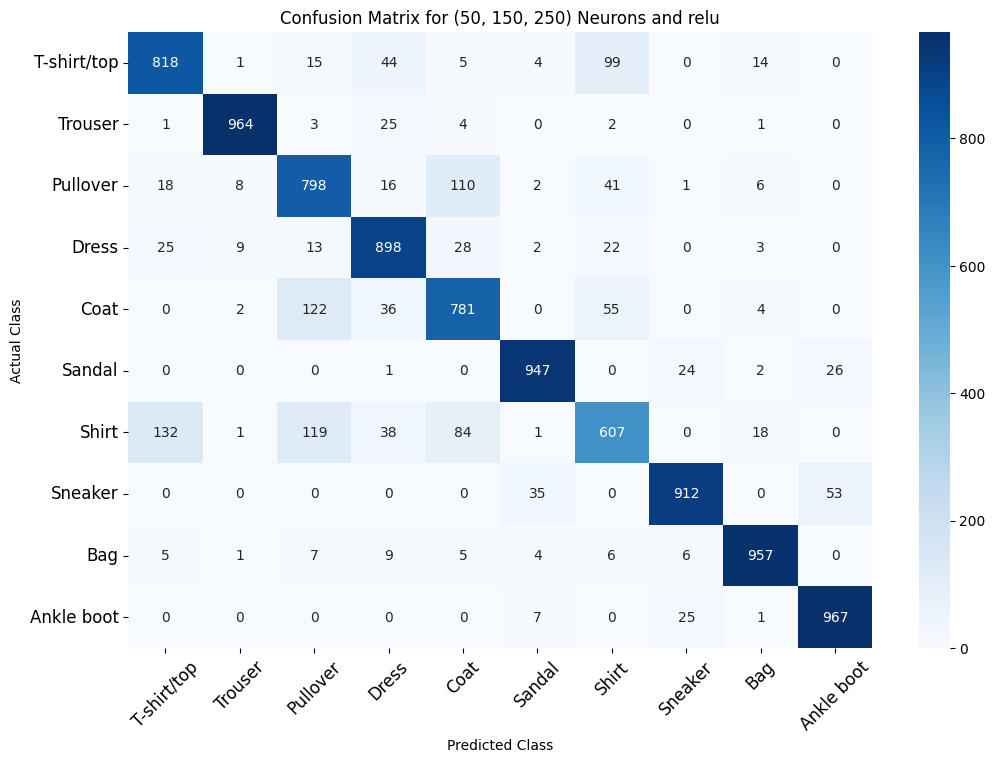


Classification Report for (50, 150, 250) Neurons and relu:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.74      0.80      0.77      1000
       Dress       0.84      0.90      0.87      1000
        Coat       0.77      0.78      0.77      1000
      Sandal       0.95      0.95      0.95      1000
       Shirt       0.73      0.61      0.66      1000
     Sneaker       0.94      0.91      0.93      1000
         Bag       0.95      0.96      0.95      1000
  Ankle boot       0.92      0.97      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (50, 50) neurons and activation 'tanh'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 4s - 2ms/step - accuracy: 0.7486 - loss: 0.7731 - val_accuracy: 0.8024 - val_loss: 0.5670
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8246 - loss: 0.5009 - val_accuracy: 0.8230 - val_loss: 0.4950
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8404 - loss: 0.4492 - val_accuracy: 0.8339 - val_loss: 0.4650
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8501 - loss: 0.4206 - val_accuracy: 0.8414 - val_loss: 0.4485
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8575 - loss: 0.4017 - val_accuracy: 0.8442 - val_loss: 0.4309
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8617 - loss: 0.3869 - val_accuracy: 0.8483 - val_loss: 0.4251
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8659 - loss: 0.3754 - val_accuracy: 0.8464 - val_loss: 0.4224
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8689 - loss: 0.3664 - val_accuracy: 0.8523 - val_loss: 0.4098
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8719 - loss: 0.3576 - val_accuracy: 0.8573 - 

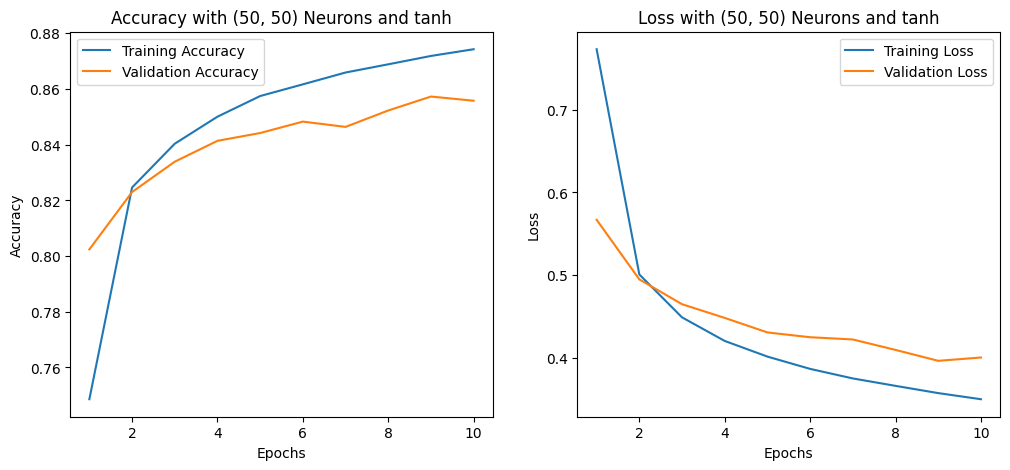

313/313 - 1s - 2ms/step - accuracy: 0.8558 - loss: 0.4006
Test Accuracy with (50, 50) Neurons: 0.8558
Test Loss with (50, 50) Neurons: 0.4006
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


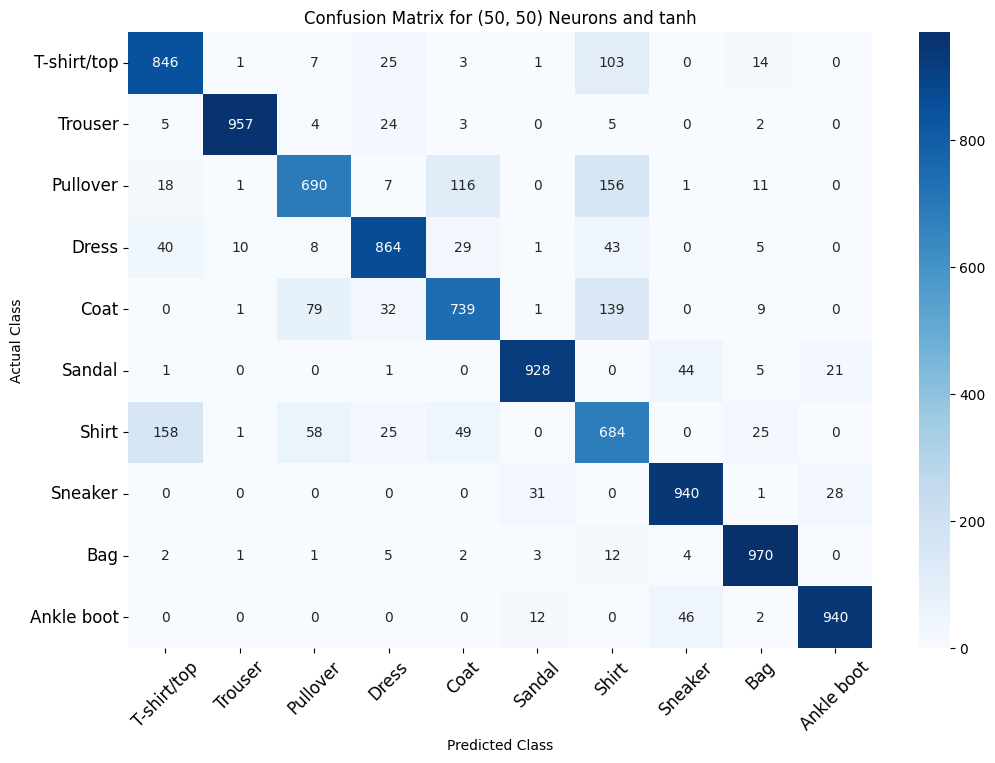


Classification Report for (50, 50) Neurons and tanh:

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.85      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.81      0.69      0.75      1000
       Dress       0.88      0.86      0.87      1000
        Coat       0.79      0.74      0.76      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.60      0.68      0.64      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.93      0.97      0.95      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (50, 100) neurons and activation 'tanh'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 4s - 2ms/step - accuracy: 0.7559 - loss: 0.7411 - val_accuracy: 0.8063 - val_loss: 0.5491
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8289 - loss: 0.4861 - val_accuracy: 0.8245 - val_loss: 0.4933
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8429 - loss: 0.4425 - val_accuracy: 0.8325 - val_loss: 0.4638
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8502 - loss: 0.4176 - val_accuracy: 0.8402 - val_loss: 0.4517
Epoch 5/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8572 - loss: 0.4020 - val_accuracy: 0.8439 - val_loss: 0.4332
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8614 - loss: 0.3888 - val_accuracy: 0.8497 - val_loss: 0.4181
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8651 - loss: 0.3778 - val_accuracy: 0.8554 - val_loss: 0.4091
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8680 - loss: 0.3689 - val_accuracy: 0.8518 - val_loss: 0.4132
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8707 - loss: 0.3604 - val_accuracy: 0.8543 - 

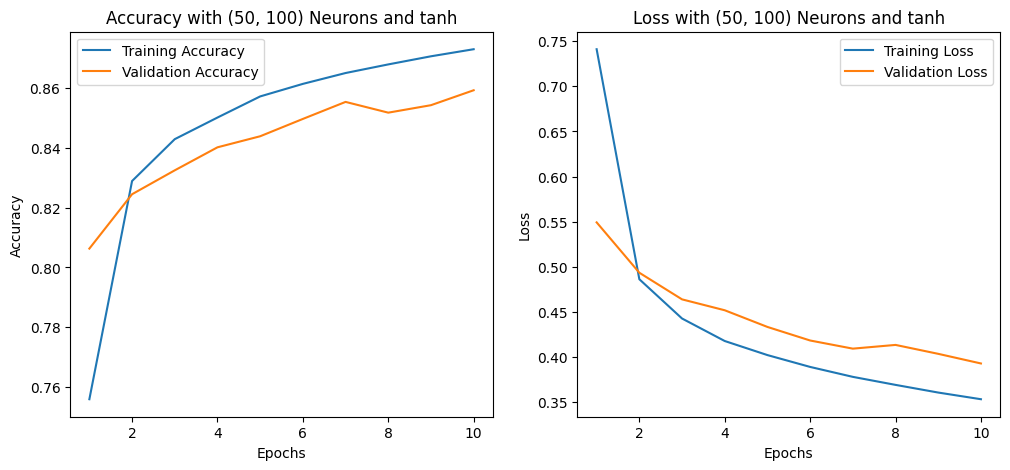

313/313 - 1s - 2ms/step - accuracy: 0.8593 - loss: 0.3927
Test Accuracy with (50, 100) Neurons: 0.8593
Test Loss with (50, 100) Neurons: 0.3927
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


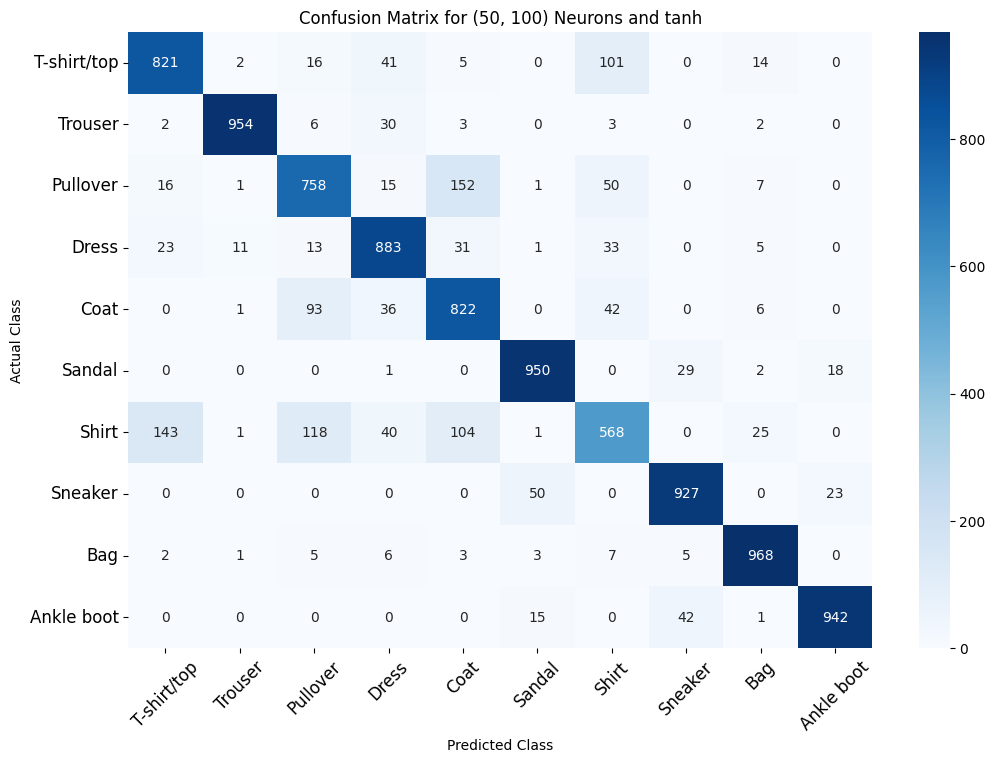


Classification Report for (50, 100) Neurons and tanh:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.75      0.76      0.75      1000
       Dress       0.84      0.88      0.86      1000
        Coat       0.73      0.82      0.78      1000
      Sandal       0.93      0.95      0.94      1000
       Shirt       0.71      0.57      0.63      1000
     Sneaker       0.92      0.93      0.93      1000
         Bag       0.94      0.97      0.95      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (100, 100) neurons and activation 'tanh'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 2ms/step - accuracy: 0.7574 - loss: 0.7250 - val_accuracy: 0.8140 - val_loss: 0.5382
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8327 - loss: 0.4779 - val_accuracy: 0.8220 - val_loss: 0.4926
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8456 - loss: 0.4347 - val_accuracy: 0.8322 - val_loss: 0.4676
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8534 - loss: 0.4107 - val_accuracy: 0.8403 - val_loss: 0.4442
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8590 - loss: 0.3938 - val_accuracy: 0.8461 - val_loss: 0.4228
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8632 - loss: 0.3812 - val_accuracy: 0.8493 - val_loss: 0.4129
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8678 - loss: 0.3706 - val_accuracy: 0.8529 - val_loss: 0.4088
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8707 - loss: 0.3611 - val_accuracy: 0.8561 - val_loss: 0.4057
Epoch 9/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8727 - loss: 0.3536 - val_accuracy: 0.8581 - 

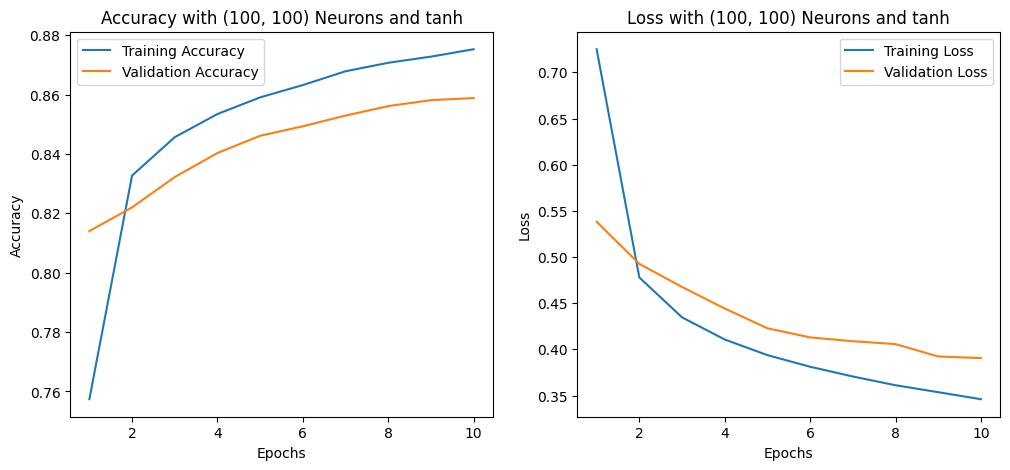

313/313 - 1s - 2ms/step - accuracy: 0.8588 - loss: 0.3906
Test Accuracy with (100, 100) Neurons: 0.8588
Test Loss with (100, 100) Neurons: 0.3906
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


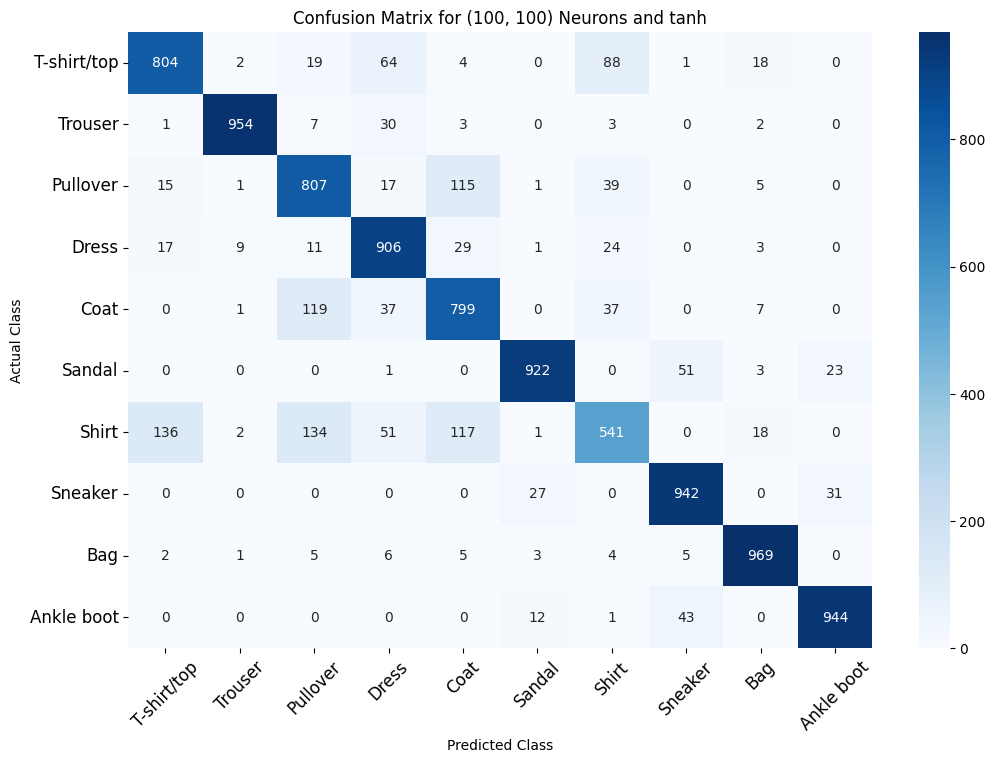


Classification Report for (100, 100) Neurons and tanh:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.80      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.73      0.81      0.77      1000
       Dress       0.81      0.91      0.86      1000
        Coat       0.75      0.80      0.77      1000
      Sandal       0.95      0.92      0.94      1000
       Shirt       0.73      0.54      0.62      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.95      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (100, 150) neurons and activation 'tanh'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7716 - loss: 0.6962 - val_accuracy: 0.8096 - val_loss: 0.5379
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8329 - loss: 0.4742 - val_accuracy: 0.8311 - val_loss: 0.4817
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8458 - loss: 0.4348 - val_accuracy: 0.8396 - val_loss: 0.4552
Epoch 4/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8516 - loss: 0.4120 - val_accuracy: 0.8425 - val_loss: 0.4387
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8580 - loss: 0.3959 - val_accuracy: 0.8474 - val_loss: 0.4286
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8629 - loss: 0.3834 - val_accuracy: 0.8520 - val_loss: 0.4175
Epoch 7/10
1875/1875 - 10s - 6ms/step - accuracy: 0.8662 - loss: 0.3725 - val_accuracy: 0.8517 - val_loss: 0.4128
Epoch 8/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8705 - loss: 0.3631 - val_accuracy: 0.8546 - val_loss: 0.4029
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8726 - loss: 0.3545 - val_accuracy: 0.8589 

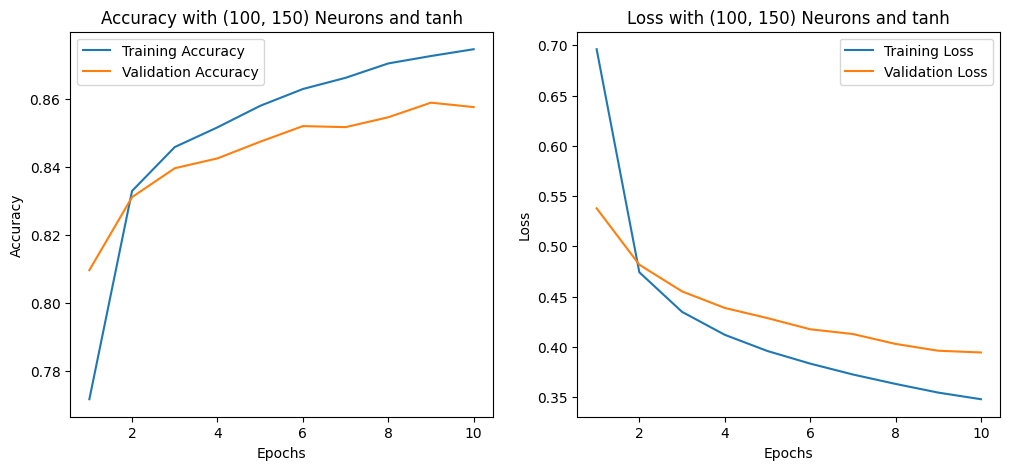

313/313 - 1s - 2ms/step - accuracy: 0.8576 - loss: 0.3944
Test Accuracy with (100, 150) Neurons: 0.8576
Test Loss with (100, 150) Neurons: 0.3944
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


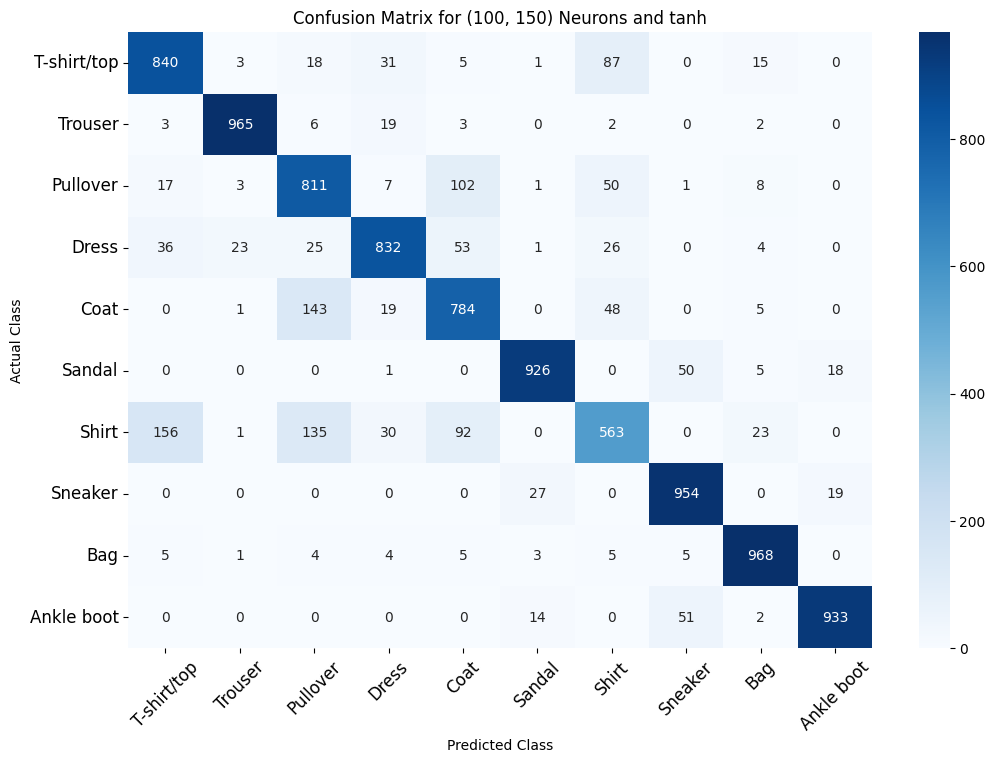


Classification Report for (100, 150) Neurons and tanh:

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.84      0.82      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.71      0.81      0.76      1000
       Dress       0.88      0.83      0.86      1000
        Coat       0.75      0.78      0.77      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.72      0.56      0.63      1000
     Sneaker       0.90      0.95      0.93      1000
         Bag       0.94      0.97      0.95      1000
  Ankle boot       0.96      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (200, 250) neurons and activation 'tanh'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.7744 - loss: 0.6751 - val_accuracy: 0.8162 - val_loss: 0.5248
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8348 - loss: 0.4701 - val_accuracy: 0.8301 - val_loss: 0.4837
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8470 - loss: 0.4319 - val_accuracy: 0.8377 - val_loss: 0.4494
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8542 - loss: 0.4094 - val_accuracy: 0.8452 - val_loss: 0.4314
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8597 - loss: 0.3942 - val_accuracy: 0.8469 - val_loss: 0.4247
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8634 - loss: 0.3811 - val_accuracy: 0.8492 - val_loss: 0.4247
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8670 - loss: 0.3714 - val_accuracy: 0.8557 - val_loss: 0.4014
Epoch 8/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8700 - loss: 0.3614 - val_accuracy: 0.8383 - val_loss: 0.4303
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8723 - loss: 0.3545 - val_accuracy: 0.858

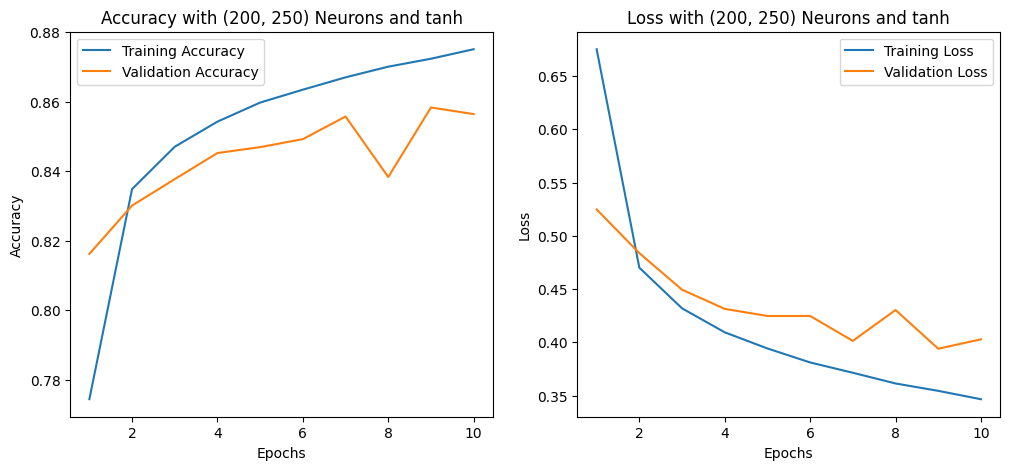

313/313 - 1s - 2ms/step - accuracy: 0.8564 - loss: 0.4028
Test Accuracy with (200, 250) Neurons: 0.8564
Test Loss with (200, 250) Neurons: 0.4028
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


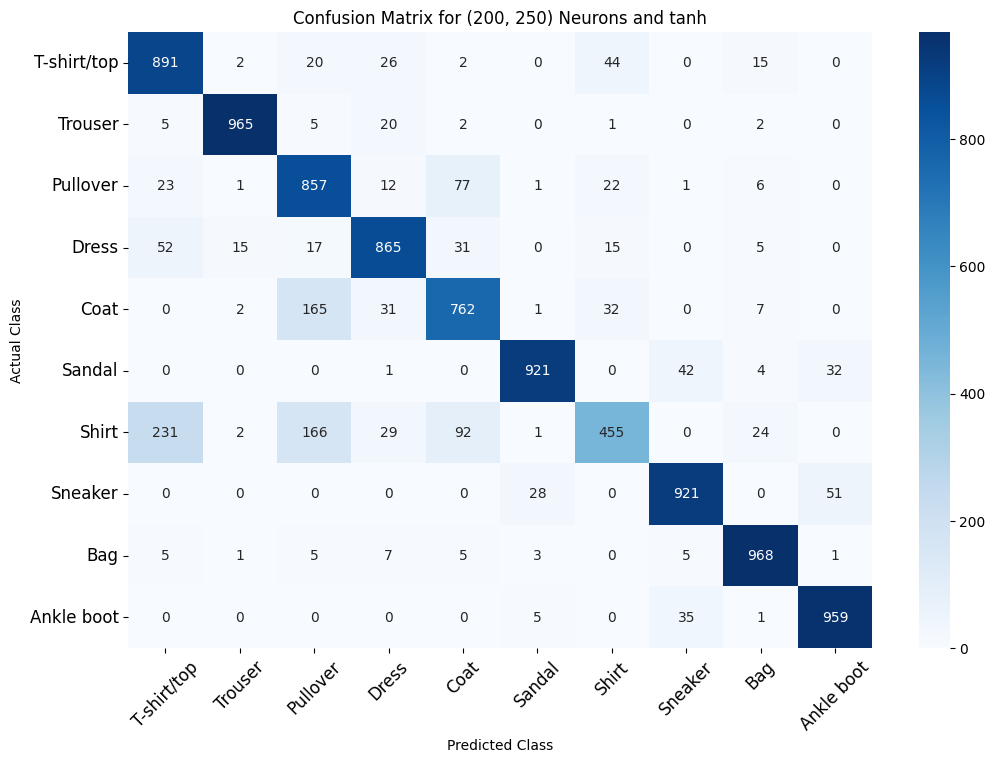


Classification Report for (200, 250) Neurons and tanh:

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.89      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.69      0.86      0.77      1000
       Dress       0.87      0.86      0.87      1000
        Coat       0.78      0.76      0.77      1000
      Sandal       0.96      0.92      0.94      1000
       Shirt       0.80      0.46      0.58      1000
     Sneaker       0.92      0.92      0.92      1000
         Bag       0.94      0.97      0.95      1000
  Ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000


Training model with hidden layers (50, 150, 250) neurons and activation 'tanh'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7527 - loss: 0.7153 - val_accuracy: 0.7982 - val_loss: 0.5532
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8303 - loss: 0.4711 - val_accuracy: 0.8268 - val_loss: 0.4738
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8463 - loss: 0.4282 - val_accuracy: 0.8380 - val_loss: 0.4492
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8540 - loss: 0.4037 - val_accuracy: 0.8473 - val_loss: 0.4247
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8583 - loss: 0.3882 - val_accuracy: 0.8489 - val_loss: 0.4190
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8638 - loss: 0.3762 - val_accuracy: 0.8446 - val_loss: 0.4283
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8669 - loss: 0.3658 - val_accuracy: 0.8520 - val_loss: 0.4137
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8705 - loss: 0.3560 - val_accuracy: 0.8574 - val_loss: 0.3998
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8744 - loss: 0.3476 - val_accuracy: 0.8575 - 

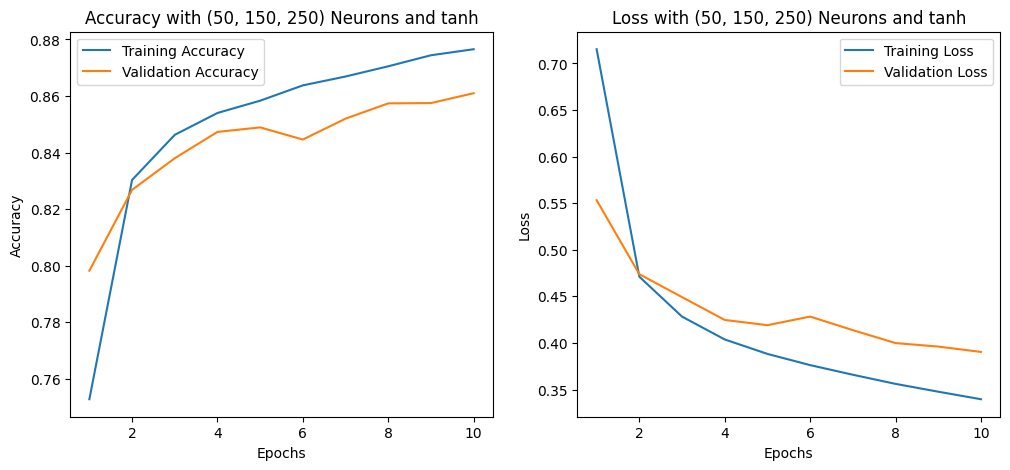

313/313 - 1s - 2ms/step - accuracy: 0.8610 - loss: 0.3903
Test Accuracy with (50, 150, 250) Neurons: 0.8610
Test Loss with (50, 150, 250) Neurons: 0.3903
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


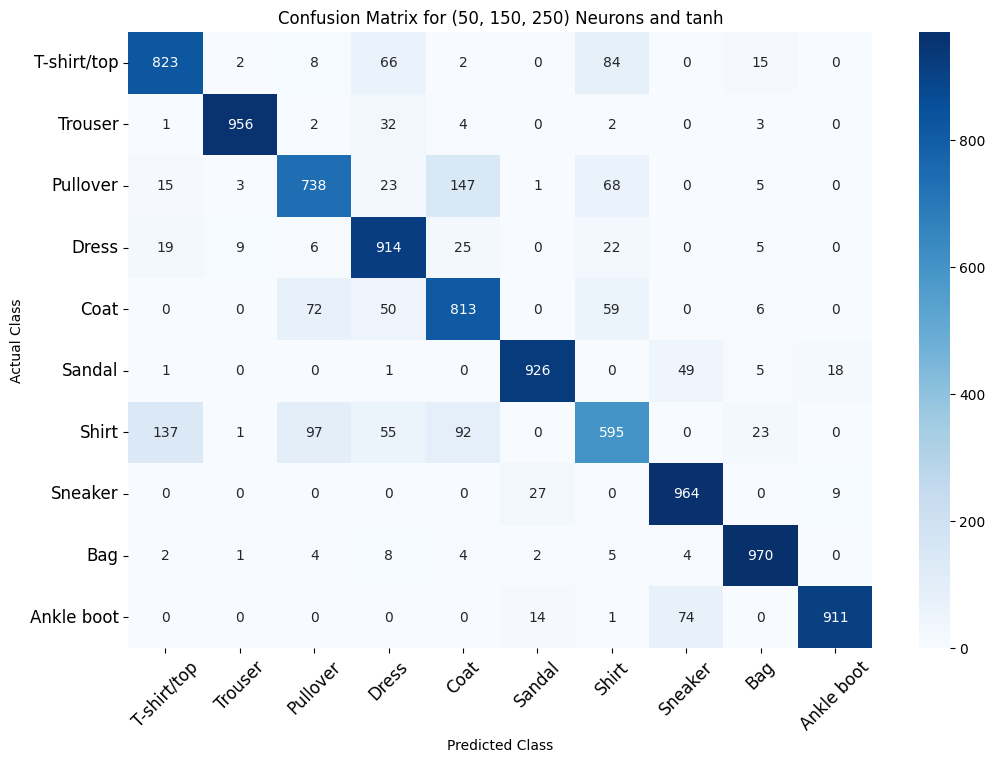


Classification Report for (50, 150, 250) Neurons and tanh:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.80      0.74      0.77      1000
       Dress       0.80      0.91      0.85      1000
        Coat       0.75      0.81      0.78      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.71      0.59      0.65      1000
     Sneaker       0.88      0.96      0.92      1000
         Bag       0.94      0.97      0.95      1000
  Ankle boot       0.97      0.91      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (50, 50) neurons and activation 'leakyrelu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7461 - loss: 0.7701 - val_accuracy: 0.8011 - val_loss: 0.5654
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8209 - loss: 0.5077 - val_accuracy: 0.8247 - val_loss: 0.4943
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8369 - loss: 0.4642 - val_accuracy: 0.8303 - val_loss: 0.4812
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8457 - loss: 0.4405 - val_accuracy: 0.8260 - val_loss: 0.4904
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8515 - loss: 0.4231 - val_accuracy: 0.8438 - val_loss: 0.4448
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8557 - loss: 0.4112 - val_accuracy: 0.8410 - val_loss: 0.4491
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8574 - loss: 0.4015 - val_accuracy: 0.8428 - val_loss: 0.4444
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8608 - loss: 0.3924 - val_accuracy: 0.8483 - val_loss: 0.4232
Epoch 9/10
1875/1875 - 5s - 2ms/step - accuracy: 0.8642 - loss: 0.3825 - val_accuracy: 0.8523 - 

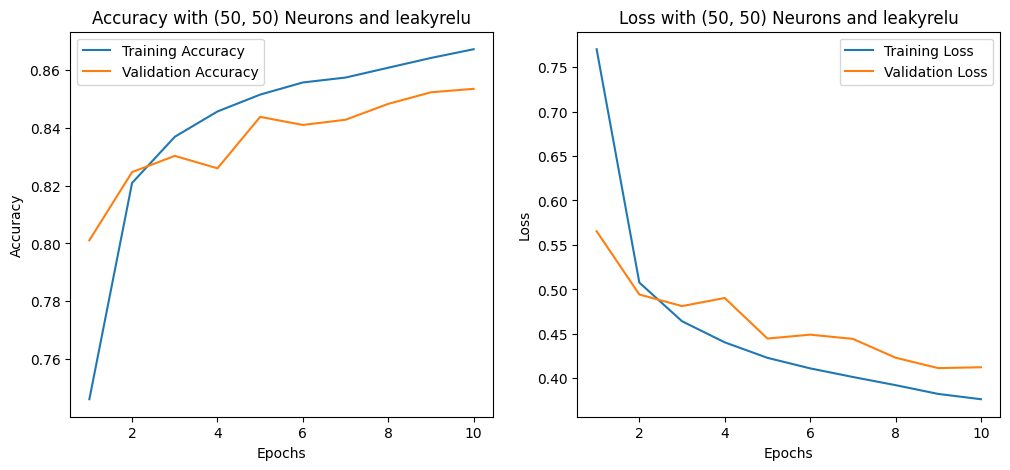

313/313 - 0s - 2ms/step - accuracy: 0.8535 - loss: 0.4125
Test Accuracy with (50, 50) Neurons: 0.8535
Test Loss with (50, 50) Neurons: 0.4125
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


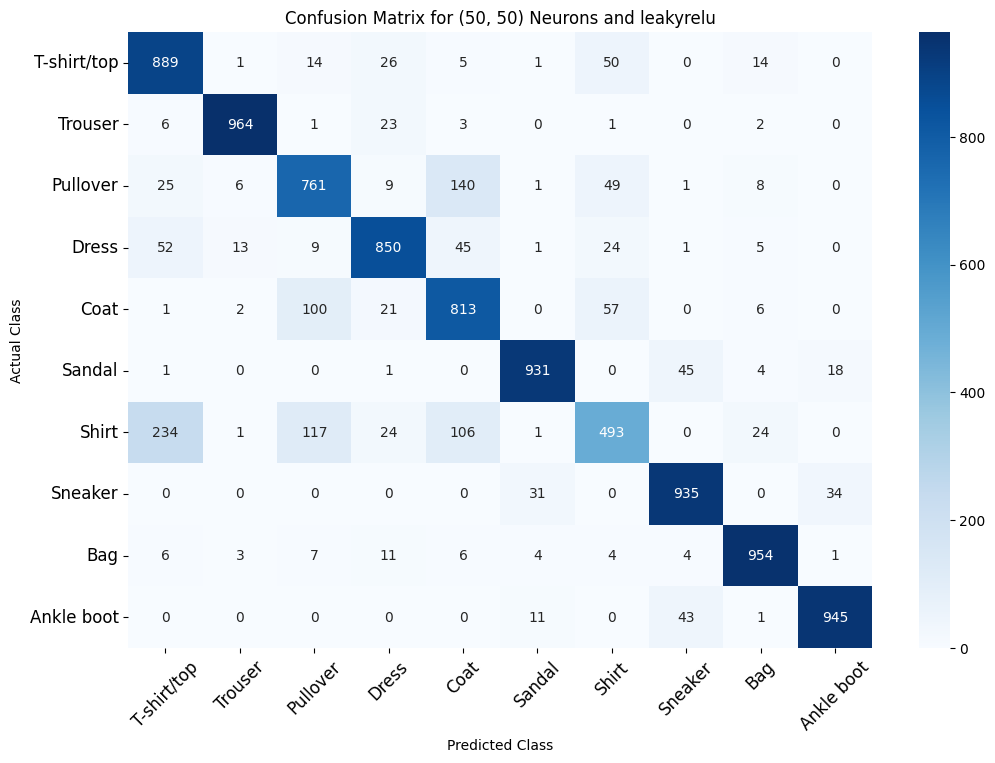


Classification Report for (50, 50) Neurons and leakyrelu:

              precision    recall  f1-score   support

 T-shirt/top       0.73      0.89      0.80      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.75      0.76      0.76      1000
       Dress       0.88      0.85      0.87      1000
        Coat       0.73      0.81      0.77      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.73      0.49      0.59      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.94      0.95      0.95      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Training model with hidden layers (50, 100) neurons and activation 'leakyrelu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7370 - loss: 0.7823 - val_accuracy: 0.7993 - val_loss: 0.5757
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8220 - loss: 0.5074 - val_accuracy: 0.8177 - val_loss: 0.5072
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8371 - loss: 0.4642 - val_accuracy: 0.8322 - val_loss: 0.4786
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8467 - loss: 0.4384 - val_accuracy: 0.8391 - val_loss: 0.4573
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8533 - loss: 0.4206 - val_accuracy: 0.8357 - val_loss: 0.4545
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8576 - loss: 0.4068 - val_accuracy: 0.8414 - val_loss: 0.4417
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8611 - loss: 0.3943 - val_accuracy: 0.8497 - val_loss: 0.4263
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8643 - loss: 0.3844 - val_accuracy: 0.8455 - val_loss: 0.4362
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8685 - loss: 0.3755 - val_accuracy: 0.8554 - 

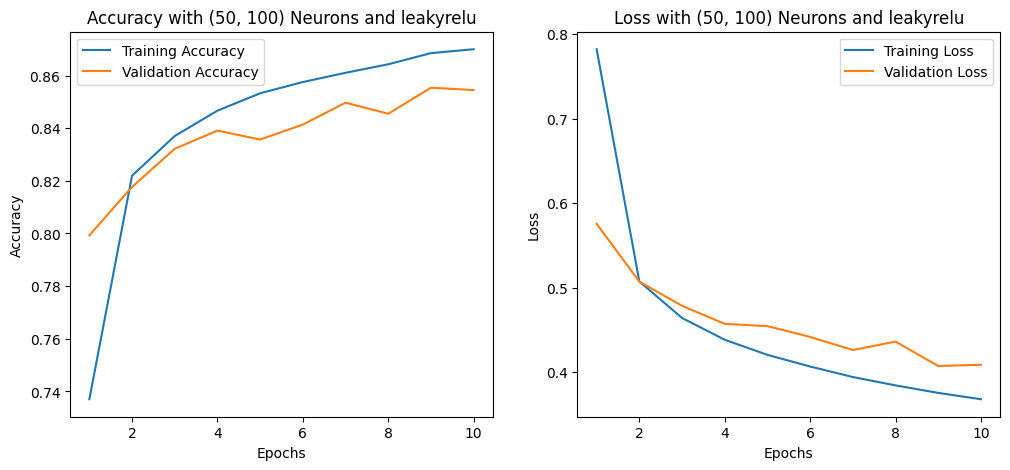

313/313 - 0s - 2ms/step - accuracy: 0.8545 - loss: 0.4088
Test Accuracy with (50, 100) Neurons: 0.8545
Test Loss with (50, 100) Neurons: 0.4088
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


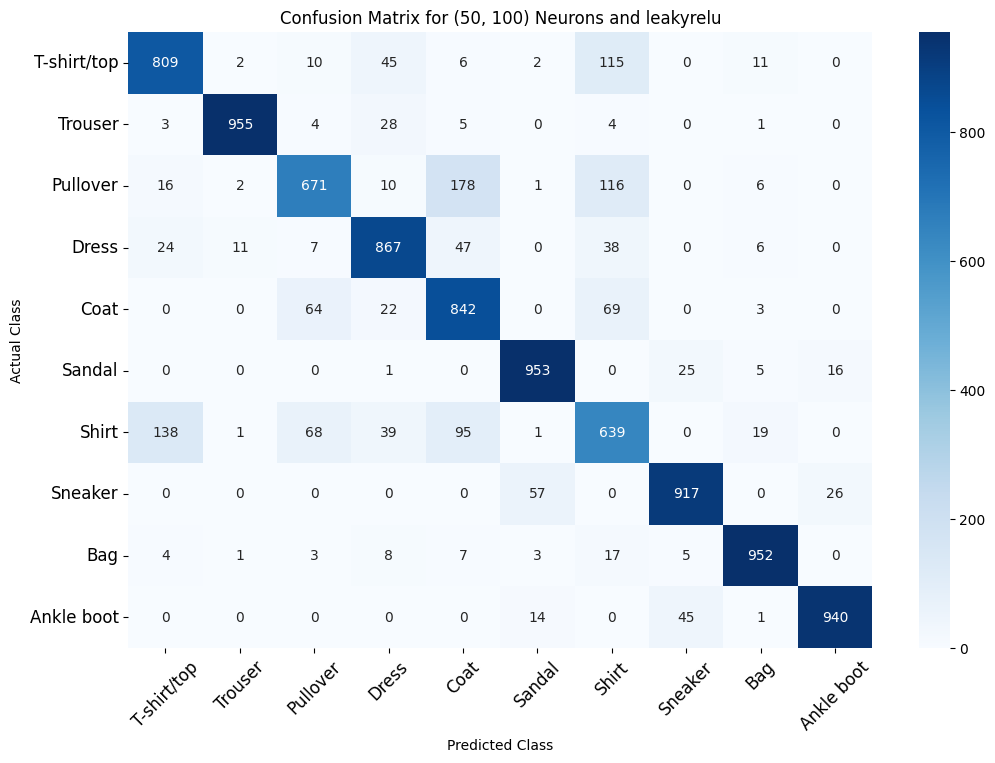


Classification Report for (50, 100) Neurons and leakyrelu:

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.81      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.81      0.67      0.73      1000
       Dress       0.85      0.87      0.86      1000
        Coat       0.71      0.84      0.77      1000
      Sandal       0.92      0.95      0.94      1000
       Shirt       0.64      0.64      0.64      1000
     Sneaker       0.92      0.92      0.92      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000


Training model with hidden layers (100, 100) neurons and activation 'leakyrelu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7532 - loss: 0.7395 - val_accuracy: 0.7936 - val_loss: 0.5808
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8265 - loss: 0.4987 - val_accuracy: 0.8280 - val_loss: 0.4910
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8397 - loss: 0.4564 - val_accuracy: 0.8379 - val_loss: 0.4656
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8490 - loss: 0.4317 - val_accuracy: 0.8398 - val_loss: 0.4553
Epoch 5/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8561 - loss: 0.4131 - val_accuracy: 0.8462 - val_loss: 0.4363
Epoch 6/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8595 - loss: 0.4001 - val_accuracy: 0.8441 - val_loss: 0.4370
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8632 - loss: 0.3885 - val_accuracy: 0.8492 - val_loss: 0.4214
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8667 - loss: 0.3786 - val_accuracy: 0.8476 - val_loss: 0.4204
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8686 - loss: 0.3705 - val_accuracy: 0.8583 

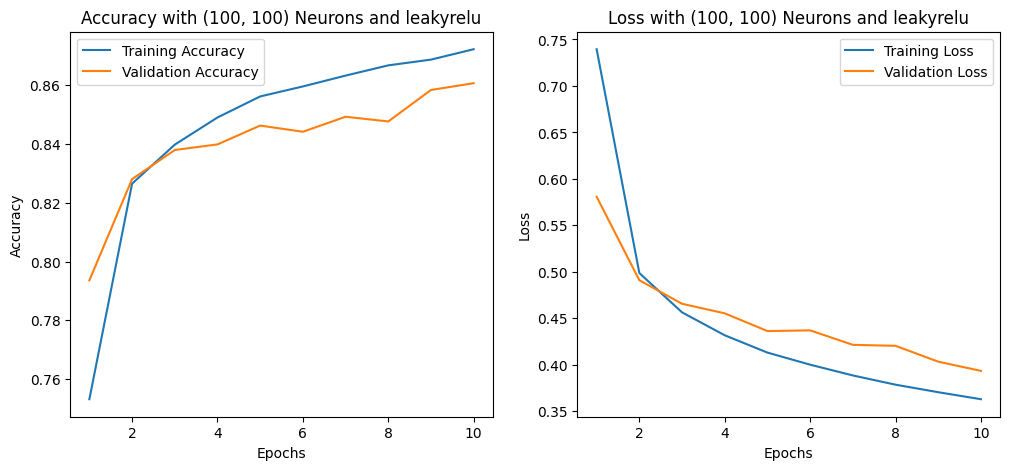

313/313 - 1s - 2ms/step - accuracy: 0.8606 - loss: 0.3934
Test Accuracy with (100, 100) Neurons: 0.8606
Test Loss with (100, 100) Neurons: 0.3934
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


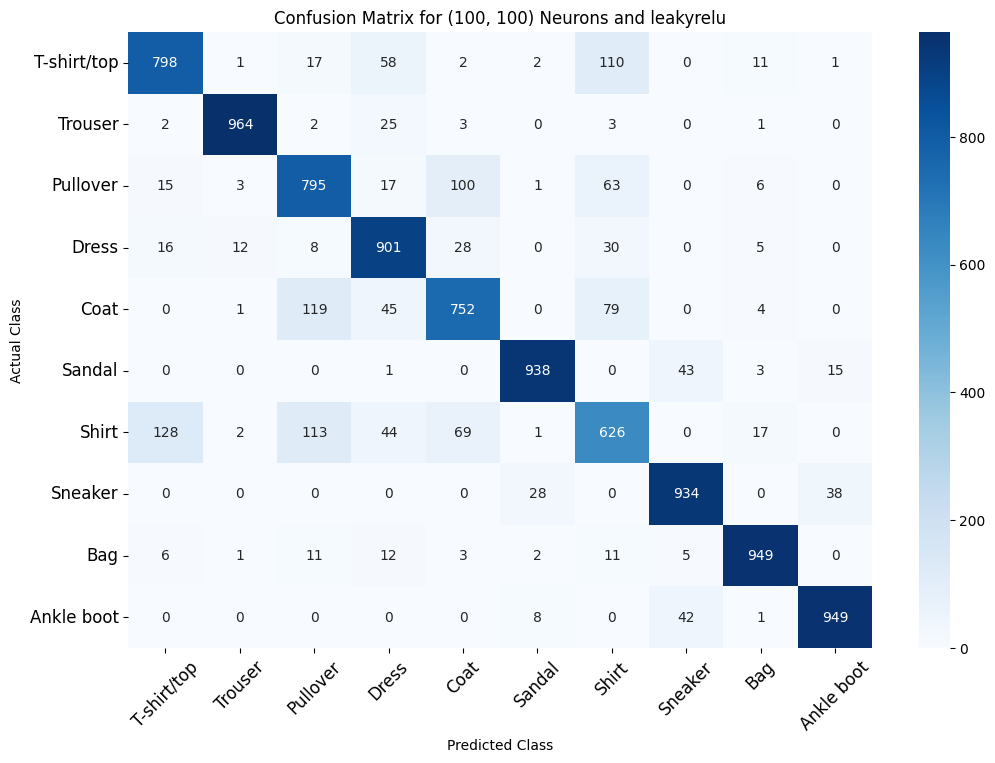


Classification Report for (100, 100) Neurons and leakyrelu:

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.80      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.75      0.80      0.77      1000
       Dress       0.82      0.90      0.86      1000
        Coat       0.79      0.75      0.77      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.68      0.63      0.65      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (100, 150) neurons and activation 'leakyrelu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7486 - loss: 0.7426 - val_accuracy: 0.8063 - val_loss: 0.5525
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8254 - loss: 0.4987 - val_accuracy: 0.8262 - val_loss: 0.4950
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8400 - loss: 0.4578 - val_accuracy: 0.8345 - val_loss: 0.4712
Epoch 4/10
1875/1875 - 10s - 6ms/step - accuracy: 0.8486 - loss: 0.4336 - val_accuracy: 0.8389 - val_loss: 0.4548
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8547 - loss: 0.4157 - val_accuracy: 0.8439 - val_loss: 0.4457
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8598 - loss: 0.4030 - val_accuracy: 0.8458 - val_loss: 0.4378
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8622 - loss: 0.3909 - val_accuracy: 0.8520 - val_loss: 0.4163
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8651 - loss: 0.3803 - val_accuracy: 0.8519 - val_loss: 0.4141
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8691 - loss: 0.3705 - val_accuracy: 0.8565 -

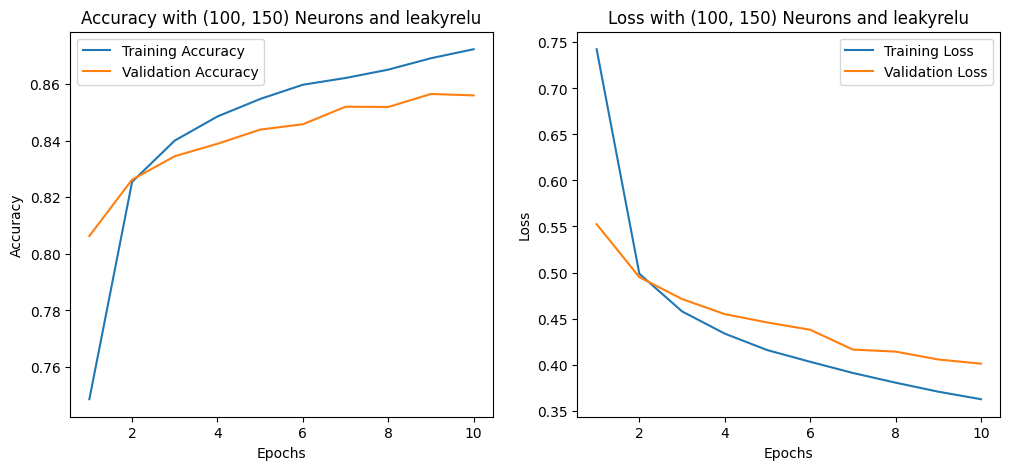

313/313 - 1s - 2ms/step - accuracy: 0.8560 - loss: 0.4010
Test Accuracy with (100, 150) Neurons: 0.8560
Test Loss with (100, 150) Neurons: 0.4010
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


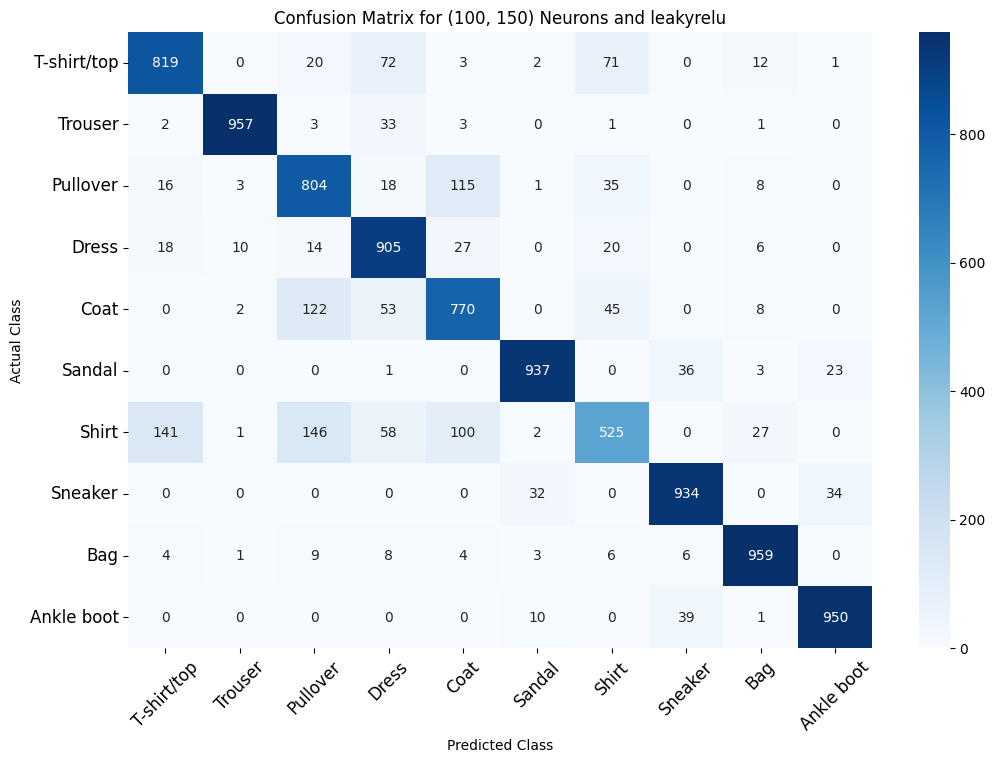


Classification Report for (100, 150) Neurons and leakyrelu:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.72      0.80      0.76      1000
       Dress       0.79      0.91      0.84      1000
        Coat       0.75      0.77      0.76      1000
      Sandal       0.95      0.94      0.94      1000
       Shirt       0.75      0.53      0.62      1000
     Sneaker       0.92      0.93      0.93      1000
         Bag       0.94      0.96      0.95      1000
  Ankle boot       0.94      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000


Training model with hidden layers (200, 250) neurons and activation 'leakyrelu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7647 - loss: 0.7113 - val_accuracy: 0.8176 - val_loss: 0.5350
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8303 - loss: 0.4867 - val_accuracy: 0.8256 - val_loss: 0.4975
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8446 - loss: 0.4457 - val_accuracy: 0.8311 - val_loss: 0.4716
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8513 - loss: 0.4221 - val_accuracy: 0.8431 - val_loss: 0.4430
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8586 - loss: 0.4029 - val_accuracy: 0.8437 - val_loss: 0.4399
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8644 - loss: 0.3888 - val_accuracy: 0.8517 - val_loss: 0.4135
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8672 - loss: 0.3776 - val_accuracy: 0.8485 - val_loss: 0.4205
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8701 - loss: 0.3670 - val_accuracy: 0.8560 - val_loss: 0.4047
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8739 - loss: 0.3579 - val_accuracy: 0.8452

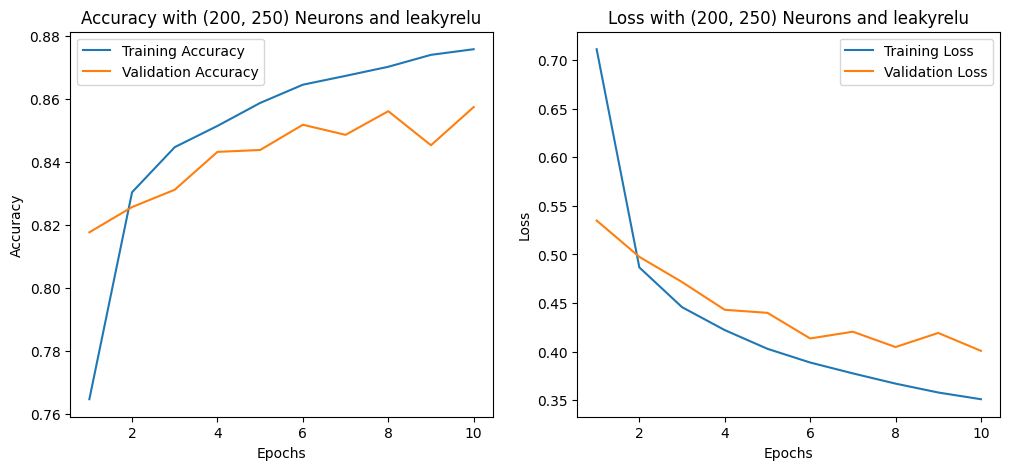

313/313 - 1s - 2ms/step - accuracy: 0.8573 - loss: 0.4008
Test Accuracy with (200, 250) Neurons: 0.8573
Test Loss with (200, 250) Neurons: 0.4008
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


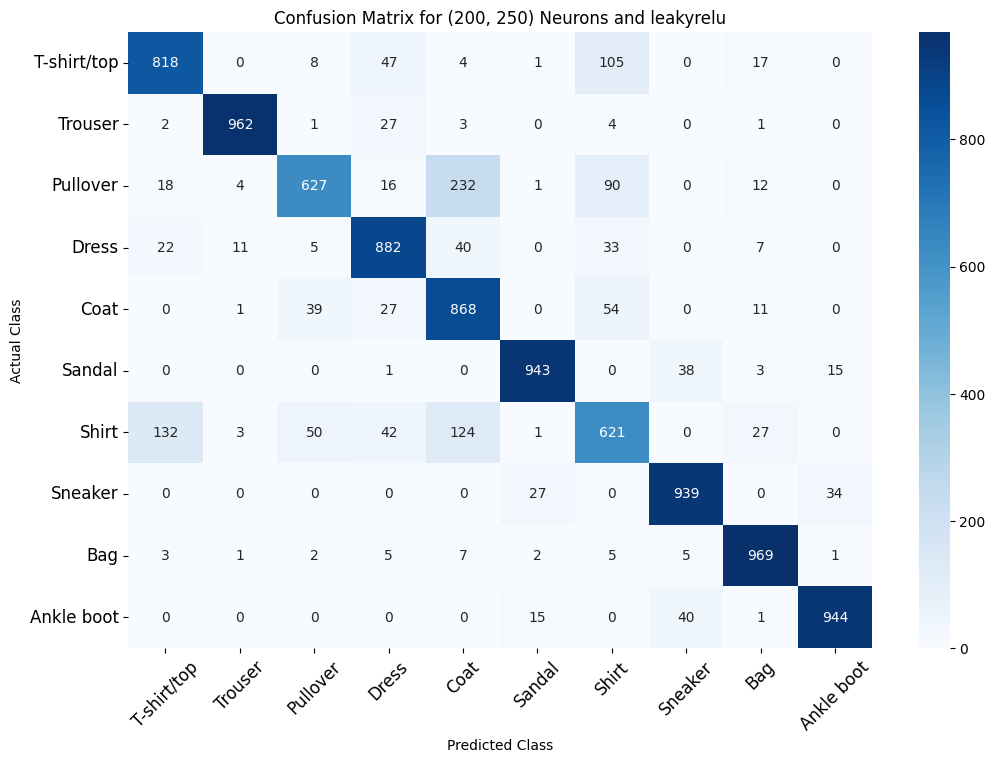


Classification Report for (200, 250) Neurons and leakyrelu:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.86      0.63      0.72      1000
       Dress       0.84      0.88      0.86      1000
        Coat       0.68      0.87      0.76      1000
      Sandal       0.95      0.94      0.95      1000
       Shirt       0.68      0.62      0.65      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.92      0.97      0.95      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Training model with hidden layers (50, 150, 250) neurons and activation 'leakyrelu'...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7270 - loss: 0.7936 - val_accuracy: 0.8103 - val_loss: 0.5476
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8241 - loss: 0.5010 - val_accuracy: 0.8248 - val_loss: 0.4934
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8409 - loss: 0.4562 - val_accuracy: 0.8315 - val_loss: 0.4702
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8496 - loss: 0.4286 - val_accuracy: 0.8442 - val_loss: 0.4423
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8556 - loss: 0.4094 - val_accuracy: 0.8411 - val_loss: 0.4365
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8608 - loss: 0.3934 - val_accuracy: 0.8479 - val_loss: 0.4229
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8640 - loss: 0.3812 - val_accuracy: 0.8539 - val_loss: 0.4109
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8664 - loss: 0.3705 - val_accuracy: 0.8413 - val_loss: 0.4278
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8705 - loss: 0.3612 - val_accuracy: 0.8578 - 

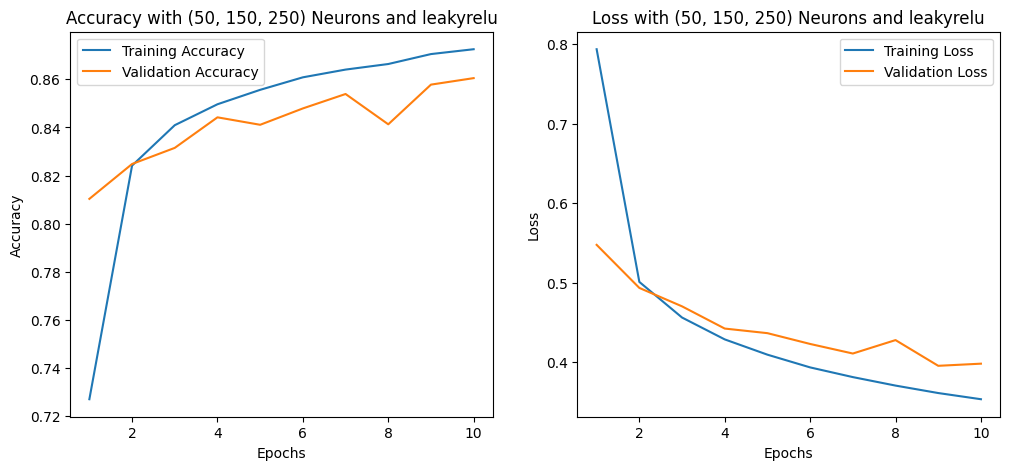

313/313 - 1s - 2ms/step - accuracy: 0.8605 - loss: 0.3981
Test Accuracy with (50, 150, 250) Neurons: 0.8605
Test Loss with (50, 150, 250) Neurons: 0.3981
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


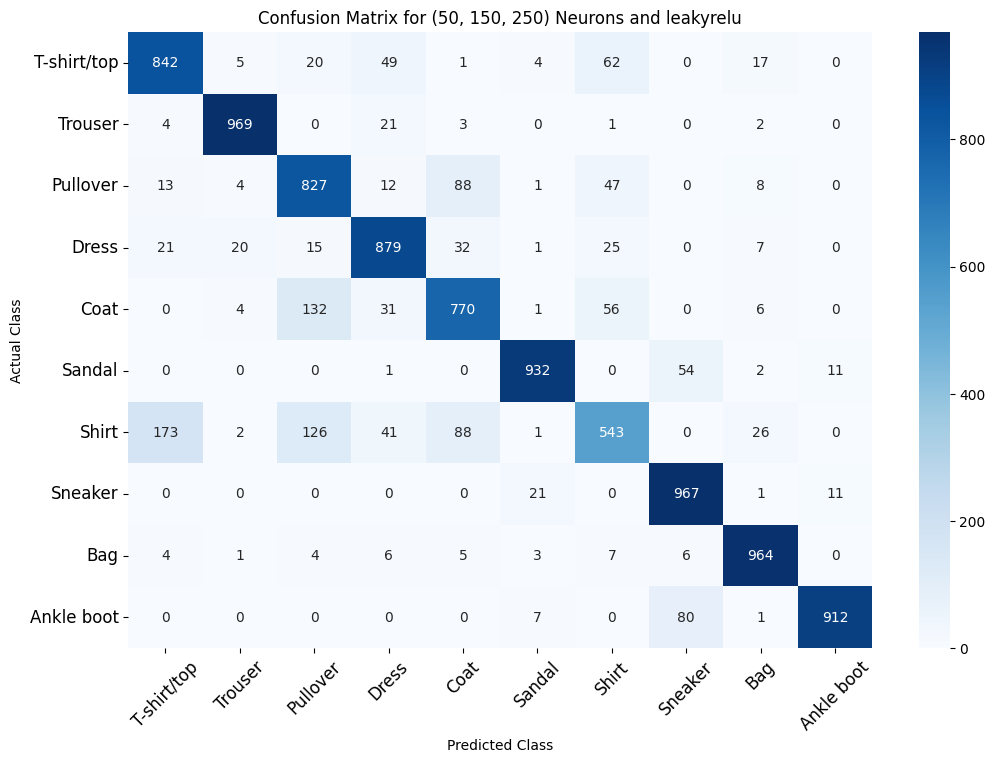


Classification Report for (50, 150, 250) Neurons and leakyrelu:

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.84      0.82      1000
     Trouser       0.96      0.97      0.97      1000
    Pullover       0.74      0.83      0.78      1000
       Dress       0.85      0.88      0.86      1000
        Coat       0.78      0.77      0.78      1000
      Sandal       0.96      0.93      0.95      1000
       Shirt       0.73      0.54      0.62      1000
     Sneaker       0.87      0.97      0.92      1000
         Bag       0.93      0.96      0.95      1000
  Ankle boot       0.98      0.91      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Final Evaluation Results for All Configurations:
    hidden_neurons  test_accuracy  test_loss  precision  recall  f1_score  \
0         (50, 50)         0.8586   0.392530    

In [ ]:
## Hyperparammeter tuning Shallow NN with SGD and 10 epochs
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# List to store final results
final_results_sgd_all_ac = []

def train_and_evaluate_model(hidden_neurons_config, epochs=20, learning_rate=0.01, hidd_activation='relu'):
    """
    Function to train and evaluate a model with varying numbers of neurons in the hidden layers.
    It also prints the final evaluation results for each configuration.

    Parameters:
    - hidden_neurons_config (list): List of tuples where each tuple contains the number of neurons for respective layers.
    - epochs (int): Number of epochs for training (default is 20).
    - learning_rate (float): Learning rate for the optimizer (default is 0.01).
    - hidd_activation (str): Activation function to use in hidden layers (default is 'relu').
    """
    # Load the Fashion MNIST dataset
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # Normalize the pixel values of the images to be between 0 and 1
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # List of class names in Fashion MNIST
    class_names = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]

    for hidden_neurons in hidden_neurons_config:
        print(f"\nTraining model with hidden layers {hidden_neurons} neurons and activation '{hidd_activation}'...")

        # Build the model
        model = Sequential([Flatten(input_shape=(28, 28))])  # First layer: Flatten input

        for neurons in hidden_neurons:
            if hidd_activation.lower() == "leakyrelu":
                model.add(Dense(neurons))  # Dense layer without activation
                model.add(LeakyReLU())  # Add LeakyReLU as a separate layer
            else:
                model.add(Dense(neurons, activation=hidd_activation))

        # Output layer with 10 nodes for 10 class labels
        model.add(Dense(10, activation='softmax'))

        # Compile the model
        optimizer = SGD(learning_rate=learning_rate)
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model and save history for plotting
        history = model.fit(train_images, train_labels, epochs=epochs,
                            validation_data=(test_images, test_labels), verbose=2)

        # Extract training and validation data
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Plot the results
        epochs_range = range(1, len(train_acc) + 1)
        plt.figure(figsize=(12, 5))

        # Accuracy Plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.title(f'Accuracy with {hidden_neurons} Neurons and {hidd_activation}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss Plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, train_loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.title(f'Loss with {hidden_neurons} Neurons and {hidd_activation}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

        # Evaluate the model
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
        print(f"Test Accuracy with {hidden_neurons} Neurons: {test_acc:.4f}")
        print(f"Test Loss with {hidden_neurons} Neurons: {test_loss:.4f}")

        # Predict on the test data
        y_pred = model.predict(test_images)
        # Convert probabilities to class labels
        y_pred_classes = tf.argmax(y_pred, axis=1)

        # Generate the confusion matrix
        cm = confusion_matrix(test_labels, y_pred_classes)

        plt.figure(figsize=(12, 8))
        plt.title(f"Confusion Matrix for {hidden_neurons} Neurons and {hidd_activation}")
        plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
        plt.yticks(fontsize=12)  # Increase font size for y-axis labels
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")
        plt.show()

        class_report = classification_report(test_labels, y_pred_classes, target_names=class_names, output_dict=True)
        print(f"\nClassification Report for {hidden_neurons} Neurons and {hidd_activation}:\n")
        print(classification_report(test_labels, y_pred_classes, target_names=class_names))

        # Extract precision, recall, f1-score, and accuracy
        precision = class_report['accuracy']  # Accuracy is a macro average, it is overall accuracy
        recall = class_report['macro avg']['recall']
        f1_score = class_report['macro avg']['f1-score']
        accuracy = test_acc

        # Store final results for each configuration
        final_results_sgd_all_ac.append({
            'hidden_neurons': hidden_neurons,
            'test_accuracy': test_acc,
            'test_loss': test_loss,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'hidden_activation_function': hidd_activation,
        })

# Example usage:


hidden_neurons_config = [(50, 50), (50, 100), (100, 100), (100, 150), (200, 250), (50, 150, 250)]


# Run experiments with different activation functions
train_and_evaluate_model(hidden_neurons_config, epochs=10, learning_rate=0.01, hidd_activation='relu')
train_and_evaluate_model(hidden_neurons_config, epochs=10, learning_rate=0.01, hidd_activation='tanh')
train_and_evaluate_model(hidden_neurons_config, epochs=10, learning_rate=0.01, hidd_activation='leakyrelu')

# Print final results for all configurations
print("\nFinal Evaluation Results for All Configurations:")
results_df_sgd_all = pd.DataFrame(final_results_sgd_all_ac)
print(results_df_sgd_all)


In [ ]:
results_df_sgd_all

hidden_neurons  test_accuracy  test_loss  precision  recall  f1_score  \
0         (50, 50)         0.8586   0.392530     0.8586  0.8586  0.857958   
1        (50, 100)         0.8619   0.396086     0.8619  0.8619  0.860882   
2       (100, 100)         0.8652   0.383533     0.8652  0.8652  0.863920   
3       (100, 150)         0.8652   0.381903     0.8652  0.8652  0.864117   
4       (200, 250)         0.8639   0.376130     0.8639  0.8639  0.863384   
5   (50, 150, 250)         0.8649   0.380244     0.8649  0.8649  0.863587   
6         (50, 50)         0.8558   0.400641     0.8558  0.8558  0.856361   
7        (50, 100)         0.8593   0.392671     0.8593  0.8593  0.857610   
8       (100, 100)         0.8588   0.390566     0.8588  0.8588  0.856472   
9       (100, 150)         0.8576   0.394425     0.8576  0.8576  0.856057   
10      (200, 250)         0.8564   0.402807     0.8564  0.8564  0.851778   
11  (50, 150, 250)         0.8610   0.390335     0.8610  0.8610  0.859426   
12        (50, 50)         0.8535   0.412484     0.8535  0.8535  0.850296   
13       (50, 100)         0.8545   0.408849     0.8545  0.8545  0.854284   
14      (100, 100)         0.8606   0.393413     0.8606  0.8606  0.859917   
15      (100, 150)         0.8560   0.400956     0.8560  0.8560  0.853219   
16      (200, 250)         0.8573   0.400764     0.8573  0.8573  0.855786   
17  (50, 150, 250)         0.8605   0.398112     0.8605  0.8605  0.857917   

   hidden_activation_function  
0                        relu  
1                        relu  
2                        relu  
3                        relu  
4                        relu  
5                        relu  
6                        tanh  
7                        tanh  
8                        tanh  
9                        tanh  
10                       tanh  
11                       tanh  
12                  leakyrelu  
13                  leakyrelu  
14                  leakyrelu  
15                  leakyrelu  
16                  leakyrelu  
17                  leakyrelu

# SIMPLE CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np  # Ensure NumPy is imported

# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape images to add channel dimension and normalize to [0, 1] range
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1) / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) / 255.0

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the convolutional neural network model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for one-hot encoded labels
              metrics=['accuracy'])

# Train the model with the training data
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model with the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test dataset
predictions = model.predict(test_images)

# Example of interpreting predictions
predicted_labels = np.argmax(predictions, axis=1)
print(f"Predicted labels for first 10 images: {predicted_labels[:10]}")
print(f"Actual labels for first 10 images: {np.argmax(test_labels, axis=1)[:10]}")


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7527 - loss: 0.6697 - val_accuracy: 0.8690 - val_loss: 0.3507
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8856 - loss: 0.3143 - val_accuracy: 0.8937 - val_loss: 0.2957
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9031 - loss: 0.2619 - val_accuracy: 0.8978 - val_loss: 0.2813
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9152 - loss: 0.2288 - val_accuracy: 0.9050 - val_loss: 0.2607
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9254 - loss: 0.1991 - val_accuracy: 0.9085 - val_loss: 0.2631
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9316 - loss: 0.1792 - val_accuracy: 0.9182 - val_loss: 0.2394
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9412 - loss: 0.1552 - val_accuracy: 0.9170 - val_loss: 0.2485
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9486 - loss: 0.13

In [ ]:
# Display a few one-hot encoded labels
print("Example of one-hot encoded labels:")
print(train_labels[0])  # Print the first training label
print(train_labels[1])  # Print the second training label

Example of one-hot encoded labels:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


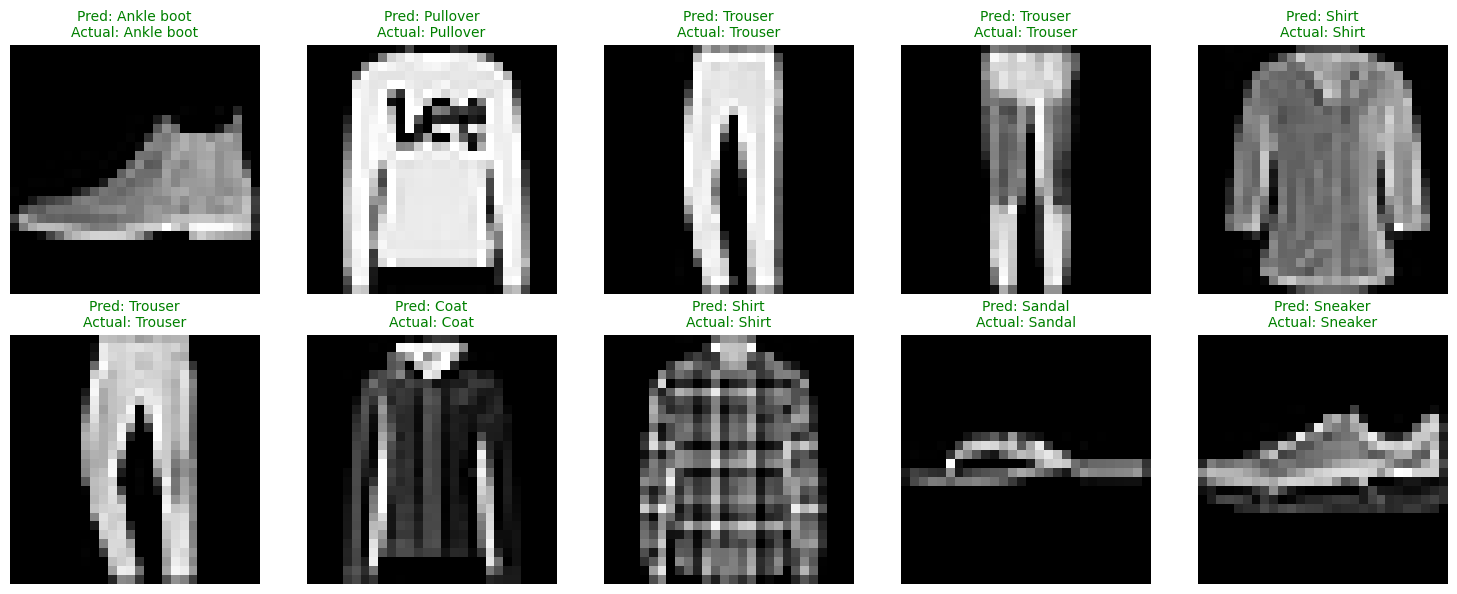

In [ ]:
import matplotlib.pyplot as plt

# Class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualization of first 10 predictions
def visualize_predictions(images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
        plt.title(f"Pred: {class_names[predicted_labels[i]]}\nActual: {class_names[true_labels[i]]}",
                  color=color, fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_predictions(test_images, test_labels, predicted_labels, class_names)


In [ ]:
model.summary()

Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_76 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_238 (Dense)               │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_239 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7516 - loss: 0.6739 - val_accuracy: 0.8635 - val_loss: 0.3667
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8821 - loss: 0.3230 - val_accuracy: 0.8903 - val_loss: 0.2884
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9034 - loss: 0.2632 - val_accuracy: 0.9022 - val_loss: 0.2752
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9133 - loss: 0.2333 - val_accuracy: 0.9067 - val_loss: 0.2510
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9199 - loss: 0.2115 - val_accuracy: 0.9047 - val_loss: 0.2531
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9327 - loss: 0.1797 - val_accuracy: 0.8990 - val_loss: 0.2882
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9380 - loss: 0.1648 - val_accuracy: 0.9043 - val_loss: 0.2784
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9464 - loss: 0.14

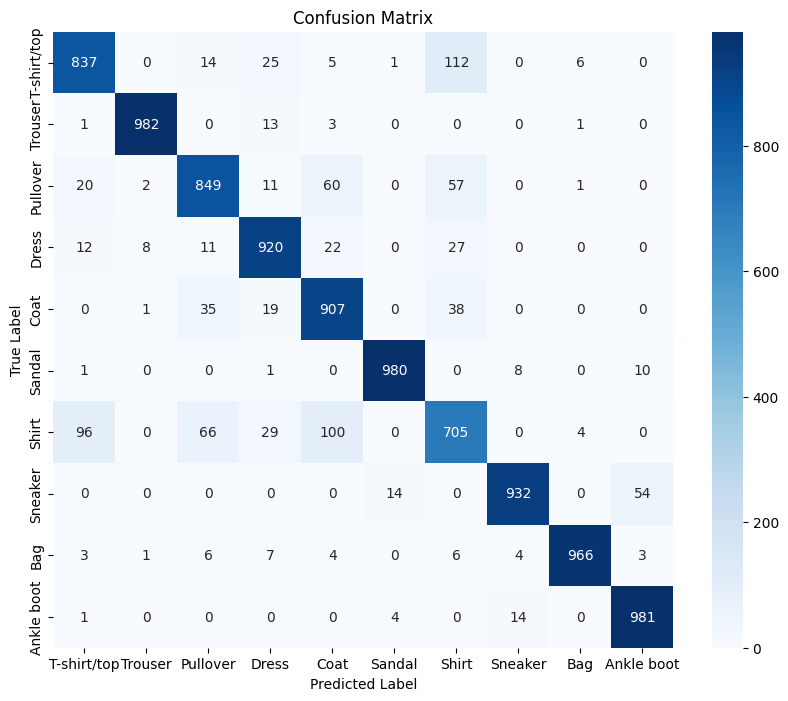

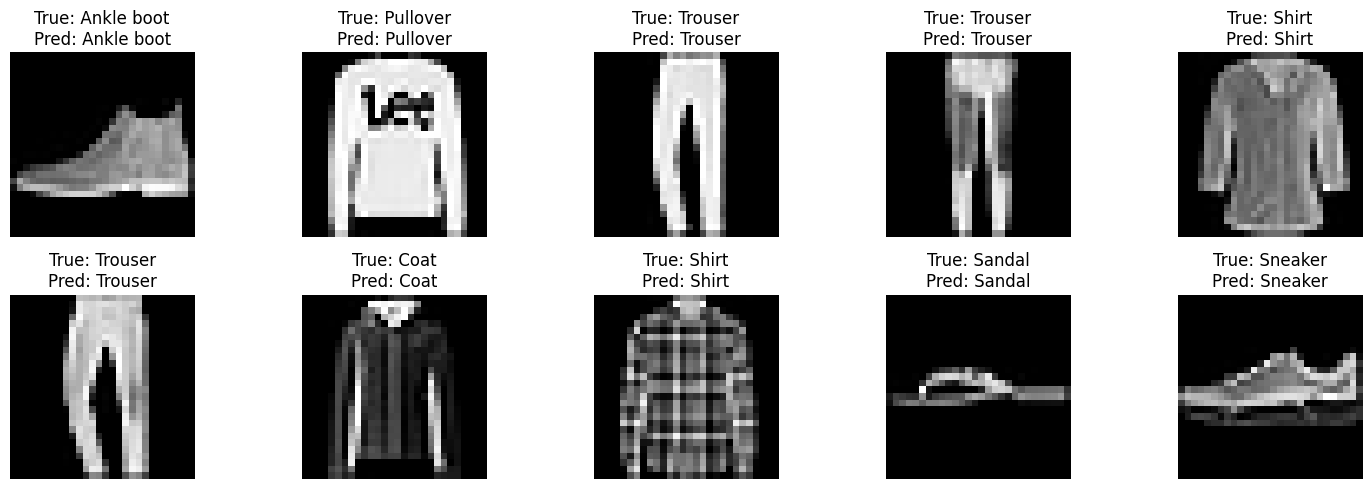


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.82      0.91      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.70      0.72      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Final Results:


model  test_accuracy  test_loss  precision  recall  f1_score
0  CNN 1         0.9059     0.3034    0.90604  0.9059  0.905562

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

final_results_all_con0=[]

# Reshape images to add channel dimension and normalize to [0, 1] range
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1) / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) / 255.0

# Build the convolutional neural network model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training data
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)


# Evaluate the model with the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]))

print("\nConfusion Matrix:")
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
], yticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize predictions for the first 10 images
def plot_predictions(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Class names in Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Call function to visualize predictions
plot_predictions(test_images.squeeze(), test_labels, predicted_labels, class_names)

# Classification report
class_report = classification_report(test_labels, predicted_labels, target_names=class_names, output_dict=True)
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# Store results
final_results_all_con0.append({
    'model': 'CNN 1',
    'test_accuracy': test_accuracy,
    'test_loss': test_loss,
    'precision': class_report['macro avg']['precision'],
    'recall': class_report['macro avg']['recall'],
    'f1_score': class_report['macro avg']['f1-score']
})

# Convert results to a DataFrame
results_df = pd.DataFrame(final_results_all_con0)
print("\nFinal Results:")
results_df



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7404 - loss: 0.6826 - val_accuracy: 0.8750 - val_loss: 0.3337
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8816 - loss: 0.3183 - val_accuracy: 0.8868 - val_loss: 0.3082
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9019 - loss: 0.2648 - val_accuracy: 0.9008 - val_loss: 0.2629
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9131 - loss: 0.2290 - val_accuracy: 0.9038 - val_loss: 0.2607
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9230 - loss: 0.2024 - val_accuracy: 0.9072 - val_loss: 0.2489
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9332 - loss: 0.1750 - val_accuracy: 0.9078 - val_loss: 0.2631
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9406 - loss: 0.1574 - val_accuracy: 0.9087 - val_loss: 0.2610
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9457 - loss: 0.14

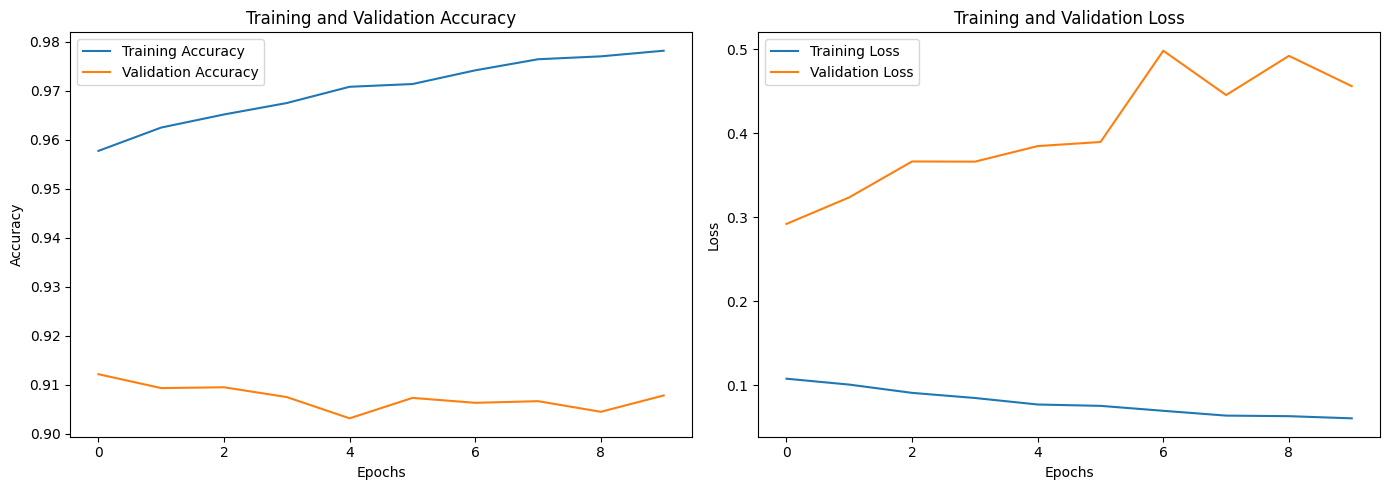


Confusion Matrix:


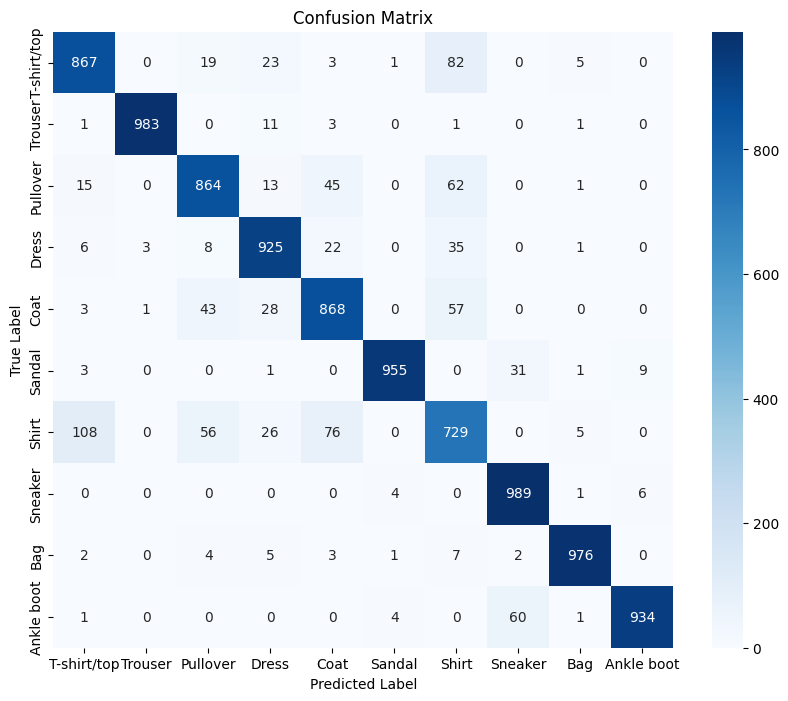

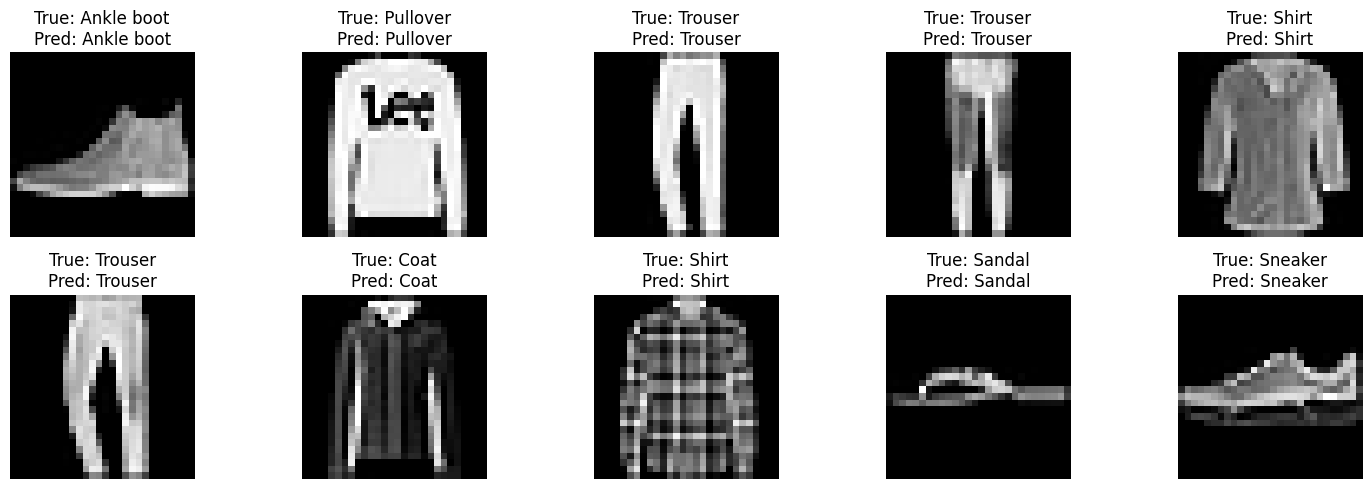


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.86      0.87      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.75      0.73      0.74      1000
     Sneaker       0.91      0.99      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Final Results:


model  test_accuracy  test_loss  precision  recall  f1_score
0  CNN 2          0.909   0.319103   0.909527   0.909  0.908967

In [ ]:
#More advanced: 4 Conv2D layers (32→64→128→256) with same padding in last two.
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

final_results_all_con1=[]

# Reshape images to add channel dimension and normalize to [0, 1] range
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1) / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) / 255.0

# Build the convolutional neural network model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),

    # Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training data
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)


# Evaluate the model with the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]))

# Train the model with the training data
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
print("\nConfusion Matrix:")
cm = confusion_matrix(test_labels, predicted_labels)



# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
], yticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize predictions for the first 10 images
def plot_predictions(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Class names in Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Call function to visualize predictions
plot_predictions(test_images.squeeze(), test_labels, predicted_labels, class_names)

# Classification report
class_report = classification_report(test_labels, predicted_labels, target_names=class_names, output_dict=True)
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# Store results
final_results_all_con1.append({
    'model': 'CNN 2',
    'test_accuracy': test_accuracy,
    'test_loss': test_loss,
    'precision': class_report['macro avg']['precision'],
    'recall': class_report['macro avg']['recall'],
    'f1_score': class_report['macro avg']['f1-score']
})

# Convert results to a DataFrame
results_df = pd.DataFrame(final_results_all_con1)
print("\nFinal Results:")
results_df



In [ ]:
model.summary()

Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_78 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,958,432 (7.47 MB)

 Trainable params: 652,810 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,305,622 (4.98 MB)

# More advanced CNN model using:

---










*   Batch Normalization

*   Dropout layers


*   More filters
*   Padding adjustments







/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7716 - loss: 0.6790 - val_accuracy: 0.8888 - val_loss: 0.2834
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8796 - loss: 0.3336 - val_accuracy: 0.8783 - val_loss: 0.3093
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8958 - loss: 0.2862 - val_accuracy: 0.9003 - val_loss: 0.2660
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9038 - loss: 0.2597 - val_accuracy: 0.9175 - val_loss: 0.2335
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9104 - loss: 0.2417 - val_accuracy: 0.9185 - val_loss: 0.2301
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9169 - loss: 0.2228 - val_accuracy: 0.8968 - val_loss: 0.2853
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9208 - loss: 0.2136 - val_accuracy: 0.9240 - val_loss: 0.2184
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9292 - loss: 0.1928

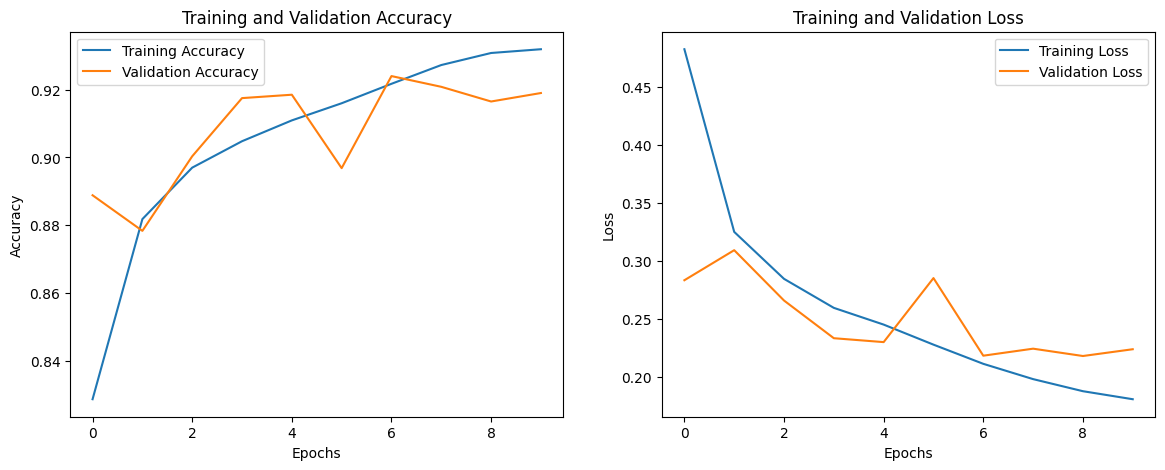

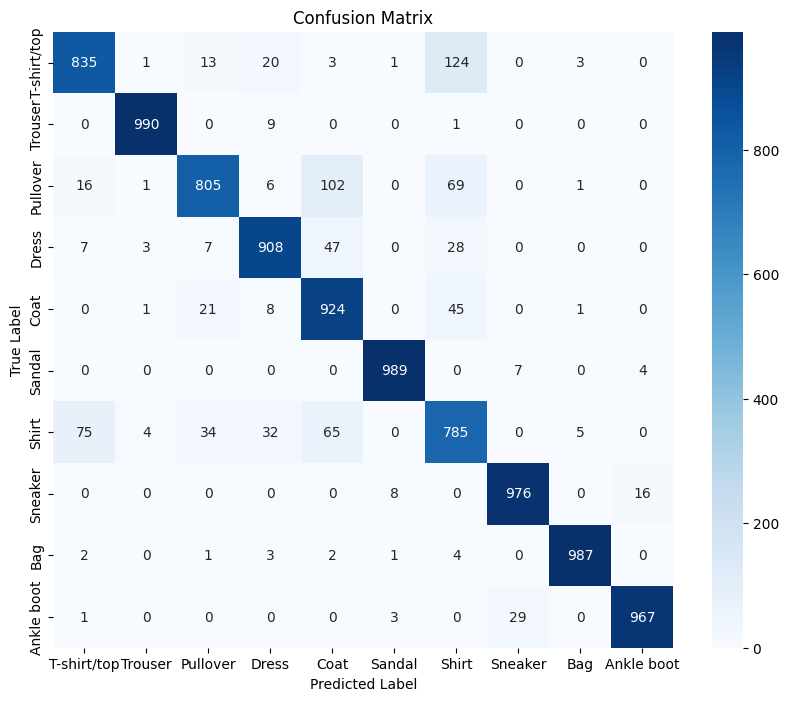


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.83      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.91      0.81      0.86      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.81      0.92      0.86      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.74      0.79      0.76      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Final Results:


model  test_accuracy  test_loss  precision  recall  f1_score
0  CNN 3         0.9166   0.243429   0.918965  0.9166  0.916889

In [ ]:
#BATC
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape images to add channel dimension and normalize to [0, 1] range
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1) / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) / 255.0

# List to store final results
final_results_all_con = []

# Build the convolutional neural network model
model = models.Sequential([
    # Convolutional layers with more filters and BatchNormalization
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Added a dropout layer to reduce overfitting
    layers.Dropout(0.3),

    # Flatten layer and Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training data
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model with the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]))

print("\nConfusion Matrix:")
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
], yticklabels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize predictions for the first 10 images
def plot_predictions(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Class names in Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Classification report
class_report = classification_report(test_labels, predicted_labels, target_names=class_names, output_dict=True)
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# Store results
final_results_all_con.append({
    'model': 'CNN 3',
    'test_accuracy': test_accuracy,
    'test_loss': test_loss,
    'precision': class_report['macro avg']['precision'],
    'recall': class_report['macro avg']['recall'],
    'f1_score': class_report['macro avg']['f1-score']
})

# Convert results to a DataFrame
results_df = pd.DataFrame(final_results_all_con)
print("\nFinal Results:")
results_df



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Model 1...
Epoch 1/10
1688/1688 - 9s - 5ms/step - accuracy: 0.8579 - loss: 0.4066 - val_accuracy: 0.8837 - val_loss: 0.3225
Epoch 2/10
1688/1688 - 4s - 3ms/step - accuracy: 0.9001 - loss: 0.2742 - val_accuracy: 0.9000 - val_loss: 0.2743
Epoch 3/10
1688/1688 - 6s - 3ms/step - accuracy: 0.9158 - loss: 0.2286 - val_accuracy: 0.9060 - val_loss: 0.2575
Epoch 4/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9282 - loss: 0.1953 - val_accuracy: 0.9098 - val_loss: 0.2605
Epoch 5/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9382 - loss: 0.1693 - val_accuracy: 0.9112 - val_loss: 0.2561
Epoch 6/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9480 - loss: 0.1424 - val_accuracy: 0.9140 - val_loss: 0.2641
Epoch 7/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9537 - loss: 0.1252 - val_accuracy: 0.9138 - val_loss: 0.2636
Epoch 8/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9614 - loss: 0.1052 - val_accuracy: 0.9098 - val_loss: 0.2802
Epoch 9/10
1688/1688 - 6s - 3ms/step - accuracy: 0.9671 - loss: 0.0900 - va

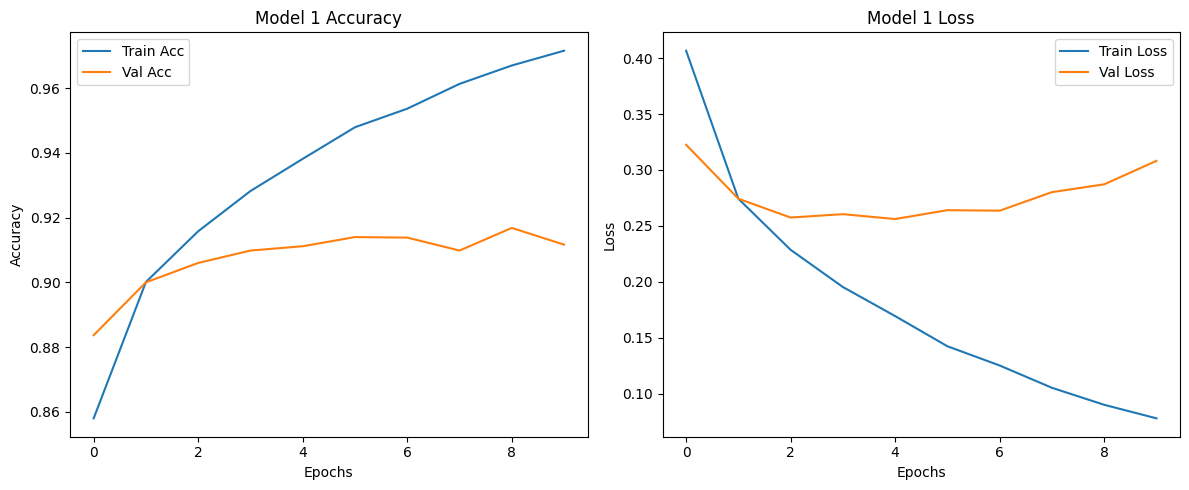

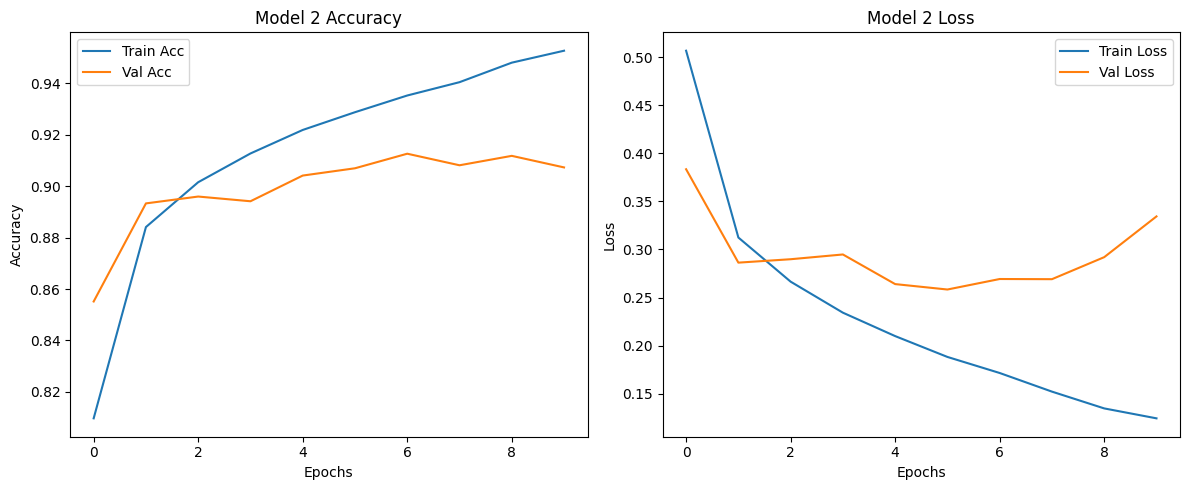

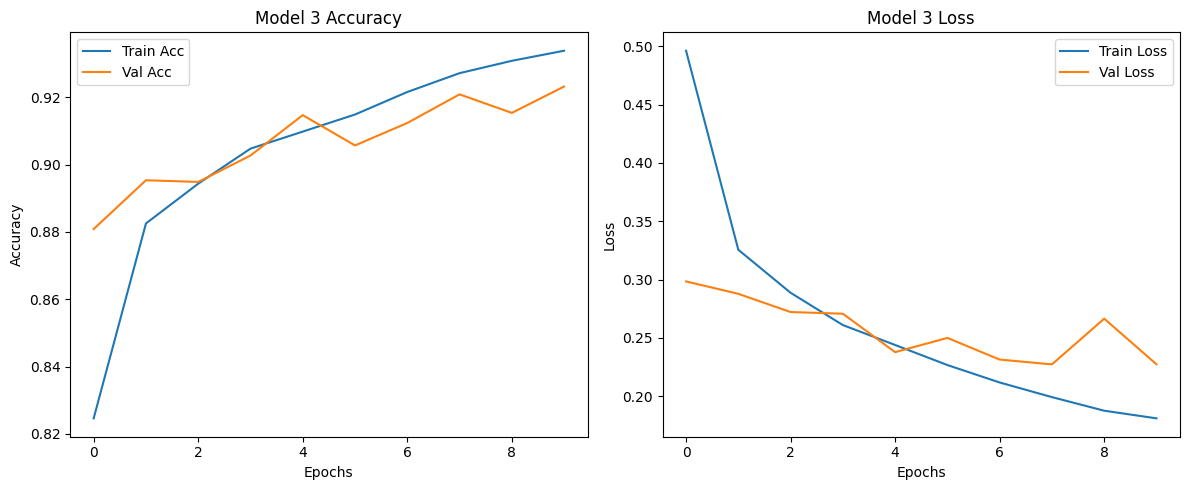

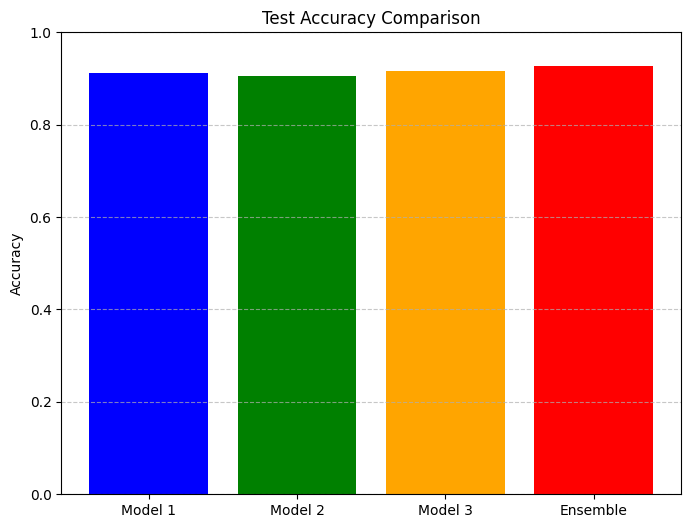

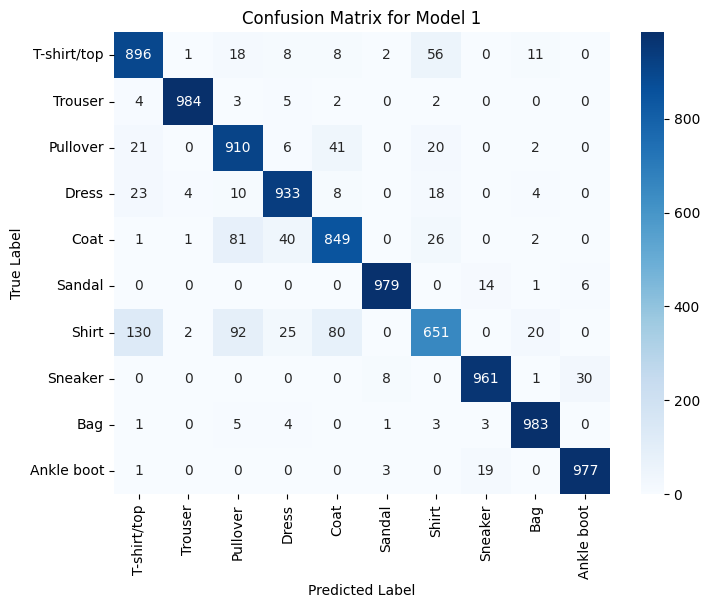

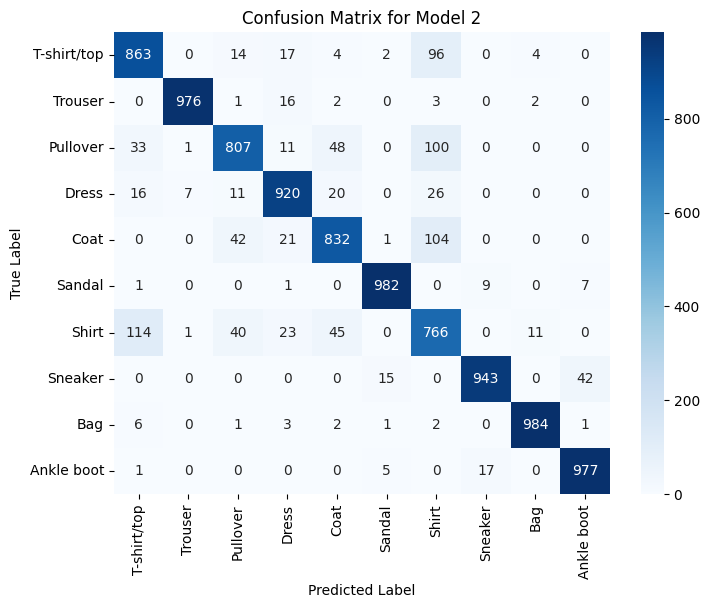

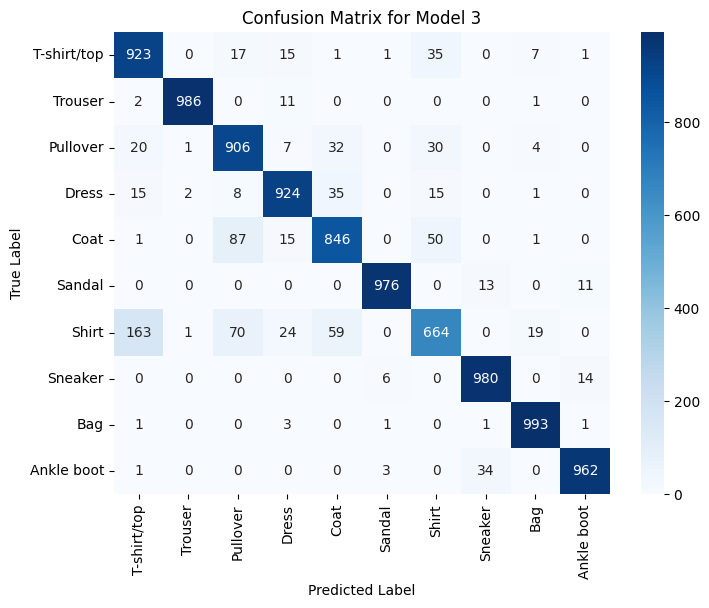

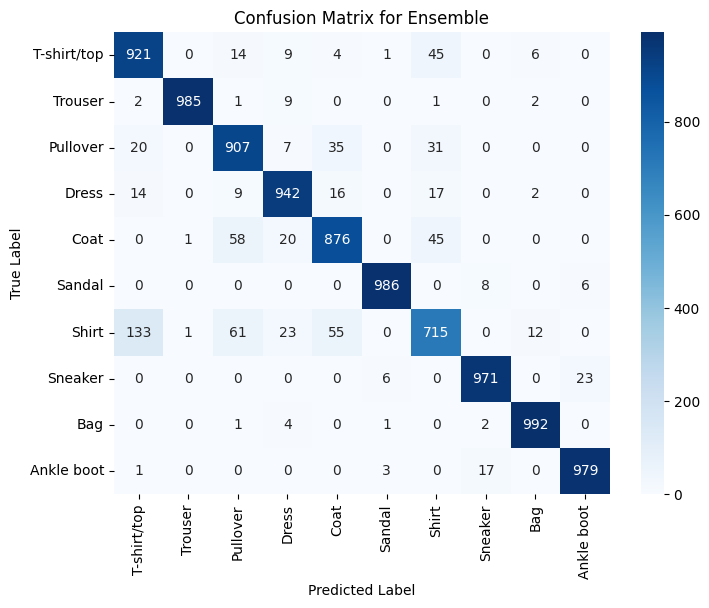

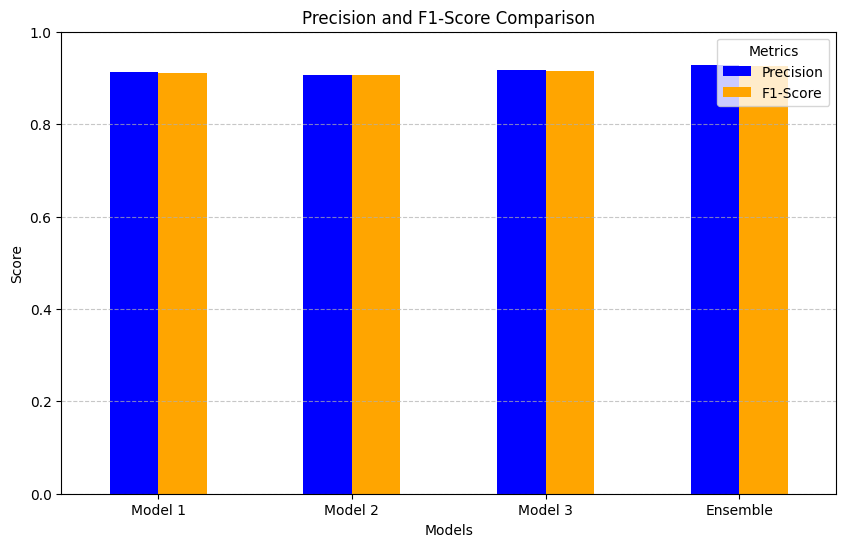

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and reshape
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Function to create individual models
def create_model_1():
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_2():
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_3():
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Train individual models
model_list = [create_model_1(), create_model_2(), create_model_3()]
model_histories = []
test_predictions = []
test_accuracies = []
classification_reports = []
results_list = []

for i, model in enumerate(model_list):
    print(f"\nTraining Model {i+1}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels_one_hot, epochs=10, validation_split=0.1, verbose=2)
    model_histories.append(history)

    test_pred = model.predict(test_images)
    test_predictions.append(test_pred)

    test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=0)
    test_accuracies.append(test_accuracy)

    predicted_labels = np.argmax(test_pred, axis=1)
    report = classification_report(test_labels, predicted_labels, target_names=class_names, output_dict=True)
    classification_reports.append(report)

    results_list.append({
        "Model": f"Model {i+1}",
        "Accuracy": test_accuracy,
        "Loss": test_loss,
        "F1-Score": report['macro avg']['f1-score'],
        "Precision": report['macro avg']['precision']
    })

# Ensemble (Soft Voting)
soft_voting_predictions = np.mean(test_predictions, axis=0)
ensemble_predicted_labels = np.argmax(soft_voting_predictions, axis=1)

ensemble_accuracy = np.mean(ensemble_predicted_labels == test_labels)
ensemble_class_report = classification_report(test_labels, ensemble_predicted_labels, target_names=class_names, output_dict=True)

cce = CategoricalCrossentropy()
ensemble_loss = cce(test_labels_one_hot, soft_voting_predictions).numpy()

results_list.append({
    "Model": "Ensemble",
    "Accuracy": ensemble_accuracy,
    "Loss": ensemble_loss,
    "F1-Score": ensemble_class_report['macro avg']['f1-score'],
    "Precision": ensemble_class_report['macro avg']['precision']
})

# Display results
results_df = pd.DataFrame(results_list)
print("\n=== Evaluation Summary ===")
print(results_df)

# Training Accuracy/Loss Plots
for i, history in enumerate(model_histories):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'Model {i+1} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Model {i+1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Accuracy Comparison
all_accuracies = test_accuracies + [ensemble_accuracy]
model_names = [f"Model {i+1}" for i in range(len(model_list))] + ["Ensemble"]

plt.figure(figsize=(8, 6))
plt.bar(model_names, all_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion Matrices
for i, test_pred in enumerate(test_predictions):
    predicted_labels = np.argmax(test_pred, axis=1)
    cm = confusion_matrix(test_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for Model {i+1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Ensemble Confusion Matrix
cm_ensemble = confusion_matrix(test_labels, ensemble_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Ensemble')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision and F1 Comparison
results_df[["Precision", "F1-Score"]].plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Precision and F1-Score Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.xticks(ticks=range(len(results_df)), labels=results_df["Model"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics')
plt.show()


# Model 1 :

This is a simple fully connected neural network (MLP) for image classification. It flattens 28x28 images into 1D, passes them through two hidden layers with 150 ReLU neurons each, and outputs class probabilities through a softmax layer with 10 units (one for each class).

# Model 2 :
This is a CNN for image classification. It uses 3 convolutional layers (with 32, 64, and 128 filters), each followed by max pooling (after the first two), to extract features. Then it flattens the output, passes it through a dense layer with 128 ReLU units, and ends with a softmax layer for 10-class prediction.

# Model 3 :
This CNN starts with 2 convolutional layers (64 and 128 filters), followed by max pooling and dropout. Then it adds a deeper conv layer (256 filters), another pooling, flattens the output, and passes it through a dense layer (256 units) with dropout. It ends with a softmax layer for 10-class classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Preprocess for Shallow NN
train_images_flat = train_images.reshape(-1, 28 * 28).astype("float32") / 255.0
test_images_flat = test_images.reshape(-1, 28 * 28).astype("float32") / 255.0

# Preprocess for CNNs (add channel dimension)
train_images_cnn = train_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_images_cnn = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

# Model 1: Shallow Neural Network
def build_shallow_nn():
    model = models.Sequential([
        layers.Dense(150, activation='relu', input_shape=(784,)),
        layers.Dense(150, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Basic CNN
def build_basic_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 3: Deeper CNN
def build_deeper_cnn():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Clear session to avoid memory issues
tf.keras.backend.clear_session()

# Instantiate models
model_1 = build_shallow_nn()
model_2 = build_basic_cnn()
model_3 = build_deeper_cnn()

# Train the models
print("Training Shallow NN...")
history_1 = model_1.fit(train_images_flat, train_labels_categorical, epochs=10, batch_size=64,
                        validation_data=(test_images_flat, test_labels_categorical), verbose=2)

print("Training Basic CNN...")
history_2 = model_2.fit(train_images_cnn, train_labels_categorical, epochs=10, batch_size=64,
                        validation_data=(test_images_cnn, test_labels_categorical), verbose=2)

print("Training Deeper CNN...")
history_3 = model_3.fit(train_images_cnn, train_labels_categorical, epochs=10, batch_size=64,
                        validation_data=(test_images_cnn, test_labels_categorical), verbose=2)

#


Training Shallow NN...
Epoch 1/10
938/938 - 7s - 8ms/step - accuracy: 0.8255 - loss: 0.4935 - val_accuracy: 0.8439 - val_loss: 0.4306
Epoch 2/10
938/938 - 8s - 9ms/step - accuracy: 0.8689 - loss: 0.3610 - val_accuracy: 0.8626 - val_loss: 0.3751
Epoch 3/10
938/938 - 3s - 4ms/step - accuracy: 0.8801 - loss: 0.3256 - val_accuracy: 0.8745 - val_loss: 0.3530
Epoch 4/10
938/938 - 5s - 5ms/step - accuracy: 0.8875 - loss: 0.3008 - val_accuracy: 0.8777 - val_loss: 0.3373
Epoch 5/10
938/938 - 4s - 5ms/step - accuracy: 0.8935 - loss: 0.2861 - val_accuracy: 0.8774 - val_loss: 0.3375
Epoch 6/10
938/938 - 2s - 2ms/step - accuracy: 0.8985 - loss: 0.2710 - val_accuracy: 0.8802 - val_loss: 0.3381
Epoch 7/10
938/938 - 3s - 3ms/step - accuracy: 0.9019 - loss: 0.2596 - val_accuracy: 0.8778 - val_loss: 0.3308
Epoch 8/10
938/938 - 3s - 3ms/step - accuracy: 0.9071 - loss: 0.2477 - val_accuracy: 0.8824 - val_loss: 0.3219
Epoch 9/10
938/938 - 2s - 2ms/step - accuracy: 0.9110 - loss: 0.2382 - val_accuracy: 0.88

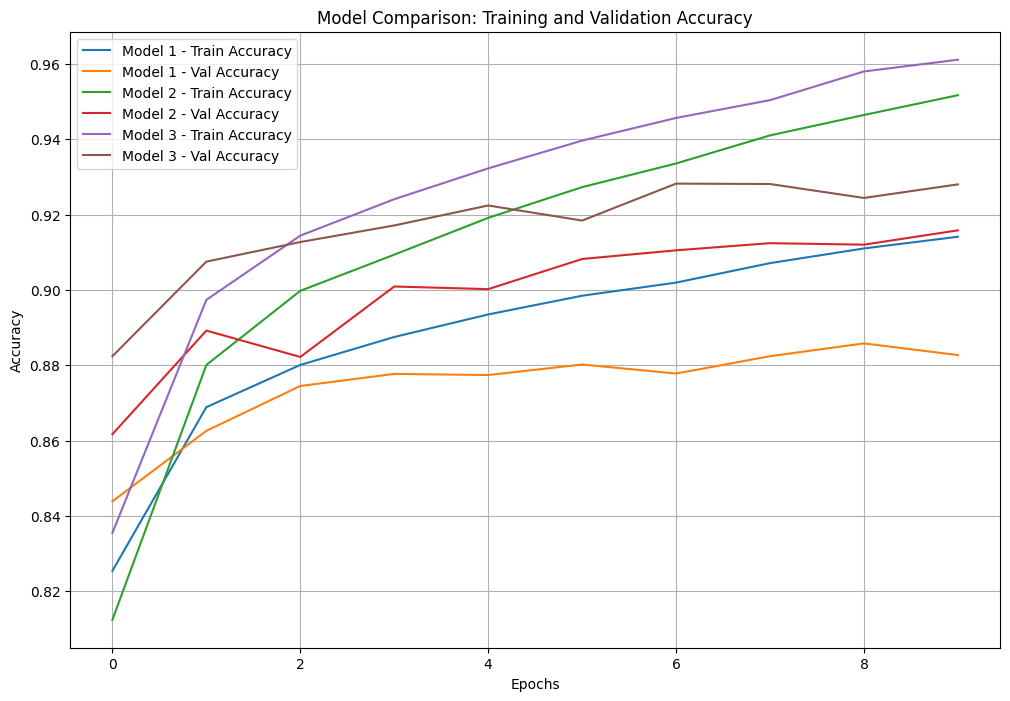

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history_1, history_2, history_3):
    plt.figure(figsize=(12, 8))

    # Plot the training and validation accuracy for Model 1
    plt.plot(history_1.history['accuracy'], label='Model 1 - Train Accuracy')
    plt.plot(history_1.history['val_accuracy'], label='Model 1 - Val Accuracy')

    # Plot the training and validation accuracy for Model 2
    plt.plot(history_2.history['accuracy'], label='Model 2 - Train Accuracy')
    plt.plot(history_2.history['val_accuracy'], label='Model 2 - Val Accuracy')

    # Plot the training and validation accuracy for Model 3
    plt.plot(history_3.history['accuracy'], label='Model 3 - Train Accuracy')
    plt.plot(history_3.history['val_accuracy'], label='Model 3 - Val Accuracy')

    # Add labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison: Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot accuracy
plot_accuracy(history_1, history_2, history_3)

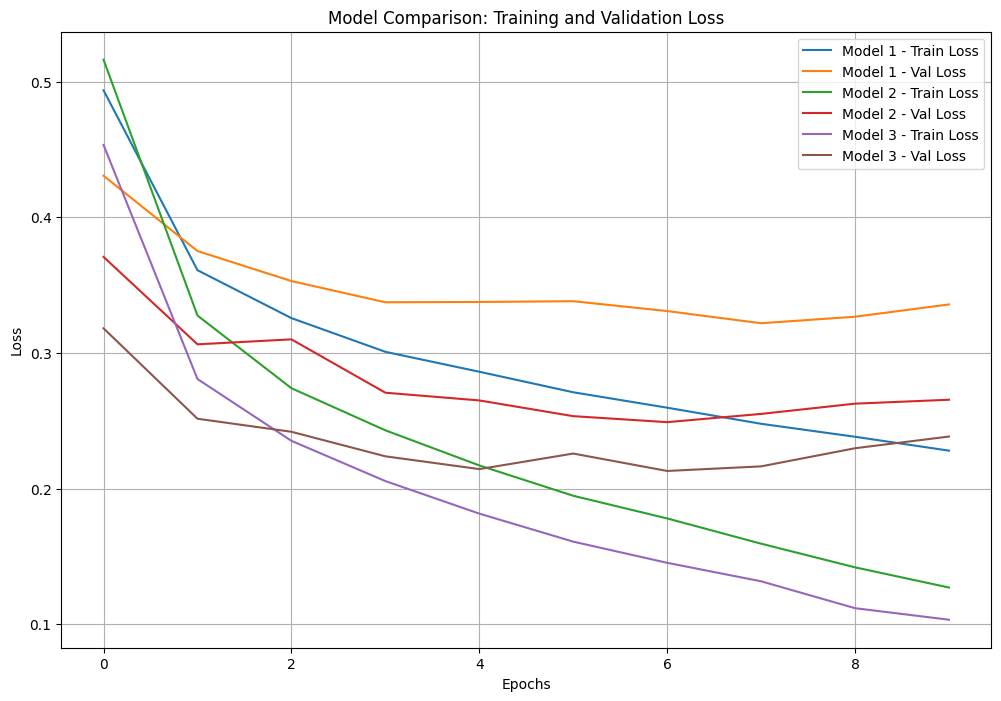

In [ ]:
def plot_loss(history_1, history_2, history_3):
    plt.figure(figsize=(12, 8))

    # Plot the training and validation loss for Model 1
    plt.plot(history_1.history['loss'], label='Model 1 - Train Loss')
    plt.plot(history_1.history['val_loss'], label='Model 1 - Val Loss')

    # Plot the training and validation loss for Model 2
    plt.plot(history_2.history['loss'], label='Model 2 - Train Loss')
    plt.plot(history_2.history['val_loss'], label='Model 2 - Val Loss')

    # Plot the training and validation loss for Model 3
    plt.plot(history_3.history['loss'], label='Model 3 - Train Loss')
    plt.plot(history_3.history['val_loss'], label='Model 3 - Val Loss')

    # Add labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Comparison: Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot loss
plot_loss(history_1, history_2, history_3)


In [ ]:
print(f"Model 1 Accuracy: {accuracy_1:.4f}")
print(f"Model 2 Accuracy: {accuracy_2:.4f}")
print(f"Model 3 Accuracy: {accuracy_3:.4f}")


Model 1 Accuracy: 0.8827
Model 2 Accuracy: 0.9158
Model 3 Accuracy: 0.9280
Committee Accuracy: 0.9088


# Comparing All models

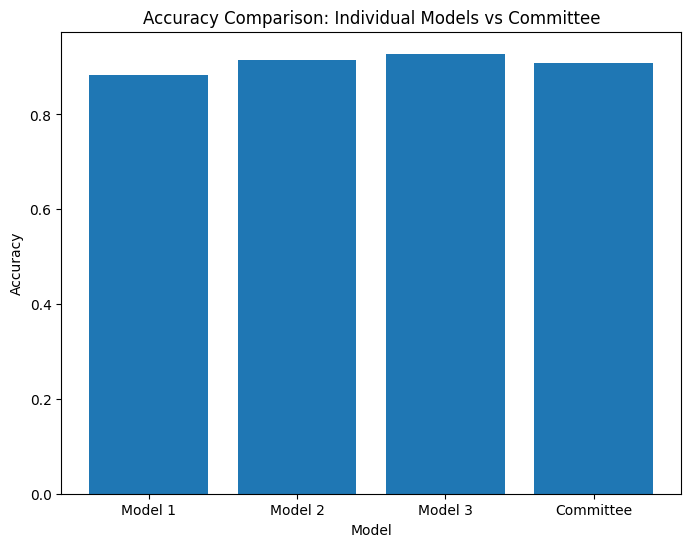

In [ ]:
test_images_flat = test_images.reshape(-1, 28*28) / 255.0
test_images_cnn = test_images.reshape(-1, 28, 28, 1) / 255.0

# Evaluate individual models on their respective input formats
accuracy_1 = model_1.evaluate(test_images_flat, test_labels_categorical, verbose=0)[1]
accuracy_2 = model_2.evaluate(test_images_cnn, test_labels_categorical, verbose=0)[1]
accuracy_3 = model_3.evaluate(test_images_cnn, test_labels_categorical, verbose=0)[1]

# Committee accuracy (averaged)
committee_accuracy = np.mean([accuracy_1, accuracy_2, accuracy_3])

# Plotting
import matplotlib.pyplot as plt
# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Committee'], [accuracy_1, accuracy_2, accuracy_3, committee_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Individual Models vs Committee')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Preprocess for Shallow NN
train_images_flat = train_images.reshape(-1, 28 * 28).astype("float32") / 255.0
test_images_flat = test_images.reshape(-1, 28 * 28).astype("float32") / 255.0

# Preprocess for CNNs (add channel dimension)
train_images_cnn = train_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_images_cnn = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

# Model 1: Shallow Neural Network
def build_shallow_nn():
    model = models.Sequential([
        layers.Dense(150, activation='relu', input_shape=(784,)),
        layers.Dense(150, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 2: Basic CNN
def build_basic_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model 3: Deeper CNN
def build_deeper_cnn():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Clear session to avoid memory issues
tf.keras.backend.clear_session()

# Instantiate models
model_1 = build_shallow_nn()
model_2 = build_basic_cnn()
model_3 = build_deeper_cnn()

# Train the models
print("Training Shallow NN...")
history_1 = model_1.fit(train_images_flat, train_labels_categorical, epochs=10, batch_size=64,
                        validation_data=(test_images_flat, test_labels_categorical), verbose=2)

print("Training Basic CNN...")
history_2 = model_2.fit(train_images_cnn, train_labels_categorical, epochs=10, batch_size=64,
                        validation_data=(test_images_cnn, test_labels_categorical), verbose=2)

print("Training Deeper CNN...")
history_3 = model_3.fit(train_images_cnn, train_labels_categorical, epochs=10, batch_size=64,
                        validation_data=(test_images_cnn, test_labels_categorical), verbose=2)

#


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Shallow NN...
Epoch 1/10
938/938 - 10s - 10ms/step - accuracy: 0.8225 - loss: 0.5011 - val_accuracy: 0.8444 - val_loss: 0.4223
Epoch 2/10
938/938 - 6s - 6ms/step - accuracy: 0.8668 - loss: 0.3669 - val_accuracy: 0.8711 - val_loss: 0.3599
Epoch 3/10
938/938 - 4s - 5ms/step - accuracy: 0.8790 - loss: 0.3272 - val_accuracy: 0.8702 - val_loss: 0.3551
Epoch 4/10
938/938 - 4s - 5ms/step - accuracy: 0.8870 - loss: 0.3038 - val_accuracy: 0.8789 - val_loss: 0.3409
Epoch 5/10
938/938 - 6s - 6ms/step - accuracy: 0.8924 - loss: 0.2878 - val_accuracy: 0.8711 - val_loss: 0.3634
Epoch 6/10
938/938 - 11s - 11ms/step - accuracy: 0.8988 - loss: 0.2711 - val_accuracy: 0.8761 - val_loss: 0.3423
Epoch 7/10
938/938 - 9s - 10ms/step - accuracy: 0.9021 - loss: 0.2591 - val_accuracy: 0.8769 - val_loss: 0.3397
Epoch 8/10
938/938 - 6s - 6ms/step - accuracy: 0.9064 - loss: 0.2477 - val_accuracy: 0.8796 - val_loss: 0.3345
Epoch 9/10
938/938 - 5s - 5ms/step - accuracy: 0.9097 - loss: 0.2392 - val_accuracy:

In [ ]:
#from sklearn.metrics import classification_report
'''import numpy as np
def committee_predictions(models, test_inputs):
    """
    models: list of models
    test_inputs: list of test image sets matching each model
    """
    predictions = [model.predict(test_input) for model, test_input in zip(models, test_inputs)]
    avg_predictions = np.mean(predictions, axis=0)
    return np.argmax(avg_predictions, axis=1)

# Match input format for each model
committee_pred_classes = committee_predictions(
    models=[model_1, model_2, model_3],
    test_inputs=[test_images_flat, test_images_cnn, test_images_cnn]
)

# Evaluate
print("Committee Classification Report:")
print(classification_report(test_labels, committee_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step
Committee Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.91      0.89      1000
           3       0.92      0.94      0.93      1000
           4       0.89      0.90      0.89      1000
           5       0.99      0.99      0.99      1000
           6       0.86      0.73      0.79      1000
           7       0.95      0.99      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step
       Model  Accuracy      Loss  F1-Score  Precision  Recall
0    Model 1    0.8856  0.327891  0.883691   0.889257  0.8856
1    Model 2    0.9155  0.271113  0.915464   0.915951  0.9155
2    Model 3    0.9307  0.245749  0.929856   0.930142  0.9307
3  Committee    0.9106  0.281584  0.930193   0.930965  0.9309





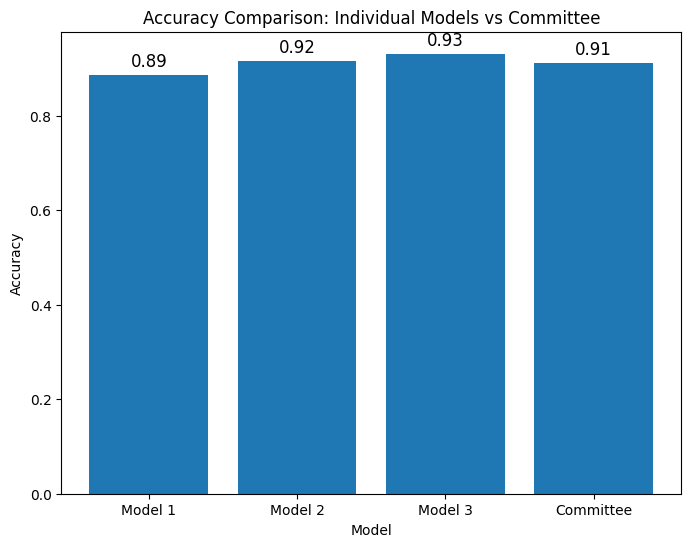

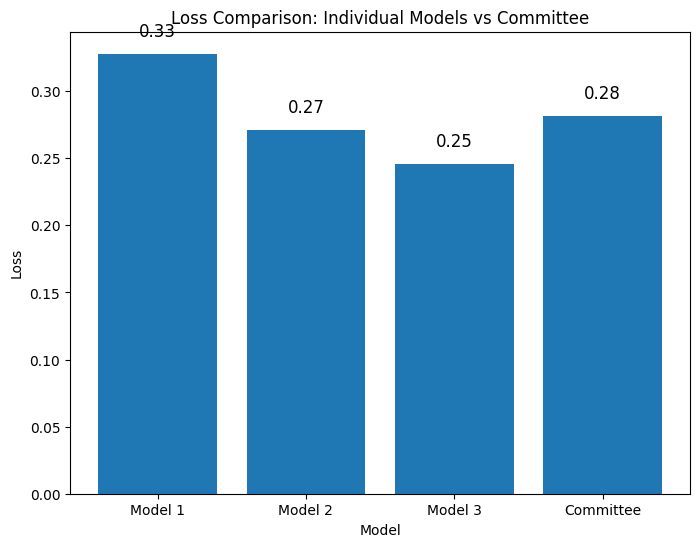

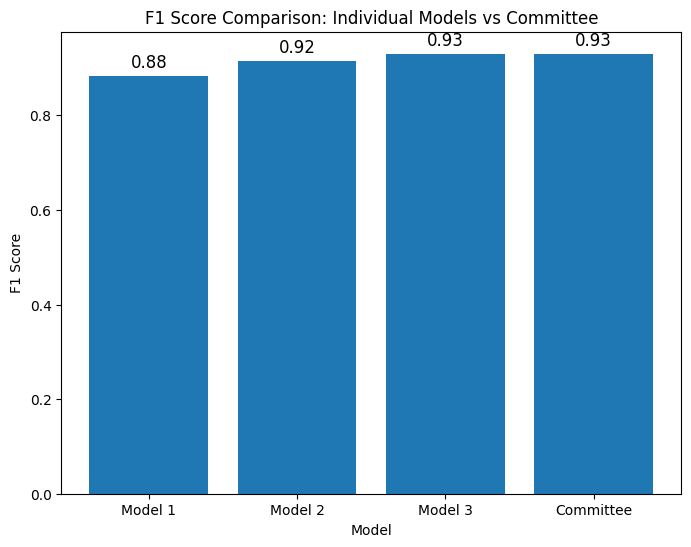

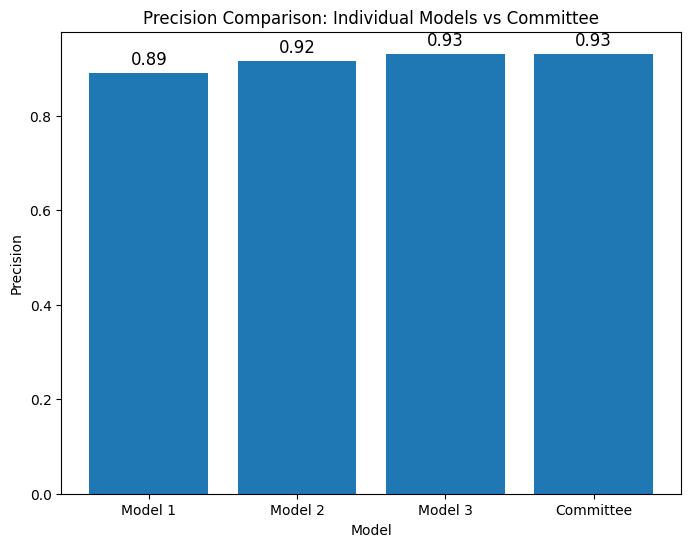

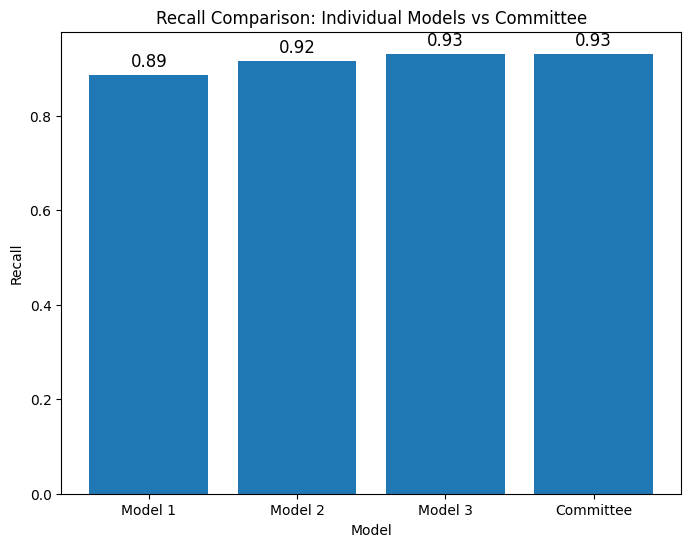

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
def evaluate_model(model, model_type, test_images, test_labels_categorical, test_labels):
    if model_type == "shallow":
        test_input = test_images.reshape(-1, 28*28) / 255.0
    elif model_type == "cnn":
        test_input = test_images.reshape(-1, 28, 28, 1) / 255.0
    else:
        raise ValueError("Unknown model type")

    y_pred = model.predict(test_input)
    y_pred_classes = np.argmax(y_pred, axis=1)

    loss, accuracy = model.evaluate(test_input, test_labels_categorical, verbose=0)

    report = classification_report(test_labels, y_pred_classes, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    return accuracy, loss, precision, recall, f1, y_pred

# Evaluate each model
accuracy_1, loss_1, precision_1, recall_1, f1_1, y_pred_1 = evaluate_model(model_1, "shallow", test_images, test_labels_categorical, test_labels)
accuracy_2, loss_2, precision_2, recall_2, f1_2, y_pred_2 = evaluate_model(model_2, "cnn", test_images, test_labels_categorical, test_labels)
accuracy_3, loss_3, precision_3, recall_3, f1_3, y_pred_3 = evaluate_model(model_3, "cnn", test_images, test_labels_categorical, test_labels)

# Committee prediction
y_pred_committee = np.argmax((y_pred_1 + y_pred_2 + y_pred_3) / 3, axis=1)
report_committee = classification_report(test_labels, y_pred_committee, output_dict=True)

accuracy_committee = np.mean([accuracy_1, accuracy_2, accuracy_3])
loss_committee = np.mean([loss_1, loss_2, loss_3])
precision_committee = report_committee['weighted avg']['precision']
recall_committee = report_committee['weighted avg']['recall']
f1_committee = report_committee['weighted avg']['f1-score']

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Committee'],
    'Accuracy': [accuracy_1, accuracy_2, accuracy_3, accuracy_committee],
    'Loss': [loss_1, loss_2, loss_3, loss_committee],
    'F1-Score': [f1_1, f1_2, f1_3, f1_committee],
    'Precision': [precision_1, precision_2, precision_3, precision_committee],
    'Recall': [recall_1, recall_2, recall_3, recall_committee]
})

# Display the metrics dataframe
print(metrics_df)

print("\n\n")

# Plot the accuracy comparisons with values inside the bars
plt.figure(figsize=(8, 6))
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Committee'], [accuracy_1, accuracy_2, accuracy_3, accuracy_committee])
for i, v in enumerate([accuracy_1, accuracy_2, accuracy_3, accuracy_committee]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Individual Models vs Committee')
plt.show()

# Plot the loss comparisons with values inside the bars
plt.figure(figsize=(8, 6))
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Committee'], [loss_1, loss_2, loss_3, loss_committee])
for i, v in enumerate([loss_1, loss_2, loss_3, loss_committee]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss Comparison: Individual Models vs Committee')
plt.show()

# Plot the F1 Score comparisons with values inside the bars
plt.figure(figsize=(8, 6))
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Committee'], [f1_1, f1_2, f1_3, f1_committee])
for i, v in enumerate([f1_1, f1_2, f1_3, f1_committee]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison: Individual Models vs Committee')
plt.show()

# Plot the Precision comparisons with values inside the bars
plt.figure(figsize=(8, 6))
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Committee'], [precision_1, precision_2, precision_3, precision_committee])
for i, v in enumerate([precision_1, precision_2, precision_3, precision_committee]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison: Individual Models vs Committee')
plt.show()

# Plot the Recall comparisons with values inside the bars
plt.figure(figsize=(8, 6))
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Committee'], [recall_1, recall_2, recall_3, recall_committee])
for i, v in enumerate([recall_1, recall_2, recall_3, recall_committee]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison: Individual Models vs Committee')
plt.show()
